# Data Science final year project : UEFA Champions League 2018-2019

<i>Cyril TSO and Tsiory RAZAFINDRAZAKA - Master 2 IoT & Big Data</i>

The goal of the project is to predict the winner of the UEFA Champions League 2018-2019 season.

In this notebook, only a part of the cleaning, the EDA and the Machine Learning part are gonna be displayed.

If you are looking for the Web Scraping and the Data Cleaning code, you can found them on my Github at these links : https://github.com/cyriltso/PFE-Data-Science/blob/master/ucl_scraping.py, https://github.com/cyriltso/PFE-Data-Science/blob/master/ucl_cleaning.py

So, after having acquired the raw data from <i>ESPN, Whoscored and Footystats</i> and transformed them into a global dataset with Pandas, we're ready to analyse it and to find which Machine Learning is best suited for making the most accurate prediction regarding the winner of the UEFA Champions League.

## UEFA Champions League Prize List

Before diving into the notebook, it's good to know who were the previous winners, the best scorers and the best assist players of the competition from 2011 to 2018.

For the teams :

-  2011/2012 : Chelsea FC (England, 6th in national championship)
-  2012/2013 : Bayern Munich (Germany, 1st in national championship)
-  2013/2014 : Real Madrid (Spain, 3rd in national championship)
-  2014/2015 : FC Barcelona (Spain, 1st in national championship)
-  2015/2016 : Real Madrid (Spain, 2nd in national championship)
-  2016/2017 : Real Madrid (Spain, 1st in national championship)
-  2017/2018 : Real Madrid (Spain, 2nd in national championship)

For the scorers :

-  2011/2012 : Lionel Messi (FC Barcelona) ; 14 goals 
-  2012/2013 : Cristiano Ronaldo (Real Madrid) ; 12 goals 
-  2013/2014 : Cristiano Ronaldo (Real Madrid) ; 17 goals
-  2014/2015 : Cristiano Ronaldo (Real Madrid), Lionel Messi (FC Barcelona), Neymar (FC Barcelona) ; 10 goals 
-  2015/2016 : Cristiano Roanldo (Real Madrid) ; 16 goals
-  2016/2017 : Cristiano Ronaldo (Real Madrid) ; 12 goals
-  2017/2018 : Cristiano Ronaldo (Real Madrid) ; 15 goals

For the assist players :

-  2011/2012 : Kaka (Real Madrid) ; 5 assists
-  2012/2013 : Zlatan Ibrahimovic (Paris Saint-Germain) ; 7 assists
-  2013/2014 : Wayne Rooney (Manchester United) ; 8 assists
-  2014/2015 : Lionel Messi (FC Barcelona) ; 6 assists
-  2015/2016 : Kingsley Coman (Bayern Munich) ; 5 assists
-  2016/2017 : Neymar (FC Barcelona) ; 8 assists
-  2017/2018 : James Milner (Liverpool FC) ; 9 assists

##  Table of Contents

1. Content of the dataset <br>
2. Dataset's features glossary
3. Exploratory Data Analysis
4. Predictions <br>
5. Storytelling & Conclusion <br>

In [130]:
### Libraries for manipulating and visualizing the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import math

### Libraries for Machine Learning modeling

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, log_loss
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

sns.set(style = "white", palette="Set3")

### Content of the dataset

The dataset is composed of 210 observations (from 2011 to 2018) and 42 features.

Overall, the dataframe can be distinguished in 4 global categories concatened together :
    - The teams' stats in each round of the competition (starting from the Round of 16, so only the 16 best teams does appear in this section)
    - The teams' detailed stats in the whole competition (all of the teams that have played in the competition appear there)
    - The best scorers' stats
    - The best assists players' stats

### Dataset's features glossary

    - YEAR : year of each season
    - ROUND : round of the competition (round of 16, quarter-finals, semi-finals, final)
    - RANK ER : rank of each team in each round of the competition
    - TEAM ER : name of each team in each round of the competition
    - MP : number of match played by each team in each round of the competition (2 per round and 1 in the final)
    - W : number of wins by each team in each round of the competition
    - D : number of draws by each team in each round of the competition
    - L : number of losses by each team in each round of the competition
    - GF : number of goals scored by each team in each round of the competition
    - GD : goals difference from each team in each round of the competition
    - Last 5 : last results
    - CS% : clean sheet percentage (number of matches with goals conceded
    - BTTS% : percentage of matches where both teams scored a goal
    - FTS% : percentage of matches where a team failed to score a goal
    - Over 1.5+ % : percentage of matches where a team scores more than 1.5 goals
    - Over 2.5+ % : percentage of matches where a team scores more than 2.5 goals
    - AVG : goal average of a team
    - CATEGORIES 1 : first category of the dataset (detailed stats here)
    - RANK DS : team rank with the detailed stats
    - TEAM DS : team name with the detailed stats
    - GOALS : number of goals scored in total during the whole competition 
    - SHOTS : shots attempts average
    - YELLOW CARD : number of yellow cards
    - RED CARD : number of red cards
    - POSSESSION : possession percentage
    - PASS% : pass accuracy percentage
    - RATING : team evaluation (created by the forecaster)
    - CATEGORIES 2 : second category of the dataset (scorers here)
    - RANK SC : scorers ranking
    - NAME SC : scorers names
    - TEAM SC : scorers teams
    - MP SC : matches played by the scorers
    - G : number of goals scored by the scorers
    - GOALS RATIO : goals ratio
    - CATEGORIES 3 : third category of the dataset (assists players here)
    - RANK A : assists players ranking
    - NAME A : assists players names
    - TEAM A : assists players teams
    - MP A : matches played by the assists players
    - A : number of assists
    - ASSISTS RATiO : assists ratio
    
    - Strikers : players that are supposed to score goals
    - Midfielders : players that are controlling their teams tempo, making passes, they are the "link" between defense and attack
    - Defenders : players that have to prevent the players from the other teams to build their attack, to stop their offense
    - Goalkeepers : players that are preventing the strikers to score goals

### Exploratory Data Analysis

The goal of the EDA is to make extra cleaning, analyse the data numerically and graphically in order to :

    - Have an overview if the dataset (in order to make adjustments)
    - Make extra cleaning (if necessary)
    - Splitting the dataset into subsets
    - Making descriptive and graphical analysis
    - Find biases (abnormal values) in the features
    - Determine correlation between features

#### Overviewing the data

In [131]:
### Loading the dataset

file = 'UCL Dataset.csv'

df = pd.read_csv(file)

In [132]:
### Overview of the dataset

df.shape

(210, 42)

In [133]:
df.head()

,YEAR,ROUND,RANK ER,TEAM ER,MP,W,D,L,GF,GA,...,MP SC,G,GOALS RATIO,CATEGORIES 3,RANK A,NAME A,TEAM A,MP A,A,ASSISTS RATIO
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,...,11,14,1.27,ASSISTS,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,...,11,12,1.09,ASSISTS,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,...,10,10,1.00,ASSISTS,,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,...,10,7,0.70,ASSISTS,,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,...,8,6,0.75,ASSISTS,,Kaká,Real Madrid,7,5,0.71


In [134]:
df.tail()

,YEAR,ROUND,RANK ER,TEAM ER,MP,W,D,L,GF,GA,...,MP SC,G,GOALS RATIO,CATEGORIES 3,RANK A,NAME A,TEAM A,MP A,A,ASSISTS RATIO
205,2017/18,Semi Finals,2,Liverpool FC,2,1,0,1,7,6,...,6,4,0.67,ASSISTS,,Radja Nainggolan,AS Roma,11,2,0.18
206,2017/18,Semi Finals,3,AS Roma,2,1,0,1,6,7,...,6,4,0.67,ASSISTS,,Lucas Vázquez,Real Madrid,10,2,0.20
207,2017/18,Semi Finals,4,Bayern Munich,2,0,1,1,3,4,...,11,3,0.27,ASSISTS,,Pablo Sarabia,Sevilla FC,10,2,0.20
208,2017/18,Finals,1,Real Madrid,1,1,0,0,3,1,...,10,3,0.30,ASSISTS,,Sergio Escudero,Sevilla FC,10,2,0.20
209,2017/18,Finals,2,Liverpool FC,1,0,0,1,1,3,...,10,3,0.30,ASSISTS,,Thomas Müller,Bayern Munich,10,2,0.20


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 42 columns):
YEAR             210 non-null object
ROUND            210 non-null object
RANK ER          210 non-null int64
TEAM ER          210 non-null object
MP               210 non-null int64
W                210 non-null int64
D                210 non-null int64
L                210 non-null int64
GF               210 non-null int64
GA               210 non-null int64
GD               210 non-null int64
Last 5           210 non-null object
CS%              210 non-null int64
BTTS%            210 non-null int64
FTS%             210 non-null int64
Over 1.5+ %      210 non-null int64
Over 2.5+ %      210 non-null int64
AVG              210 non-null float64
CATEGORIES 1     210 non-null object
RANK DS          210 non-null int64
TEAM DS          210 non-null object
GOALS            210 non-null int64
SHOTS            210 non-null float64
YELLOW CARD      210 non-null int64
RED CARD         210 

<i>Ok, we can notice that the dataset seems to be correct, the data are indeed organized from 2011 to 2019, which is the frame we intend to use for the prediction.

However, it's possible to highlight that there are few variables that are non-numerical (which is an issue for applying the dataset to the Machine Learning model, but we will correct it later), also the columns' names seem to be complicated to interpret for people who doesn't have a clue about football, so we need to arrange them in a simple way.</i>

#### Making extra data cleaning for optimization

In [136]:
### Re-arranging some of the columns' names so that they are easier to understand for everybody

df = df.rename(columns = {
    "YEAR" : "year",
    "ROUND" : "round",
    "RANK ER" : "team_rank",
    "TEAM ER" : "team",
    "MP" : "n_matchs_played",
    "W" : "n_wins",
    "D" : "n_draws",
    "L" : "n_loss",
    "GF" : "goals_scored",
    "GA" : "goals_conceded",
    "GD" : "goals_difference",
    "Last 5" : "last_results",
    "CS%" : "clean_sheets",
    "BTTS%" : "both_teams_to_score",
    "FTS%" : "fail_to_score",
    "Over 1.5+ %" : "over_1.5_goals",
    "Over 2.5+ %" : "over_2.5_goals",
    "AVG" : "average_goals",
    "CATEGORIES 1" : "first_category",
    "RANK DS" : "team_rank_detailed_stats",
    "TEAM DS" : "team_names_detailed_stats",
    "GOALS" : "total_goals",
    "SHOTS" : "shots_average",
    "YELLOW CARD" : "yellow_card",
    "RED CARD" : "red_card",
    "POSSESSION" : "ball_possession_percentage",
    "PASS%" : "pass_accuracy_percentage",
    "RATING" : "team_rating",
    "CATEGORIES 2" : "second_category",
    "RANK SC" : "scorer_rank",
    "NAME SC" : "scorer_name",
    "TEAM SC" : "scorer_team",
    "MP SC" : "scorer_match_played",
    "G" : "goals_numbers",
    "GOALS RATIO" : "goals_ratio",
    "CATEGORIES 3" : "third_category",
    "RANK A" : "assist_rank",
    "NAME A" : "assist_name",
    "TEAM A" : "assist_team",
    "MP A" : "assist_match_played",
    "A" : "assists_numbers",
    "ASSISTS RATIO" : "assists_ratio"
})

In [137]:
### Checking if the columns are correctly modified

df.columns

Index(['year', 'round', 'team_rank', 'team', 'n_matchs_played', 'n_wins',
       'n_draws', 'n_loss', 'goals_scored', 'goals_conceded',
       'goals_difference', 'last_results', 'clean_sheets',
       'both_teams_to_score', 'fail_to_score', 'over_1.5_goals',
       'over_2.5_goals', 'average_goals', 'first_category',
       'team_rank_detailed_stats', 'team_names_detailed_stats', 'total_goals',
       'shots_average', 'yellow_card', 'red_card',
       'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating',
       'second_category', 'scorer_rank', 'scorer_name', 'scorer_team',
       'scorer_match_played', 'goals_numbers', 'goals_ratio', 'third_category',
       'assist_rank', 'assist_name', 'assist_team', 'assist_match_played',
       'assists_numbers', 'assists_ratio'],
      dtype='object')

<i>Ok, looks like all of the features' names have been correctly changed !</i>

In [138]:
### Checking if there are type issues for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 42 columns):
year                          210 non-null object
round                         210 non-null object
team_rank                     210 non-null int64
team                          210 non-null object
n_matchs_played               210 non-null int64
n_wins                        210 non-null int64
n_draws                       210 non-null int64
n_loss                        210 non-null int64
goals_scored                  210 non-null int64
goals_conceded                210 non-null int64
goals_difference              210 non-null int64
last_results                  210 non-null object
clean_sheets                  210 non-null int64
both_teams_to_score           210 non-null int64
fail_to_score                 210 non-null int64
over_1.5_goals                210 non-null int64
over_2.5_goals                210 non-null int64
average_goals                 210 non-null float64
first_c

<i>We can observe here that all the types seem to be coherent for each features contents, however, we'll have to convert all of the categorical features to numerical values so that they will be able to be processed by the Machine Learning models, but this will be done later.</i>

In [139]:
### Checking if there are missing values

df.isnull().sum()

year                          0
round                         0
team_rank                     0
team                          0
n_matchs_played               0
n_wins                        0
n_draws                       0
n_loss                        0
goals_scored                  0
goals_conceded                0
goals_difference              0
last_results                  0
clean_sheets                  0
both_teams_to_score           0
fail_to_score                 0
over_1.5_goals                0
over_2.5_goals                0
average_goals                 0
first_category                0
team_rank_detailed_stats      0
team_names_detailed_stats     0
total_goals                   0
shots_average                 0
yellow_card                   0
red_card                      0
ball_possession_percentage    0
pass_accuracy_percentage      0
team_rating                   0
second_category               0
scorer_rank                   7
scorer_name                   0
scorer_t

<i>We can notice there are missing values in the <b>scorer_rank</b> and in the <b>assist_rank</b> (there are missing values but for no reasons they aren't displayed above) columns.

Actually, this issue can be explained by the fact that while ranking the scorers and the assists players, it often happen that a lot of played have scored or made the same amounts of goals/assists, so statisticians just put the rank number one time for all of these players.

For example, if you have five players that have scored 5 goals in the whole competitions, they'll be ranked like this :</i>

<b>

Rank  Player  Goals

4    Player_1      5 <br>
&nbsp;&nbsp;       Player_2      5 <br>
&nbsp;&nbsp;      Player_3      5 <br>
&nbsp;&nbsp;      Player_4      5 <br>
&nbsp;&nbsp;      Player_5      5 <br>

</b>

<i>To deal with those missing values, as we have a small dataset in terms of observations, we can manually fill those missing values.<br> Usually, with a 'normal' dataset that have more than 1000 rows, we would have replaced the missing values by imputing them with the mean or the median value of the distribution.</i>

In [140]:
### Checking if it's worth replacing the missing values or if we should just simply drop the column with these values
### To do this, we calculate the percentage of missing values for each feature

na_percentage = df.isnull().mean() * 100

na_percentage

year                          0.000000
round                         0.000000
team_rank                     0.000000
team                          0.000000
n_matchs_played               0.000000
n_wins                        0.000000
n_draws                       0.000000
n_loss                        0.000000
goals_scored                  0.000000
goals_conceded                0.000000
goals_difference              0.000000
last_results                  0.000000
clean_sheets                  0.000000
both_teams_to_score           0.000000
fail_to_score                 0.000000
over_1.5_goals                0.000000
over_2.5_goals                0.000000
average_goals                 0.000000
first_category                0.000000
team_rank_detailed_stats      0.000000
team_names_detailed_stats     0.000000
total_goals                   0.000000
shots_average                 0.000000
yellow_card                   0.000000
red_card                      0.000000
ball_possession_percentag

<i>Nice ! It seems that the only column that got potential missing values is only about 3,3% of the entire value frame.<br>
Consequently, we can in fact manually replace them.</i>

In [141]:
### Function to fill a column content at a specific row

def fill_column(column_name, min_val, max_val, value_input):
    df[column_name].iloc[min_val:max_val] = value_input

In [142]:
### Filling the missing values for the scorer_rank column

fill_column('scorer_rank', 6, 13, 6)
fill_column('scorer_rank', 14, 20, 14)
fill_column('scorer_rank', 21, 30, 21)
fill_column('scorer_rank', 33, 35, 3)
fill_column('scorer_rank', 36, 40, 6)
fill_column('scorer_rank', 41, 50, 11)
fill_column('scorer_rank', 51, 60, 21)
fill_column('scorer_rank', 63, 64, 3)
fill_column('scorer_rank', 65, 67, 5)
fill_column('scorer_rank', 68, 72, 8)
fill_column('scorer_rank', 73, 81, 13)
fill_column('scorer_rank', 82, 90, 22)
fill_column('scorer_rank', 91, 93, 2)
fill_column('scorer_rank', 95, 98, 5)
fill_column('scorer_rank', 99, 102, 9)
fill_column('scorer_rank', 103, 106, 13)
fill_column('scorer_rank', 107, 109, 17)
fill_column('scorer_rank', 110, 120, 20)
fill_column('scorer_rank', 123, 124, 3)
fill_column('scorer_rank', 126, 127, 6)
fill_column('scorer_rank', 128, 131, 8)
fill_column('scorer_rank', 132, 135, 12)
fill_column('scorer_rank', 136, 150, 16)
fill_column('scorer_rank', 153, 154, 3)
fill_column('scorer_rank', 156, 157, 6)
fill_column('scorer_rank', 158, 162, 8)
fill_column('scorer_rank', 163, 172, 13)
fill_column('scorer_rank', 173, 180, 23)
fill_column('scorer_rank', 182, 184, 2)
fill_column('scorer_rank', 185, 186, 5)
fill_column('scorer_rank', 187, 188, 7)
fill_column('scorer_rank', 189, 190, 9)
fill_column('scorer_rank', 191, 196, 11)
fill_column('scorer_rank', 197, 207, 17)
fill_column('scorer_rank', 208, 210, 28)

In [143]:
### Filling the missing values for the assist_rank column

fill_column('assist_rank', 2, 6, 2)
fill_column('assist_rank', 7, 14, 7)
fill_column('assist_rank', 15, 21, 15)
fill_column('assist_rank', 22, 30, 2)
fill_column('assist_rank', 33, 41, 3)
fill_column('assist_rank', 42, 53, 12)
fill_column('assist_rank', 54, 60, 24)
fill_column('assist_rank', 61, 63, 1)
fill_column('assist_rank', 64, 72, 4)
fill_column('assist_rank', 73, 81, 13)
fill_column('assist_rank', 82, 90, 22)
fill_column('assist_rank', 92, 95, 2)
fill_column('assist_rank', 96, 105, 6)
fill_column('assist_rank', 106, 120, 16)
fill_column('assist_rank', 121, 122, 1)
fill_column('assist_rank', 123, 127, 3)
fill_column('assist_rank', 128, 137, 8)
fill_column('assist_rank', 138, 150, 18)
fill_column('assist_rank', 153, 154, 3)
fill_column('assist_rank', 155, 156, 5)
fill_column('assist_rank', 157, 167, 7)
fill_column('assist_rank', 168, 180, 18)
fill_column('assist_rank', 183, 186, 3)
fill_column('assist_rank', 187, 201, 7)
fill_column('assist_rank', 202, 210, 22)

In [144]:
df.iloc[162:,29:35]

,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
162,13,Saúl Ñíguez,Atletico Madrid,12,4,0.33
163,13,Paulo Dybala,Juventus FC,11,4,0.36
164,13,Riyad Mahrez,Leicester City,9,4,0.44
165,13,Neymar,FC Barcelona,9,4,0.44
166,13,Mesut Özil,Arsenal,8,4,0.50
167,13,André Silva,FC Porto,8,4,0.50
168,13,Ángel Di María,Paris Saint-Germain,7,4,0.57
169,13,Theo Walcott,Arsenal,6,4,0.67
170,13,Arda Turan,FC Barcelona,5,4,0.80
171,13,Marco Reus,Borussia Dortmund,4,4,1.00


In [145]:
df.iloc[156:,36:]

,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
156,7,Miralem Pjanic,Juventus FC,12,3,0.25
157,7,Fabinho,AS Monaco,10,3,0.30
158,7,Thiago,Bayern Munich,9,3,0.33
159,7,Douglas Costa,Bayern Munich,9,3,0.33
160,7,Faouzi Ghoulam,SSC Napoli,8,3,0.38
161,7,Alexis Sánchez,Arsenal,8,3,0.38
162,7,Mesut Özil,Arsenal,8,3,0.38
163,7,Benjamin Mendy,AS Monaco,7,3,0.43
164,7,Raheem Sterling,Manchester City,7,3,0.43
165,7,Ludwig Augustinsson,FC Copenhagen,6,3,0.50


In [146]:
### Double checking if all of the missing values are gone

df.isnull().sum()

year                          0
round                         0
team_rank                     0
team                          0
n_matchs_played               0
n_wins                        0
n_draws                       0
n_loss                        0
goals_scored                  0
goals_conceded                0
goals_difference              0
last_results                  0
clean_sheets                  0
both_teams_to_score           0
fail_to_score                 0
over_1.5_goals                0
over_2.5_goals                0
average_goals                 0
first_category                0
team_rank_detailed_stats      0
team_names_detailed_stats     0
total_goals                   0
shots_average                 0
yellow_card                   0
red_card                      0
ball_possession_percentage    0
pass_accuracy_percentage      0
team_rating                   0
second_category               0
scorer_rank                   0
scorer_name                   0
scorer_t

In [147]:
### Overviewing the data one more time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 42 columns):
year                          210 non-null object
round                         210 non-null object
team_rank                     210 non-null int64
team                          210 non-null object
n_matchs_played               210 non-null int64
n_wins                        210 non-null int64
n_draws                       210 non-null int64
n_loss                        210 non-null int64
goals_scored                  210 non-null int64
goals_conceded                210 non-null int64
goals_difference              210 non-null int64
last_results                  210 non-null object
clean_sheets                  210 non-null int64
both_teams_to_score           210 non-null int64
fail_to_score                 210 non-null int64
over_1.5_goals                210 non-null int64
over_2.5_goals                210 non-null int64
average_goals                 210 non-null float64
first_c

<i>After double checking the dataset, we can affirm that there are no more missing values and each feature seems to have an appropriate type. <br><br>
Now, before doing the analysis, for more visibility and practicity, we are going to separate the entire dataset into 4 subsets, so at the end we will have :
    - one complete dataset with the teams' results per round, the teams' detailed stats in the whole competition and the players' stats (called "df")
    - one subset that only contains the teams' results per round (called "teams_round")
    - one subset that only contains the teams' detailed stats (called "teams_detailed_stats")
    - one subset that only contains the best scorers stats (called "player_scorers")
    - one subset that only contains the best assists players stats (called "player_assists")

Indeed, to achieve our winner prediction, we are going to predict :
    - the best team in each round of the competition
    - the best team in terms of detailed stats
    - the best scorer of the competition
    - the best assist player of the competition
    
Then, by with these three predictions, we'll be able to make hypothesis on the team that is most likely winning the competition based on the probabilities predicted.

Moreover, those predictions will also allow us to answer these questions :
    - Does an offensive style make a team win the tournament ?
    - Does an defensive style make a team win the tournament ?
    - Does an hybrid style make a team win the tournament ?
    - Does the best scorer of the tournament increases the teams' chances of winning the tournament ?
    - Does the best assist player of the tournament increases the teams' chances of winning the tournament ?
    - What are the chances of a team that has bad stats during specific round of the tournament of winning the tournament ?
    - Is a team 100% sure of winning the tournament if he is ranked first in the detailed stats ? (which means that he globally performed well in the tournament, but sometimes, upset can happens during the elimination phase against "surprise" teams !)
    - Does a team need to perform incredibly well in each round of the competition in order to win the competition ? (sometimes, it happens that a team that is very average has a VERY good game one time in one round against a team that is supposed better then them, which is kind of considered as a "Hold-Up")
</i>

#### Splitting the dataset into subsets

In [148]:
### The complete dataset overview

df.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,...,scorer_match_played,goals_numbers,goals_ratio,third_category,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,...,11,14,1.27,ASSISTS,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,...,11,12,1.09,ASSISTS,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,...,10,10,1.00,ASSISTS,2,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,...,10,7,0.70,ASSISTS,2,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,...,8,6,0.75,ASSISTS,2,Kaká,Real Madrid,7,5,0.71


In [149]:
### Features' overview in order to facilitate the selection for the subsets

df.columns

Index(['year', 'round', 'team_rank', 'team', 'n_matchs_played', 'n_wins',
       'n_draws', 'n_loss', 'goals_scored', 'goals_conceded',
       'goals_difference', 'last_results', 'clean_sheets',
       'both_teams_to_score', 'fail_to_score', 'over_1.5_goals',
       'over_2.5_goals', 'average_goals', 'first_category',
       'team_rank_detailed_stats', 'team_names_detailed_stats', 'total_goals',
       'shots_average', 'yellow_card', 'red_card',
       'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating',
       'second_category', 'scorer_rank', 'scorer_name', 'scorer_team',
       'scorer_match_played', 'goals_numbers', 'goals_ratio', 'third_category',
       'assist_rank', 'assist_name', 'assist_team', 'assist_match_played',
       'assists_numbers', 'assists_ratio'],
      dtype='object')

In [150]:
### Creating the first subset "teams_round"

teams_round = df.loc[:, 'year':'average_goals']

teams_round.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,8,WW,42,50,17,83,75,3.75
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,3,DW,50,50,0,92,75,3.66
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,6,LW,38,46,15,92,38,2.85
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,1,LW,38,62,0,83,62,3.47
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,1,WL,40,50,20,80,60,3.00


In [151]:
### Creating the second subset "teams_detailed_stats"

col_1 = ['year', 'team_rank_detailed_stats', 'team_names_detailed_stats', 'total_goals', 'shots_average', 'yellow_card', 'red_card',
              'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating']

teams_detailed_stats = df[col_1]

teams_detailed_stats.head()

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
1,2011/12,2,Real Madrid,35,19.1,22,1,56.1,85.9,7.15
2,2011/12,3,FC Barcelona,35,19.5,17,0,68.2,90.5,7.15
3,2011/12,4,Bayern Munich,26,19.1,27,1,55.1,86.2,7.11
4,2011/12,5,Valencia CF,12,16.7,11,0,58.5,85.1,7.04


In [152]:
### Creating the third subset "scorers"

col_2 = ['year', 'scorer_rank', 'scorer_name', 'scorer_team', 'scorer_match_played', 'goals_numbers', 'goals_ratio']

scorers = df[col_2]

scorers.head()

,year,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,14,1.27
1,2011/12,2,Mario Gomez,Bayern Munich,11,12,1.09
2,2011/12,3,Cristiano Ronaldo,Real Madrid,10,10,1.00
3,2011/12,4,Karim Benzema,Real Madrid,10,7,0.70
4,2011/12,5,Didier Drogba,Chelsea,8,6,0.75


In [153]:
### Creating the fourth subset "assists"

col_3 = ['year', 'assist_rank', 'assist_name', 'assist_team', 'assist_match_played', 'assists_numbers', 'assists_ratio']

assists = df[col_3]

assists.head()

,year,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,2,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,2,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,2,Kaká,Real Madrid,7,5,0.71


#### Descriptive and graphical analysis of the data

In [154]:
### Checking class imbalance for each subset target

## For the teams results in each round of the competition (overall)

print('Total number of observations overall for all rounds: {}'.format(teams_round.shape[0]))
teams_round.team.value_counts()

Total number of observations overall for all rounds: 210


Real Madrid             25
Bayern Munich           22
FC Barcelona            18
Juventus FC             13
Atlético Madrid         13
Chelsea                 10
Paris Saint-Germain     10
Borussia Dortmund        9
Manchester City          8
Arsenal                  6
AS Monaco                5
FC Porto                 5
SL Benfica               5
Liverpool FC             4
Manchester United        4
AS Roma                  4
Bayer Leverkusen         4
Galatasaray              3
Shakhtar Donetsk         3
Sevilla FC               3
FC Basel                 3
Schalke 04               3
Malaga                   2
APOEL Nicosie            2
Leicester City           2
VfL Wolfsburg            2
AC Milan                 2
Zenit St Petersburg      2
SSC Napoli               2
Milan AC                 2
Marseille                2
Tottenham Hotspur FC     1
Zenit St Petersbourg     1
Besiktas                 1
CSKA Moscow              1
Olympiakos               1
Celtic                   1
I

Text(0,0.5,'Count')

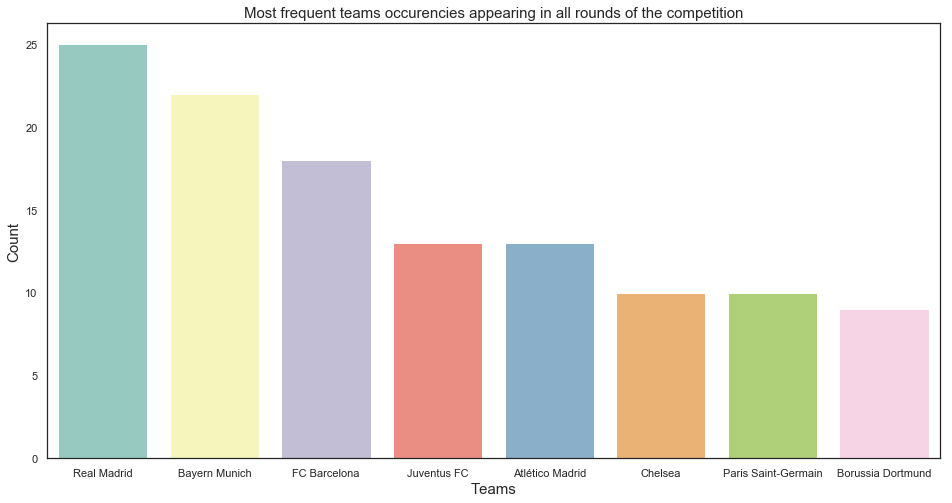

In [155]:
## Making a countplot in order to have a visual representation of the occurencies in the teams_round feature

occ_target = teams_round['team'] # we only want to visualize the team series
oft_occ = teams_round.team.value_counts().iloc[:8].index # only the first seven most occurencies interests me here

fig, ax = plt.subplots(figsize = (16, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target, data = teams_round, order = oft_occ, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in all rounds of the competition", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
        This countplot shows, as mentionned above, since 2011, that the competition has always been dominated by the big four in Europe (Real Madrid, Bayern Munich, FC Barcelona, Juventus FC). However, there are a lot of new emerging teams that become more and more powerful year after year (like Paris Saint-Germain, Atletico Madrid and Chelsea), mainly thanks to newly incoming investors that allow "low-mid tier teams" to buy and attract a lot of stars as well, which will also make them grow and stand at almost the same level as the top tier teams.
    </font>
</i>

In [156]:
## Making a function to see the teams that appear the most for each round of the competition (8th finals, Quarter-Finals, Semi_Finals, Finals)

def viz_round(subset, title):
    occ_target_per_round = subset['team']
    oft_occ_per_round = occ_target_per_round.value_counts().iloc[:8].index
    fig, ax = plt.subplots(figsize = (16, 10))
    sns.countplot(x = occ_target_per_round, data = subset, order = oft_occ_per_round, ax=ax) # creating the countplot 
    plt.title(title, fontsize = 15)
    plt.xlabel("Teams", fontsize = 15)
    plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

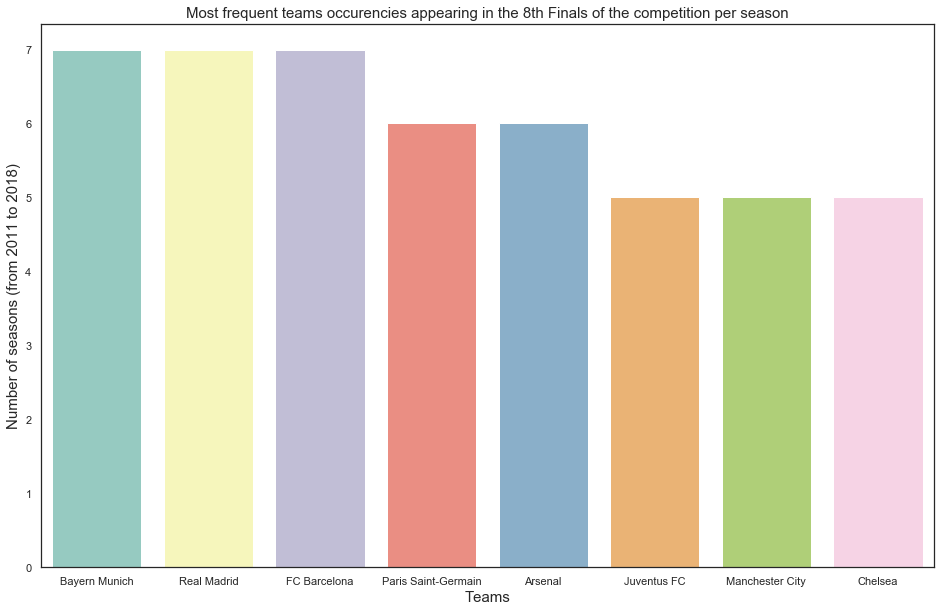

In [157]:
    # 8th finals
    
eig_finals = teams_round[teams_round['round'] == "8th Finals"] # filtering the subset team_rounds to only displaying the values corresponding to the 8th Finals

eig_finals.shape # (112, 18)
eig_finals.head()

viz_round(eig_finals, "Most frequent teams occurencies appearing in the 8th Finals of the competition per season")

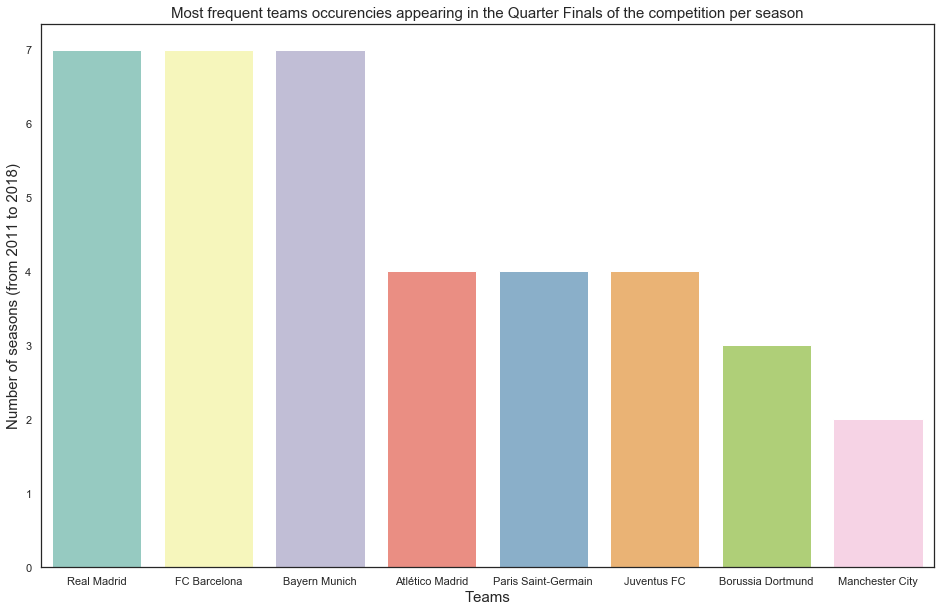

In [158]:
    # Quarter-finals
    
qter_finals = teams_round[teams_round['round'] == "Quarter Finals"] # filtering the subset team_rounds to quarter finals only

qter_finals.shape # (56, 18)
qter_finals.head()

viz_round(qter_finals, "Most frequent teams occurencies appearing in the Quarter Finals of the competition per season")

<i>
    <font color=33A8FF>
        Those countplots show that only the Real Madrid, FC Barcelona and the Bayern Munich has played the 8th Finals and Quarter Finals for each season from 2011 to 2018. For the other teams, it sometimes happen that they underperform due to some external factors (such as key players injuries, out of shape, team internal issues, etc ...).
        What can explain the fact that the Real Madrid, FC Barcelona and the Bayern Munich have always played the 8th Finals are due mainly thanks to their players quality (among the top 15 for each role : strikers, midfielders, defenders and goalkeepers) and their very large bench deep, so they can mainly ignore the players injuries as they can easily permutate them.
    </font>
</i>

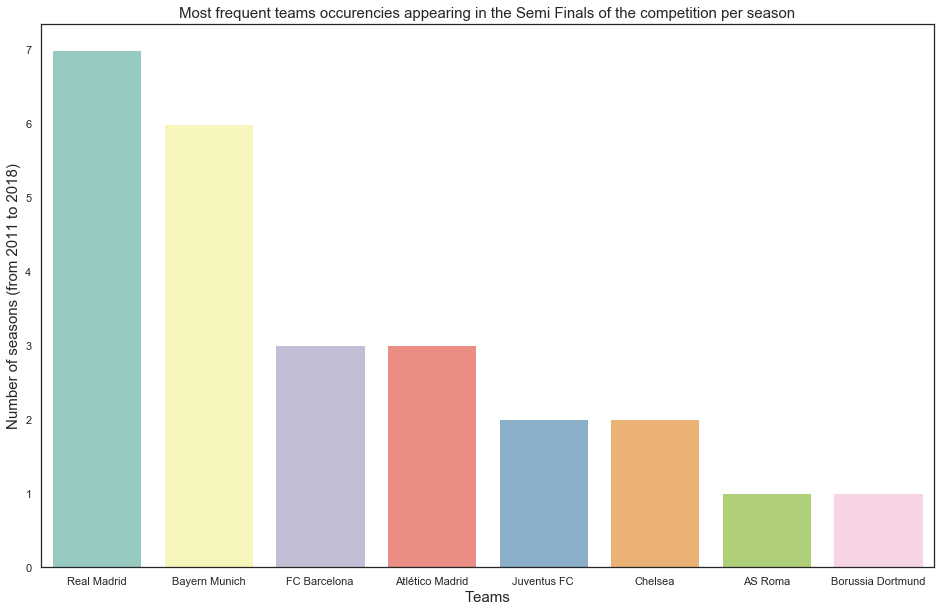

In [159]:
        # Semi-finals
    
semi_finals = teams_round[teams_round['round'] == "Semi Finals"] # filtering the subset team_rounds the semi finals only
semi_finals.shape # (28, 18)
semi_finals.head()

viz_round(semi_finals, "Most frequent teams occurencies appearing in the Semi Finals of the competition per season")

<i>
    <font color=33A8FF>
        Same explanation than above, except the fact starting from the quarter-finals, almost all the teams there are more or less at a very high level, so the teams chances to access to the semi-finals are mainly dependant of the randomness of the teams drawing (for each stage, each confrontation is determined by a draw system).
        This can explain why some teams like FC Barcelona or Juventus FC for example haven't made to the Semi-Finals each season.
    </font>
</i>

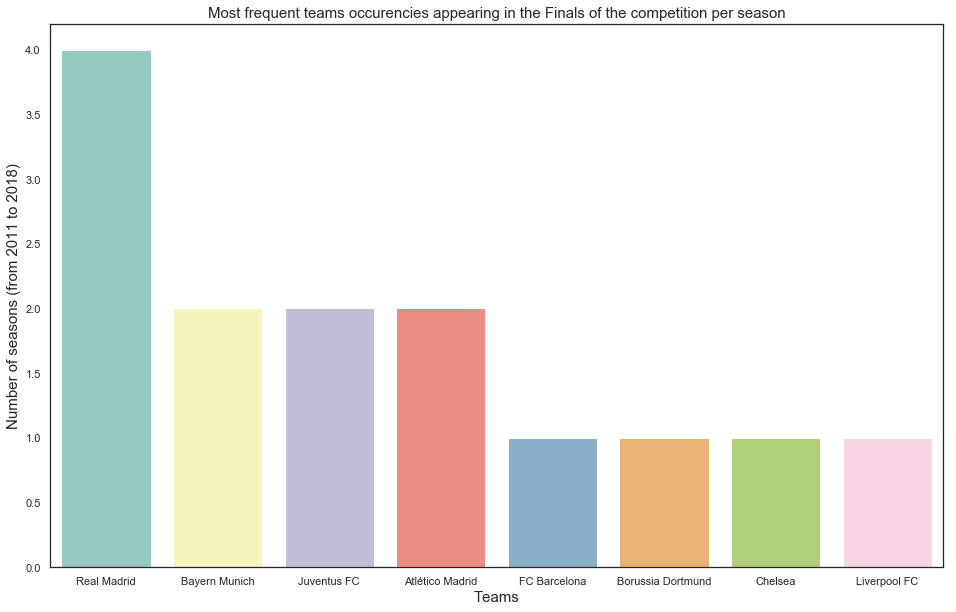

In [160]:
    # Finals
    
finals = teams_round[teams_round['round'] == "Finals"] # filtering the subset team_rounds to only displaying the values corresponding to the 8th Finals

finals.shape # (14, 18)
finals.head()

viz_round(finals, "Most frequent teams occurencies appearing in the Finals of the competition per season")

<i>
    <font color=33A8FF>
        This countplot show that the Real Madrid is the team that have played the more finals (4, for four success).
        But, this plot also shows some contradictions with what I said above (that the competition was roughly dominated by four teams).
        Actually, each year, the finals seem to be composed of one high-tier team and one "surprise" that managed to make his way to the finals (by winning by a small margin in the previous rounds, by luck at the teams drawing for example), which explain why the plot isn't entirely centered on the Big Four's teams. <br>
        
        
        Indeed, the final match for each season was :
            - 2011/2012 : Bayern Munich (favorite) vs Chelsea (underdog) -> victory of Chelsea
            - 2012/2013 : Bayern Munich (favorite) vs Borussia Dortmund (underdog) -> victory of Bayern Munich
            - 2013/2014 : Real Madrid (favorite) vs Atletico Madrid (underdog) -> victory of Real Madrid
            - 2014/2015 : FC Barcelona (favorite) vs Juventus FC (underdog) -> victory of FC Barcelona
            - 2015/2016 : Real Madrid (favorite) vs Atletico Madrid (underdog) -> victory of Real Madrid
            - 2016/2017 : Real Madrid (favorite) vs Juventus FC (underdog) -> victory of Real Madrid
            - 2017/2018 : Real Madrid (favorite) vs Liverpool FC (underdog) -> victory of Real Madrid
            
However, we can see that even if there are some underdogs in most finals, it's often the favorite team that won the tournament over the underdog though.
    </font>
</i>

In [161]:
## For the teams rankings depending on the detailed stats during the whole competition

print('Total number of observations : {}'.format(teams_detailed_stats.shape[0]))
teams_detailed_stats.team_names_detailed_stats.value_counts()

Total number of observations : 210


SL Benfica                7
Bayern Munich             7
FC Porto                  7
Manchester City           7
FC Barcelona              7
Real Madrid               7
Olympiakos                6
Arsenal                   6
Chelsea                   6
Paris Saint-Germain       6
Borussia Dortmund         6
Shakhtar Donetsk          6
Juventus FC               6
CSKA Moscow               6
FC Basel                  5
Bayer Leverkusen          5
Atletico Madrid           5
Manchester United         5
Zenit St Petersburg       5
Galatasaray               4
SSC Napoli                4
Ajax Amsterdam            4
Dynamo Kyiv               3
Valencia CF               3
Sevilla FC                3
Lyon                      3
Schalke 04                3
Celtic                    3
AC Milan                  3
AS Monaco                 3
                         ..
Maribor                   2
Borussia M.Gladbach       2
PSV Eindhoven             2
Spartak Moscow            2
Ludogorets Razgrad  

Text(0,0.5,'Number of seasons (from 2011 to 2018)')

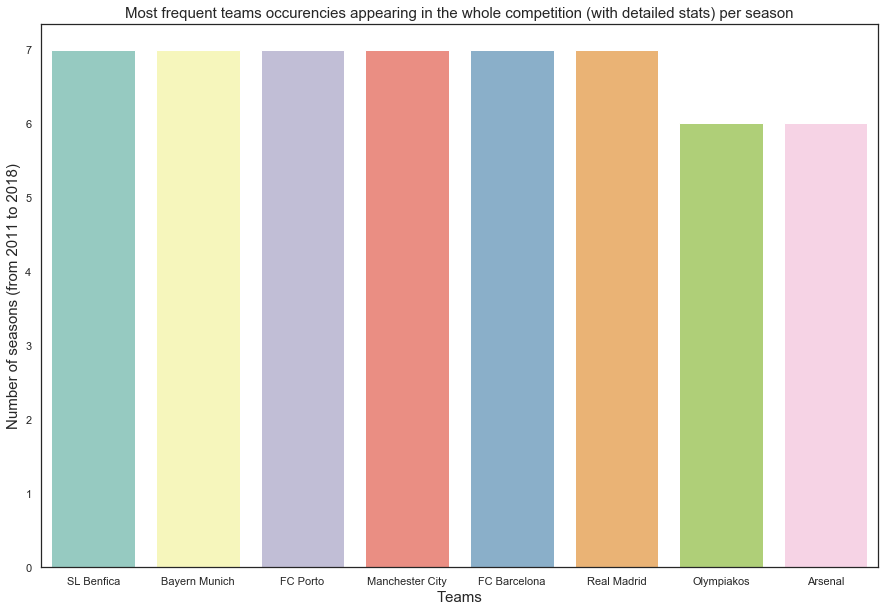

In [162]:
## Making a countplot in order to have a visual representation of the occurencies in the teams_detailed_stats feature

occ_target_2 = teams_detailed_stats['team_names_detailed_stats'] # we only want to visualize the team series
oft_occ_2 = teams_detailed_stats.team_names_detailed_stats.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 10)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_2, data = teams_detailed_stats, order = oft_occ_2, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in the whole competition (with detailed stats) per season", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

<i>
    <font color=33A8FF>
        This countplot shows for the whole competition, with advanced stats, that this competition is mostly dominated by the Big Four. However, as it only takes account the detailed stats of the competition, it explains why there are a lot of "low-tier" teams appearing in this ranking. Indeed, it could be interpreted as the fact that these teams are for example very in attack but very bad in defense, so it doesn't make them win matches, or it can also be interpreted by them overperforming in the group stages and performing very badly in the elimination round.
    </font>
</i>

In [163]:
### For the scorers

print('Total number of observations : {}'.format(scorers.shape[0]))
scorers.scorer_name.value_counts()

Total number of observations : 210


Karim Benzema                7
Cristiano Ronaldo            7
Lionel Messi                 7
Thomas Müller                6
Robert Lewandowski           6
Edinson Cavani               5
Mario Mandzukic              5
Gonzalo Higuaín              4
Neymar                       4
Sergio Agüero                4
Luis Suárez                  3
Pierre-Emerick Aubameyang    3
Arjen Robben                 3
Seydou Doumbia               3
Hulk                         3
Zlatan Ibrahimovic           3
Marco Reus                   3
Jackson Martínez             2
Vincent Aboubakar            2
Kylian Mbappé                2
Luiz Adriano                 2
Fernando Torres              2
Raheem Sterling              2
Arda Turan                   2
Roberto Soldado              2
Saúl Ñíguez                  2
Joshua Kimmich               2
Alexis Sánchez               2
Alex Teixeira                2
Antoine Griezmann            2
                            ..
Marcelo                      1
Admir Me

Text(0,0.5,'Count')

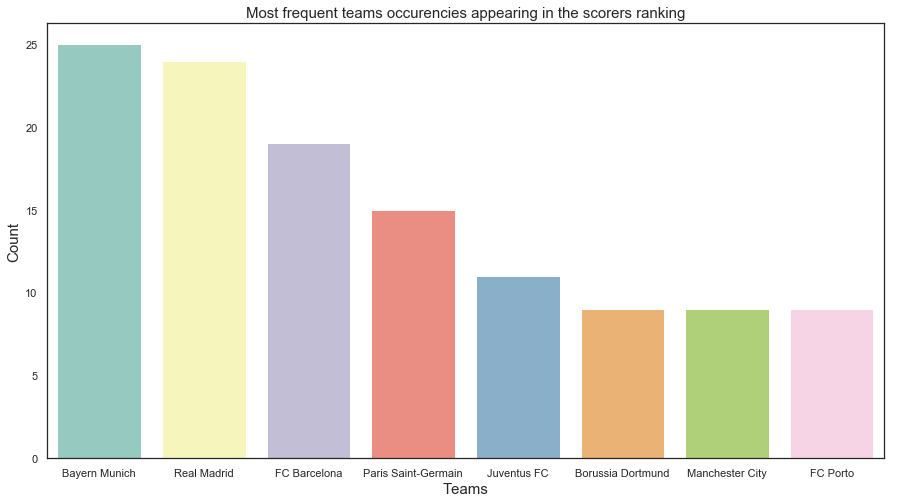

In [164]:
## Making a countplot in order to have a visual representation of the teams occurencies in the scorers feature

occ_target_2 = scorers['scorer_team'] # we only want to visualize the team series
oft_occ_2 = scorers.scorer_team.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_2, data = scorers, order = oft_occ_2, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in the scorers ranking", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0,0.5,'Number of seasons (from 2011 to 2018)')

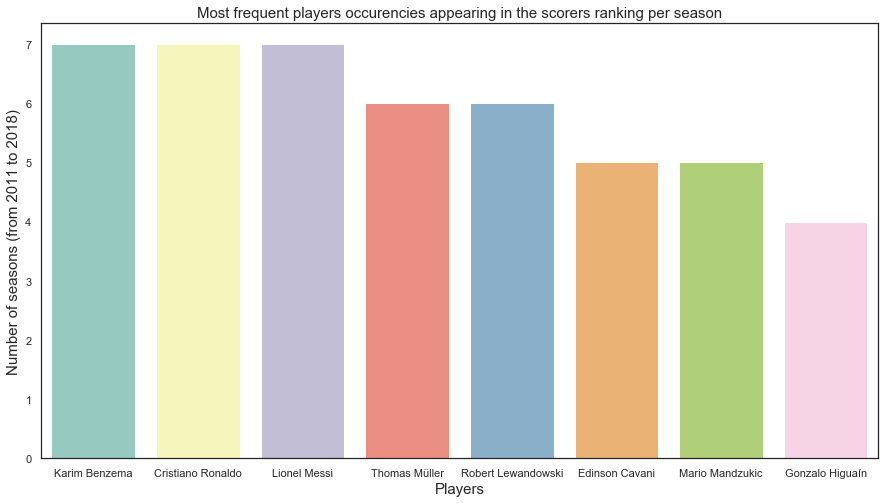

In [165]:
## Making a countplot in order to have a visual representation of the players occurencies in the scorers feature

occ_target_2 = scorers['scorer_name'] # we only want to visualize the team series
oft_occ_2 = scorers.scorer_name.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_2, data = scorers, order = oft_occ_2, ax=ax) # creating the countplot 
plt.title("Most frequent players occurencies appearing in the scorers ranking per season", fontsize = 15)
plt.xlabel("Players", fontsize = 15)
plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

<i>
    <font color=33A8FF>
        Those two countplots above shows that even among the scorers ranking, they are mostly playing for the best teams of the competition (Real Madrid, Bayern Munich, FC Barcelona ...) <br>
        So, there is a possibility that the more a team has a lot of good scorers in its rank, the more he has more chances to win the competition.
    </font>
</i>

In [166]:
### For the assists players

print('Total number of observations : {}'.format(assists.shape[0]))
assists.assist_name.value_counts()

Total number of observations : 210


Cristiano Ronaldo         6
Neymar                    4
Dani Alves                4
Luis Suárez               4
Thomas Müller             4
Lionel Messi              4
Ángel Di María            3
Toni Kroos                3
Karim Benzema             3
Mesut Özil                3
Marcelo                   3
Ezequiel Lavezzi          3
Juanfran                  3
Isco                      3
Xavi                      2
Zlatan Ibrahimovic        2
Alexis Sánchez            2
Sami Khedira              2
Nicolás Gaitán            2
Douglas Costa             2
Dries Mertens             2
Bastian Schweinsteiger    2
James Rodríguez           2
Thiago                    2
Frank Lampard             2
Cesc Fàbregas             2
Wayne Rooney              2
Dani Carvajal             2
Hakan Calhanoglu          2
Andrés Iniesta            2
                         ..
Fabian Frei               1
Isaac Cuenca              1
Danilo Pereira            1
Fabinho                   1
Ricardo Quaresma    

Text(0,0.5,'Count')

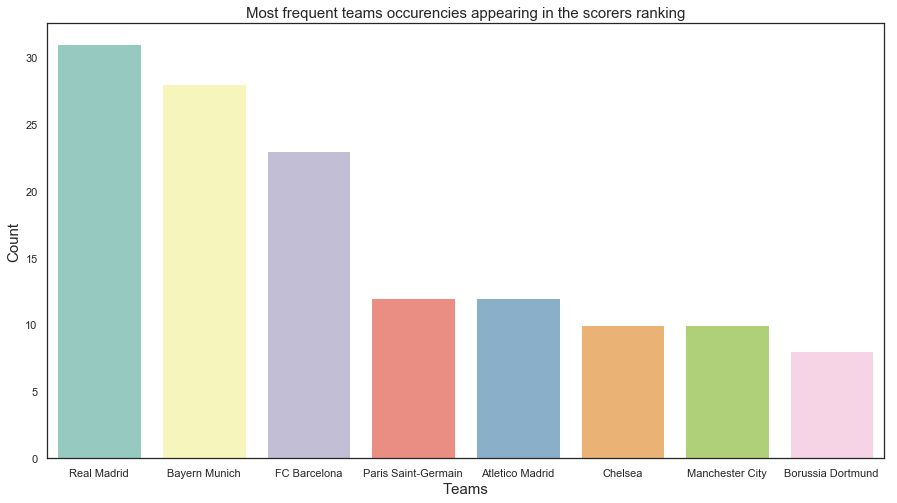

In [167]:
## Making a countplot in order to have a visual representation of the teams occurencies in the assists feature

occ_target_4 = assists['assist_team'] # we only want to visualize the team series
oft_occ_4 = occ_target_4.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_4, data = assists, order = oft_occ_4, ax=ax) # creating the countplot 
plt.title("Most frequent teams occurencies appearing in the scorers ranking", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Text(0,0.5,'Number of seasons (from 2011 to 2018)')

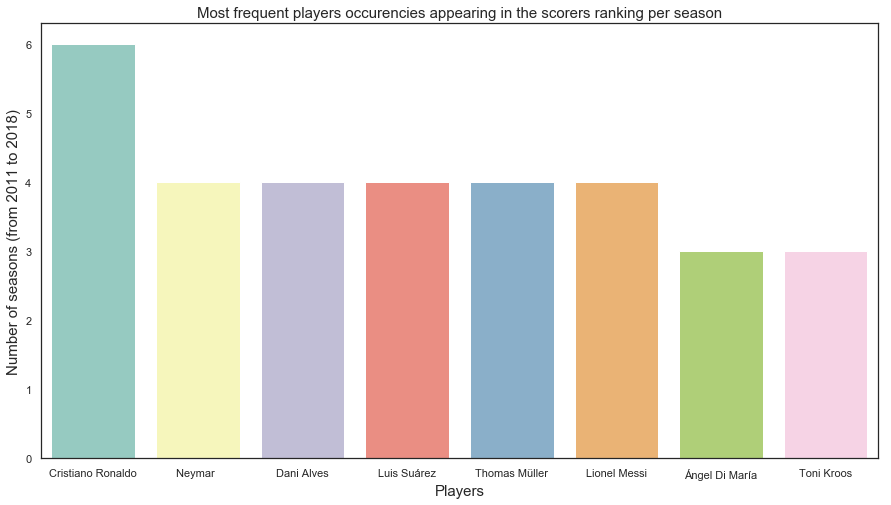

In [168]:
## Making a countplot in order to have a visual representation of the players occurencies in the assists feature

occ_target_4 = assists['assist_name'] # we only want to visualize the team series
oft_occ_4 = occ_target_4.value_counts().iloc[:8].index # only the first eight most occurencies interests me here

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.countplot(x = occ_target_4, data = assists, order = oft_occ_4, ax=ax) # creating the countplot 
plt.title("Most frequent players occurencies appearing in the scorers ranking per season", fontsize = 15)
plt.xlabel("Players", fontsize = 15)
plt.ylabel("Number of seasons (from 2011 to 2018)", fontsize = 15)

<i>
    <font color=33A8FF>
        Same statement than the scorers case.
    </font>
</i>

##### Highlights

<i>
With this first quick analysis, we can already notice that there are four teams (also called the Big Four in Europe) that are very dominant in this competitions :
    - Real Madrid (a 13 times Champions League winner, one of the two best Spanish team with the FC Barcelona)
    - Bayern Munich (a 5 times Champions League winner, the best German team since almost 8 years in a row)
    - FC Barcelona (a 5 times Champions League winner, one of the two superpower in Spain with the Real Madrid)
    - Juventus FC (a 1 time Champions League winner, the best Italian team since 9 years in a row)
    
Indeed, by calculating the occurencies of each team we see that :
    - Real Madrid represents 11% of the observations
    - Bayern Munich represents 10,4% of the observations
    - FC Barcelona represents 8,6% of the observations
    - Juventus FC represents 6,2% of the observations

Those four teams already represent 36,2% of the total observations of the dataset.

Furthermore, regarding the players analysis, we can notice that the players that have the best frequencies are :
    - Cristiano Ronaldo (played for Real Madrid from 2009 to 2018 and is currently playing at Juventus FC in 2019, the best scorer in UCL since 2013)
    - Lionel Messi (playing for FC Barcelona, the second best scorer in the history of the UCL behind Cristiano Ronaldo and a genius assist player)
    - Robert Lewandowski (playing for Bayern Munich, the best scorer in Germany since 2012)
    - Thomas Müller (playing for Bayern Munich, one of the best german players)
    - Mario Mandzukic & Gonzalo Higuain (playing for Juventus FC, among the best scorers in the world)
    - Dani Alves (playing for Juventus FC, one of the best defenders in the world)
    - Neymar & Luis Suarez (playing for FC Barcelona, among the best strikers in the world)
    - Isco & Toni Kroos (playing for Real Madrid, among the best midfielders in the world)
    
So, even for the players, it seems that the best ones are those with the best frequencies, which is quite logical if their respective teams are performing well.

We may have a first correlation between players and teams performances and an answer to one of our questions above here !
</i>

###### For teams_round subset

<i>
    We're gonna make some descriptive and graphical analysis on this subset in order to extract potential useful informations to be able to answer our interrogations.
</i>

In [169]:
#### Looking at the descriptive statistics for each of the subset in order to check there are not strange values, also called "outliers".

### Overview of the teams_round subset

teams_round.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,8,WW,42,50,17,83,75,3.75
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,3,DW,50,50,0,92,75,3.66
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,6,LW,38,46,15,92,38,2.85
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,1,LW,38,62,0,83,62,3.47
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,1,WL,40,50,20,80,60,3.00


In [170]:
### For all of the teams performances in each round of the competition, in overall

teams_round.describe()

,team_rank,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,6.166667,1.933333,0.776190,0.380952,0.776190,2.880952,2.885714,0.004762,37.933333,50.814286,18.228571,79.985714,58.852381,2.979095
std,4.460977,0.250040,0.665201,0.542561,0.665201,1.944227,1.943283,2.942020,15.712590,16.837779,13.011410,14.498137,18.663787,0.676703
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,10.000000,0.000000,30.000000,10.000000,1.200000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,25.000000,38.000000,10.000000,70.000000,40.000000,2.500000
50%,5.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,38.000000,50.000000,17.000000,81.500000,58.000000,2.900000
75%,9.000000,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,50.000000,62.000000,25.000000,92.000000,75.000000,3.415000
max,16.000000,2.000000,2.000000,2.000000,2.000000,10.000000,10.000000,8.000000,77.000000,92.000000,63.000000,100.000000,100.000000,4.500000


In [171]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib(feature, title):
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=False, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

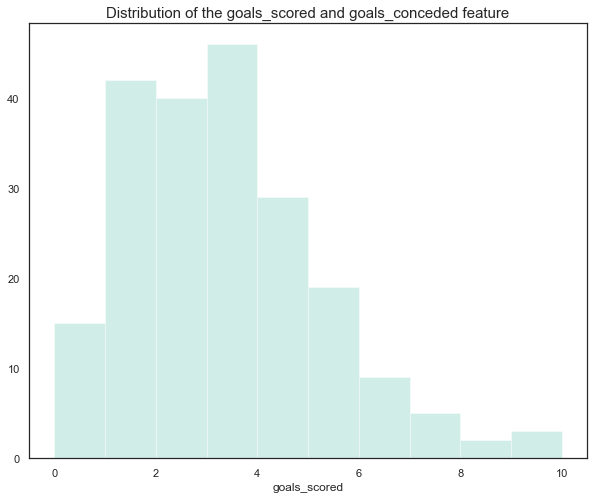

In [172]:
### Looking at the univariate distribution of the relevant features of the subset teams_round

## goals_scored & goals_conceded as they almost have the same distribution

feature_1 = teams_round['goals_scored']
distrib(feature_1, "Distribution of the goals_scored and goals_conceded feature")

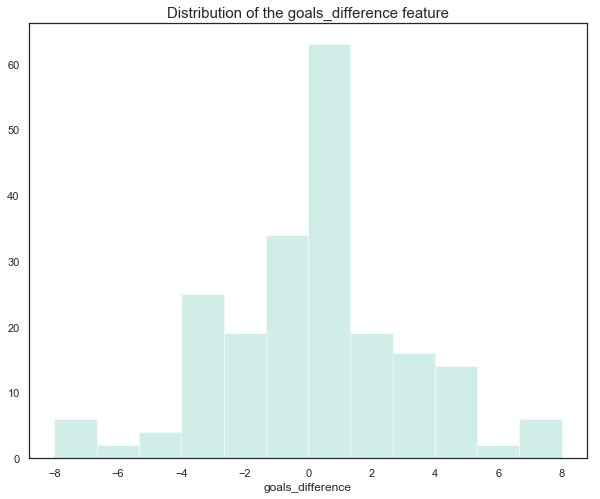

In [173]:
## goals_difference

feature_2 = teams_round['goals_difference']
distrib(feature_2, "Distribution of the goals_difference feature")

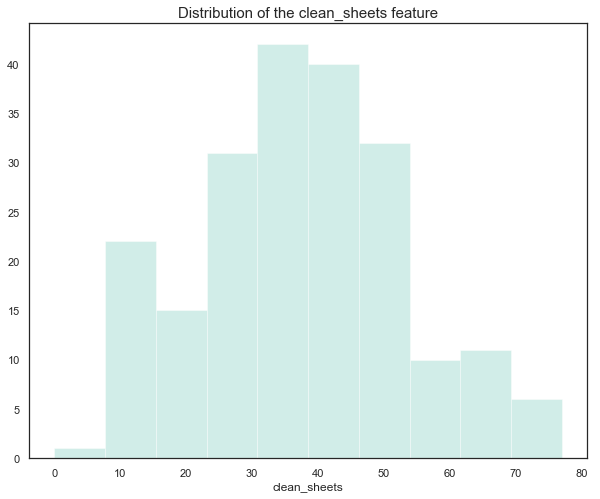

In [174]:
## clean_sheets

feature_3 = teams_round['clean_sheets']
distrib(feature_3, "Distribution of the clean_sheets feature")

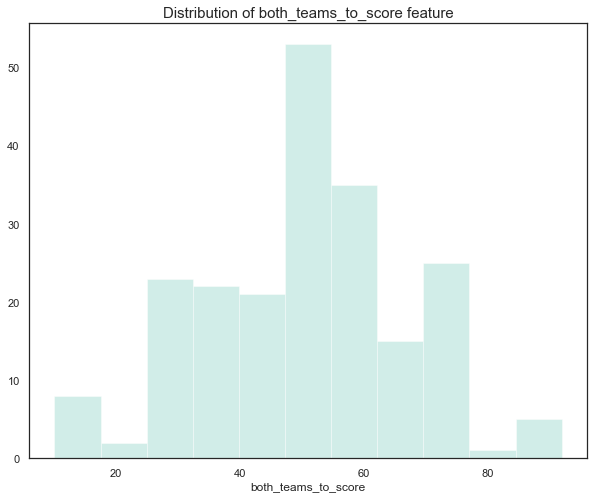

In [175]:
## both_teams_to_score

feature_4 = teams_round['both_teams_to_score']
distrib(feature_4, "Distribution of both_teams_to_score feature")

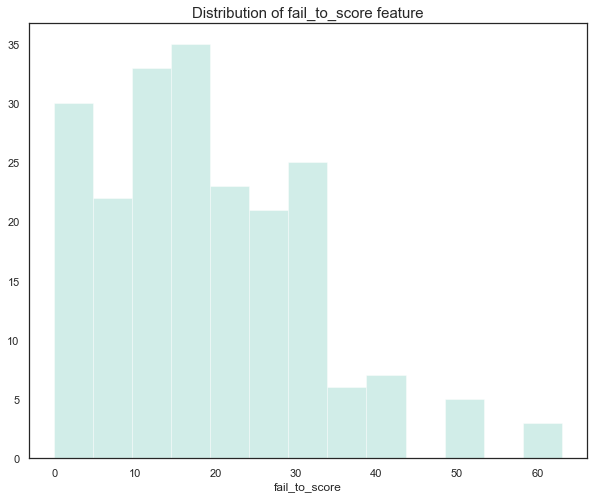

In [176]:
## fail_to_score

feature_5 = teams_round['fail_to_score']
distrib(feature_5, "Distribution of fail_to_score feature")

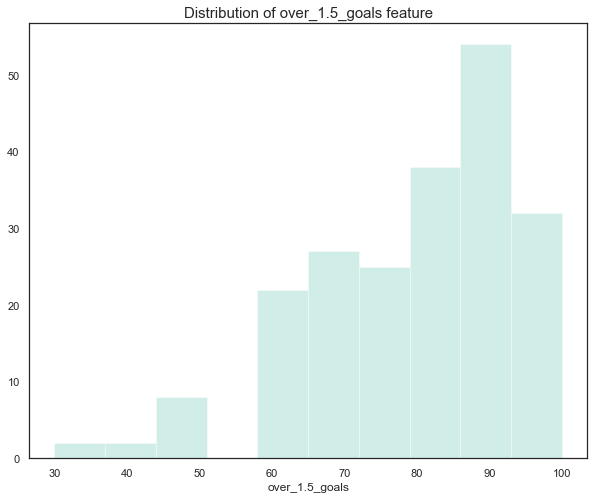

In [177]:
## over_1.5_goals

feature_6 = teams_round['over_1.5_goals']
distrib(feature_6, "Distribution of over_1.5_goals feature")

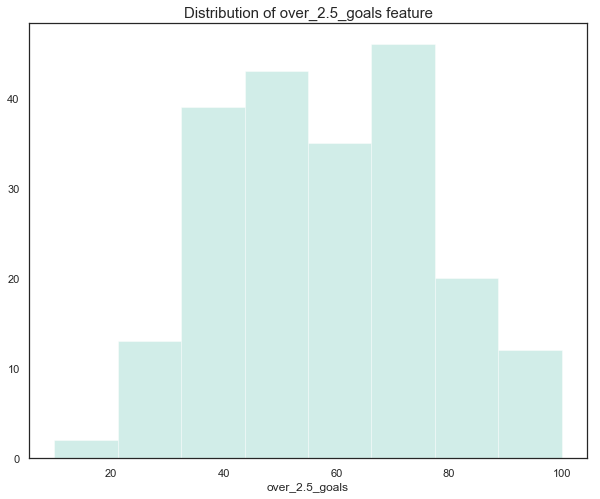

In [178]:
## over_2.5_goals

feature_7 = teams_round['over_2.5_goals']
distrib(feature_7, "Distribution of over_2.5_goals feature")

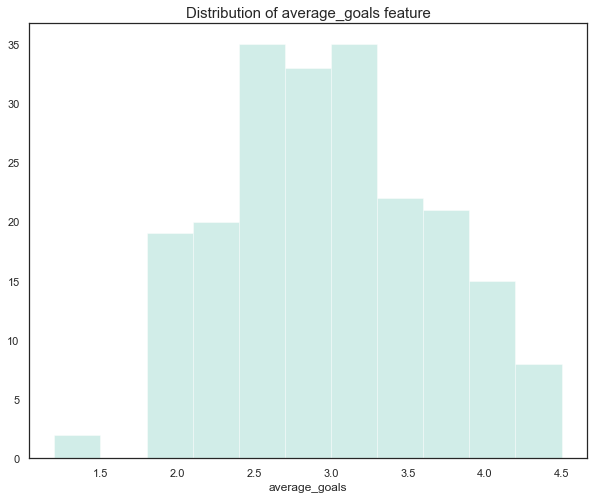

In [179]:
## average_goals

feature_8 = teams_round['average_goals']
distrib(feature_8, "Distribution of average_goals feature")

<i>
    <font color=33A8FF>
        We can observe that all of those univariate continuous features seem to be normally distributed (symbolized with bell curve), with a standard deviation that is not too large, which means that there are very few disparities and zero outliers in this subset's features.
    </font>
</i>

In [180]:
## Function to have an overview of potential correlation between two features    

def bi_distrib(x_feature, y_feature, data, title, hue):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, hue = hue, data = data)
    plt.title(title, size = 12)
    
def bi_distrib_2(x_feature, y_feature, data, title):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, data = data)
    plt.title(title, size = 12)  

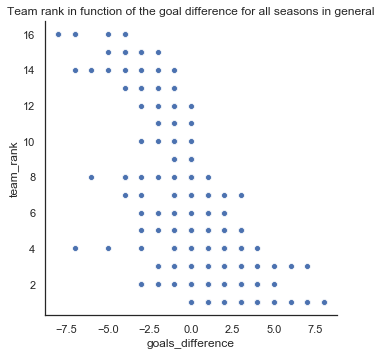

In [181]:
## is the rank of the team depending on the goal difference for all seasons in general ? 

bi_distrib_2("goals_difference", "team_rank", teams_round, "Team rank in function of the goal difference for all seasons in general")

<i>
    <font color=33A8FF>
        First, the team_rank feature is a feature that displays the rank of a team (1-16 in the 8th Finals, 1-8 in the Quarter Finals, 1-4 in the Semi Finals and 1-2 in the Finals), so basically, the more a team has a low rank, the more it means that it's a good team (For example, in the 8th Finals, Rank 1 = Best team & Rank 16 = Worst Team). <br><br>
        We can observe in this scatterplot that the goals difference (Which is the difference between the goals scored and conceded by a team, so it basically tells us if a team is winning a match or not. Indeed, if a team has a positive goals difference, it means that he would have scored more goals than he has conceded) is negatively correlated (around 50-60%, which is correct for the Machine Learning part). <br><br>
        Indeed, it's possible to notice that the more the goals difference increase, the more the team ranking decrease; which is a logical pattern because if a team have a high goals difference, it's very likely that scored a lot of goals and conceded a very few goals, resulting in a high probability of having won the matches and thus, making his ranking increase.
    </font>
</i>

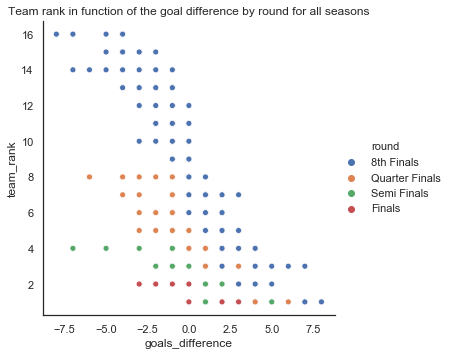

In [182]:
## is the rank of the team depending on the goal difference for each round for all seasons ?

bi_distrib("goals_difference", "team_rank", teams_round, "Team rank in function of the goal difference by round for all seasons", "round")

<i>
    <font color=33A8FF>
        Indeed, it's possible to see that the more a team is advanced in the competition stage, the more its goals difference decrease. The decrease of the team ranking is normal here because as the competition advances, the number of teams remaining of the competition naturally decreases.<br><br>
        This can simply be explained by the fact, the more a team advance thorugh the competition stage, the more we will have to another high level team, which makes their matches more tight, resulting in a lower goals difference; whereas in the 8th Finals, it often happens that a high tier team faces a low-medium tier team, that's why they sometimes have a high goals difference there.
    </font>
</i>

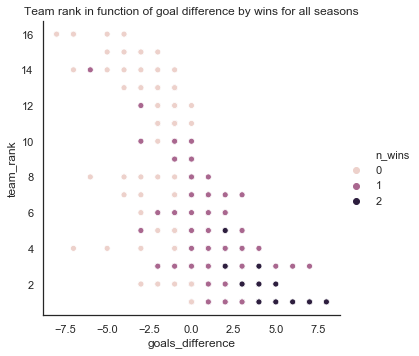

In [183]:
## does the goal difference increases team winning possibility, thus increasing their rank for all seasons ?

bi_distrib("goals_difference", "team_rank", teams_round, "Team rank in function of goal difference by wins for all seasons", "n_wins")

<i>
    <font color=33A8FF>
        As explained below, we can in fact see here that a team with a high goal difference is more likely to win matches. <br><br>
        The number of wins is between 0 and 2 because for each round, only two matches are played per team (indeed, each round is played in a two legs system, with the scored of both matches being aggregated), so they can only have 2 wins max per round.
    </font>
</i>

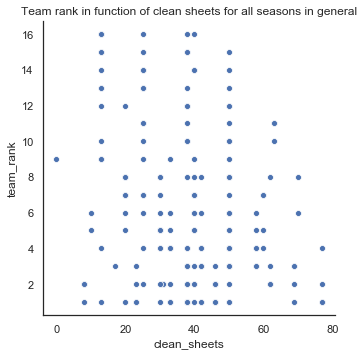

In [184]:
## is the rank of a team depending on the number of clean sheets for all seasons in general ?

bi_distrib_2("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons in general")

<i>
    <font color=33A8FF>
        In this plot, we can see that clean sheets percentage of a team (number of matches in which a team doesn't concede a goal) is very lowly correlated to the team abilities to win matches and thus, its ranking.<br><br>
        This is a actually an expected behavior, as a matter of fact, as surprising as it can seems, not conceding goals don't necessarly make you win games.<br><br>
        Indeed, when you don't concede a goal, the result of a match can be :
            - a victory (for example, 1-0, 2-0)
            - a draw (for example, 0-0)

  That's why, even if a team has high clean sheets percentage, there is a probability that he got a lot of draws as a result instead of victory !
    </font>
</i>

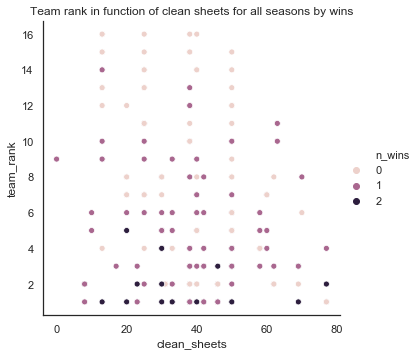

In [185]:
## is the rank of the team depending on the number of clean sheets for all seasons by wins?

bi_distrib("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons by wins", "n_wins")

<i>
    <font color=33A8FF>
        For example, here we can see that among the teams that won one game or both games per round, some of them have a disastrous clean sheets percentage (under 20%). So, we have proven here that having a good clean sheets percentage is not mandatory to win games.<br><br>
        However, it's possible to notice that above a clean sheets percentage of 40%, a team is more likely to win a game though. <br><br> 
        So, we have proven here that having a good clean sheets percentage is not mandatory to win games.
    </font>
</i>

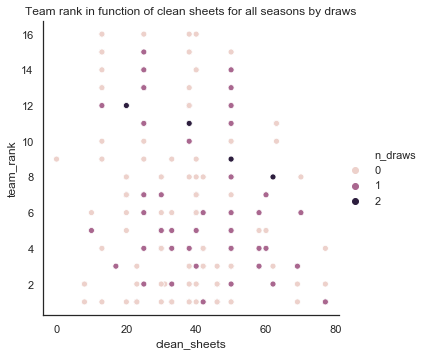

In [186]:
## is the rank of the team depending on the number of clean sheets for all seasons by draws?

bi_distrib("clean_sheets", "team_rank", teams_round, "Team rank in function of clean sheets for all seasons by draws", "n_draws")

<i>
    <font color=33A8FF>
        We can see here that between 20% and 60% of clean sheets percentage, a team is more likely to have a draw as a result of their games, which most frequently results to a mid-low rank.
    </font>
</i>

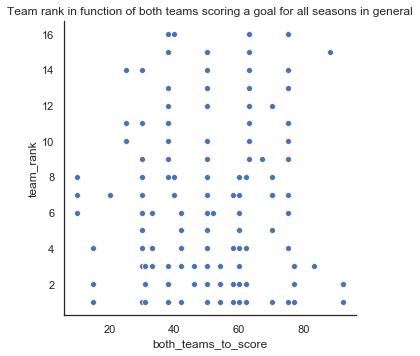

In [187]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons in general?

bi_distrib_2("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons in general")

<i>
    <font color=33A8FF>
       We can see in this plot that a team ranking (it's probability of winning games) and the both_teams_to_score percentage (which is the probability that both teams scored in a match) are lowly correlated. <br><br>
        This behavior can be explained logically, indeed, this metric can provoke three kind of results :
            - a victory (2-1, 3-2, 4-2)
            - a draw (1-1, 2-2, 3-3)
            - a defeat (1-2, 2-5, 3-6)
As this feature can provoke all the three possible issues, it's normal that it has a minimal influence on the team ranking.
    </font>
</i>

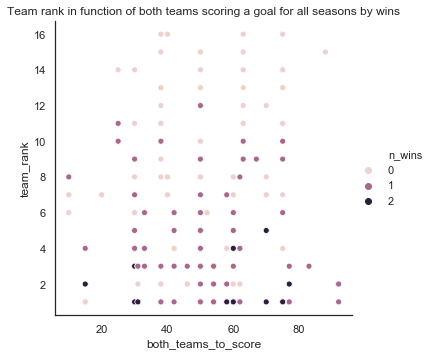

In [188]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons by wins?

bi_distrib("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons by wins", "n_wins")

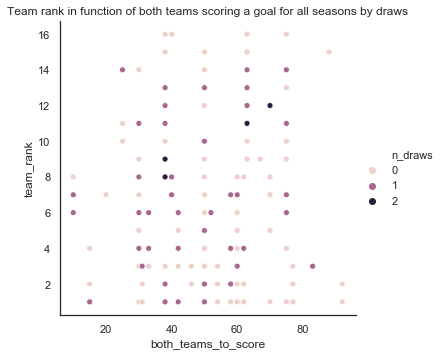

In [189]:
## is the rank of the team depending on the number of matches where both teams score a goal for each round for all seasons by draws?

bi_distrib("both_teams_to_score", "team_rank", teams_round, "Team rank in function of both teams scoring a goal for all seasons by draws", "n_draws")

<i>
    <font color=33A8FF>
        Indeed, in those two plots above, you can see that independently of this metric percentage, some teams are winning (some of them are only at 15%, other are at 77%), some are drawing (38%, 72%) and some of them are losing (40%, 92%).
    </font>
</i>

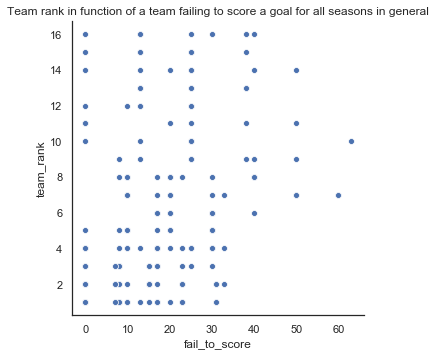

In [190]:
## does the number of match where a team failed to score a goal have an influence on the team ranking in general?

bi_distrib_2("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons in general")

<i>
    <font color=33A8FF>
       Here, we can see that the team ranking and the fail_to_score feature (which the probability that a team fail to score during a match), is positively correlated a little bit (around 20%). <br><br>
        This pattern can be explained by the fact that even if a team fail to score, it doesn't mean that he loses the match (he can do a draw); thus, avoiding him to increase/decrease his rank (according on if it's a loss or a draw, if it's a loss its rank will increase as it's a bad result, if it's a draw the rank can decrease a it's an average result).
    </font>
</i>

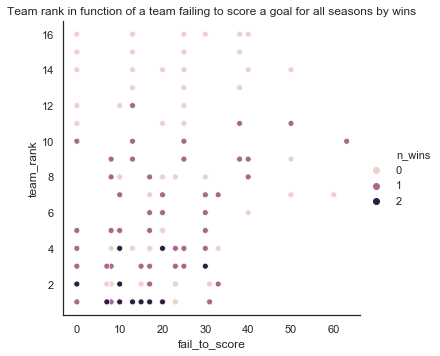

In [191]:
## does the number of match where a team failed to score a goal have an influence on the team ranking by wins?

bi_distrib("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by wins", "n_wins")

<i>
    <font color=33A8FF>
        We can observe in this plot that the winning teams have a very low fail_to_score percentage (mainly below 20%), whereas the mid-low tier teams have a medium-high percentage (between 20% and 50%).
    </font>
</i>

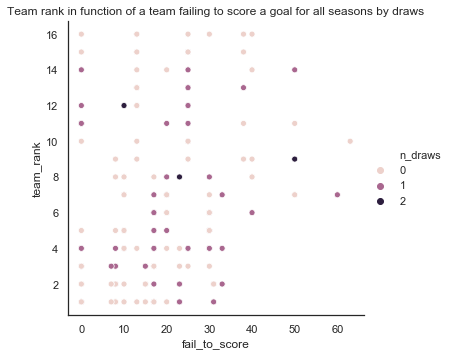

In [192]:
## does the number of match where a team failed to score a goal have an influence on the team ranking by draws?

bi_distrib("fail_to_score", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by draws", "n_draws")

<i>
    <font color=33A8FF>
        We can observe here that teams with a fail_to_score percentage between 10% and 40% have a high probability of doing draws.
    </font>
</i>

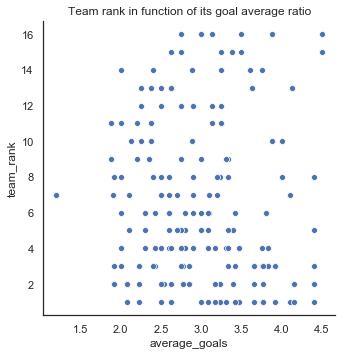

In [193]:
## does a team with a high average goal rate have more chances to be high ranked ? (which basically means that he is winning a lot of games)

bi_distrib_2("average_goals", "team_rank", teams_round, "Team rank in function of its goal average ratio")

<i>
    <font color=33A8FF>
        We can enhance here that there is a slight positive correlation between a team ranking and its goals average (which a mean of the goals scored by a team in the whole competition). <br><br>
        This behavior can be explained by the fact that even if a team score a lot of goals, he doesn't necessarly win the match actually. <br><br>
        Indeed, here are some possible scenarios when a team score a lot of goals (usually in football, a team is considered having scored a lot of goals when he has scored 3 or more goals):
            - he can win the match by a large margin (for example, 3-0, 6-0)
            - he can make a draw (for example, 3-3, 6-6)
            - he can lose the match (for example, 4-5, 6-7)
Which is why this feature isn't entirely correlated to a team ranking.
    </font>
</i>

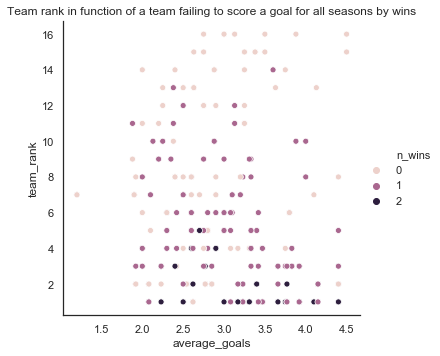

In [194]:
## does the number of match where a team with a high average goals have an influence on its ranking by wins?

bi_distrib("average_goals", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by wins", "n_wins")

<i>
    <font color=33A8FF>
        This plot show us that the winning teams generally have an average goals rate between 3 and 4.2 goals per match whereas the losing teams are more generally between 1.7 and 3.4 goals per match. <br><br>
        So, indeed, having a high average goals don't guarantee a team to win a match, as symbolized by the fact that you can have a high average goals rate and win/lose the game (there are both winning and losing teams with an average goals rate over 3.2, displayed by the black and white dots on the scatterplot)
    </font>
</i>

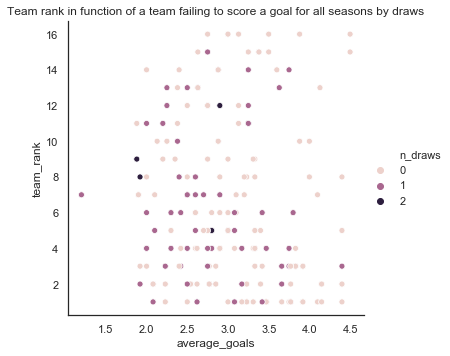

In [195]:
## does the number of match where a team with a high average goals have an influence on its ranking by draws?

bi_distrib("average_goals", "team_rank", teams_round, "Team rank in function of a team failing to score a goal for all seasons by draws", "n_draws")

<i>
    <font color=33A8FF>
       Regarding draws, most of teams are between an average goals rate of 2.0 and 4.0 goals per match, which once again displays that this feature doen't necessarly have an influence on a team winning probabilities.
    </font>
</i>

Text(0.5,1.02,'Pairplot representing the correlations between the offensive and defensive stats')

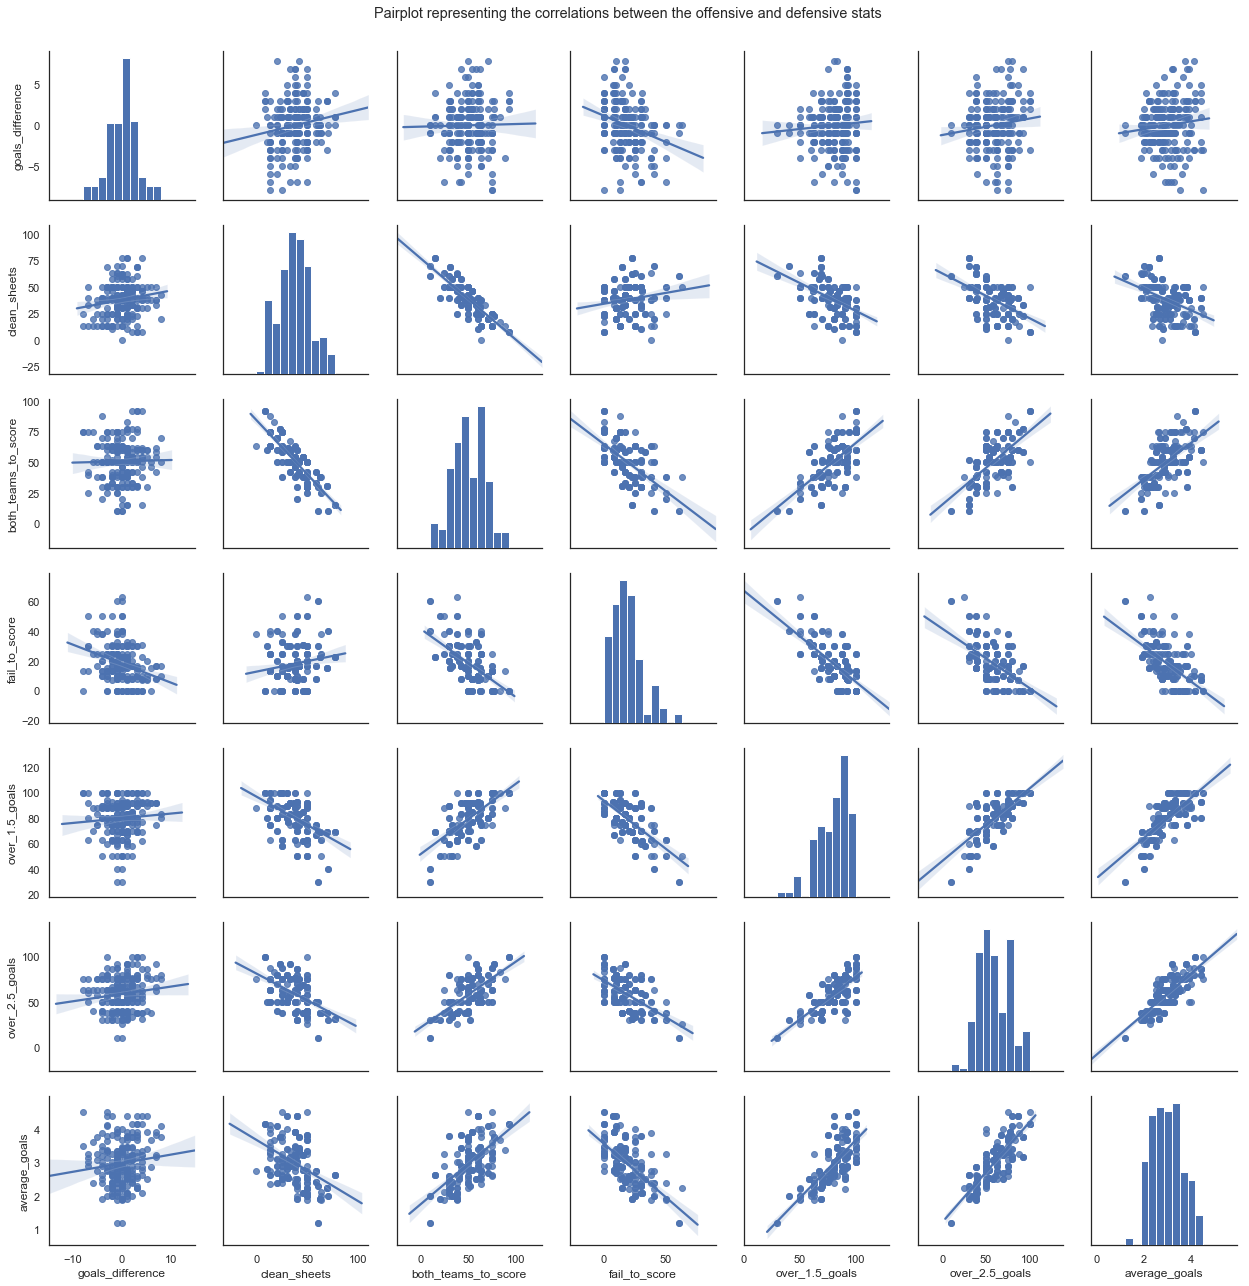

In [196]:
## visualizing pairwise relationships in the subset for the offensive and defensive stats (excluding the team ranking and the results)

off_def_stats = ['goals_difference', 'clean_sheets', 'both_teams_to_score', 'fail_to_score', 'over_1.5_goals', 'over_2.5_goals', 'average_goals']
pair_data = teams_round[off_def_stats]

pair_data.head()

sns.pairplot(pair_data, kind = "reg").fig.suptitle("Pairplot representing the correlations between the offensive and defensive stats", y = 1.02)

<i>
    <font color=33A8FF>
          This pairplot displayed all the correlations between the offensive (both_teams_to_score) and defensive stats (for example, clean sheets percentage).<br><br>
           We can notice that all of the expected correlations seem to be normal, for example, the both_teams_to score percentage and the clean sheets percentage are highly negatively correlated, which is logical because if both teams score a goal, there are no clean sheets for both teams. That's why if the percentage of clean sheets percentage increase, the percentage of the both_teams_to_score percentage will decrease.
    </font>
</i>

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset')

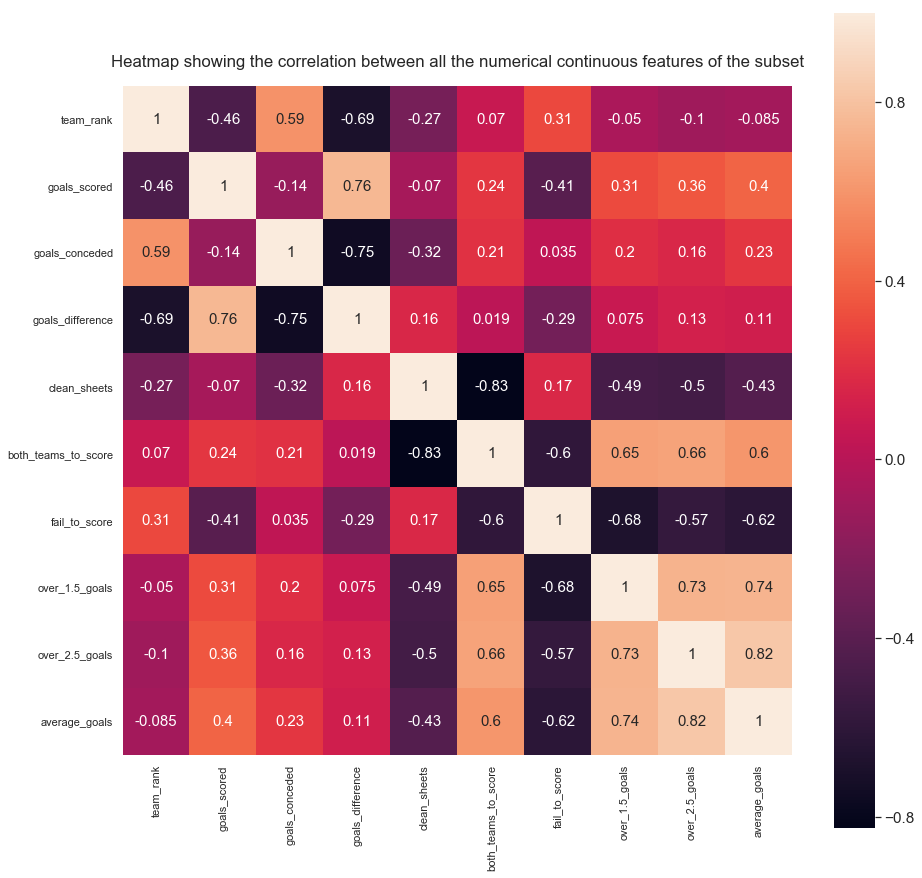

In [197]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient = ['team_rank', 'goals_scored', 'goals_conceded', 'goals_difference', 'clean_sheets', 'both_teams_to_score', 'fail_to_score', 
                                    'over_1.5_goals', 'over_2.5_goals', 'average_goals']

features_hm = teams_round[features_coefficient]

features_hm.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1.4)
sns.heatmap(features_hm.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset', y = 1.02)

<i>
    <font color=33A8FF>
        Overall, it seems that all of our features aren't very correlated, which is a good things for our future Machine Learning models accuracy.
    </font>
</i>

##### Quick observations for the teams per round

<i>
We can first notice that the subset is normally distributed (so the normal law can be applied on it), and overall the standard deviation seems to not be to high so there aren't a lot of values dispersion so we can conclude that the data seems to be homegeneous.
    
There are no outliers in these subsets as well. <br><br>

Then, by observing more in details all of the teams performances in each round from 2011 to 2018, we can see that :
        - the average percentage of wins is about 77,6%
        - the average percentage of draws is about 38%
        - the average percentage of losses is about 77,6%
        - the average of goals scored is about 2,88 goals/match (which is in the standard each year, in 2019 the average goals scored per match is 2,86)
        - the average of goals conceded is about 2,89 goals/match
        - in average, there are around 51 matches where both teams managed to score a goal and 18 matches where a team failed to score a goal.
        - 25% of teams have a goals difference below -2 goals per match, around 25 clean sheets, 70 matches where they score more than 1.5 goals, 40   matches where they score more than 2.5 goals and with an average goals of 2.5 goals/match (which corresponds to the low-rank teams that got smashed by the favorites)
        - 25% of teams have a goals difference above 2 goals per match, around 50 clean sheets, 92 matches where they score more than 1.5 goals, 75 matches where they score more than 2.5 goals and with an average goals of 3.42 goals/match (which probably corresponds to the top-tier teams of the competition)
        - around 50% of teams have a goals difference of 0 (which probably corresponds to the average teams of the competition)
</i>

###### For teams_detailed_stats subset

<i>
We are going to do the same steps that the subset below in order to learn more from this subset and to find eventual relationships between features.
</i>

In [198]:
## Overview of the teams_detailed_stats subset

teams_detailed_stats.head()

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
1,2011/12,2,Real Madrid,35,19.1,22,1,56.1,85.9,7.15
2,2011/12,3,FC Barcelona,35,19.5,17,0,68.2,90.5,7.15
3,2011/12,4,Bayern Munich,26,19.1,27,1,55.1,86.2,7.11
4,2011/12,5,Valencia CF,12,16.7,11,0,58.5,85.1,7.04


In [199]:
### For all of the teams performances in the whole competition

teams_detailed_stats.describe()

,team_rank_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,15.500000,12.023810,13.050476,15.561905,0.714286,49.873810,81.392857,6.817000
std,8.676124,8.124298,3.081000,5.560324,0.832524,5.899893,4.539175,0.205074
min,1.000000,1.000000,5.500000,4.000000,0.000000,36.300000,65.500000,6.350000
25%,8.000000,6.000000,10.800000,12.000000,0.000000,46.100000,78.625000,6.680000
50%,15.500000,9.500000,12.850000,15.000000,1.000000,49.600000,81.600000,6.820000
75%,23.000000,15.750000,14.800000,19.000000,1.000000,53.200000,84.400000,6.940000
max,30.000000,41.000000,21.700000,34.000000,4.000000,68.200000,90.500000,7.310000


In [200]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib_2(feature, title):
    sns.set(style = "white", palette = "Set1")
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=False, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

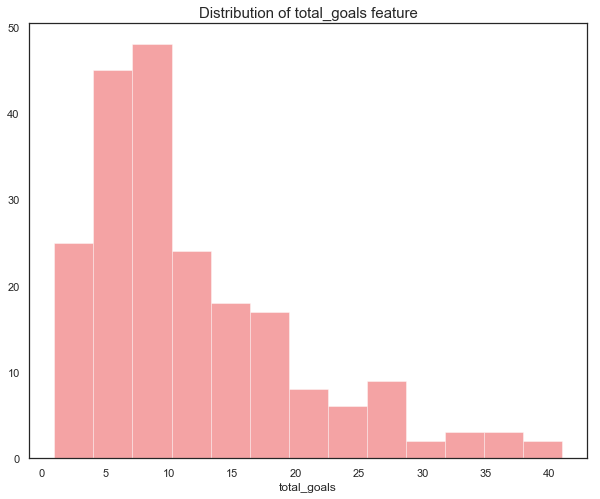

In [201]:
## Distribution of total_goals

feat_1 = teams_detailed_stats['total_goals']
distrib_2(feat_1, "Distribution of total_goals feature")

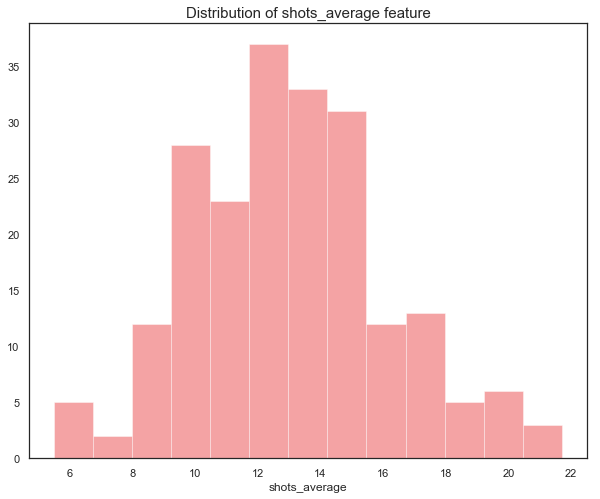

In [202]:
## Distribution of shots_average

feat_2 = teams_detailed_stats['shots_average']
distrib_2(feat_2, "Distribution of shots_average feature")

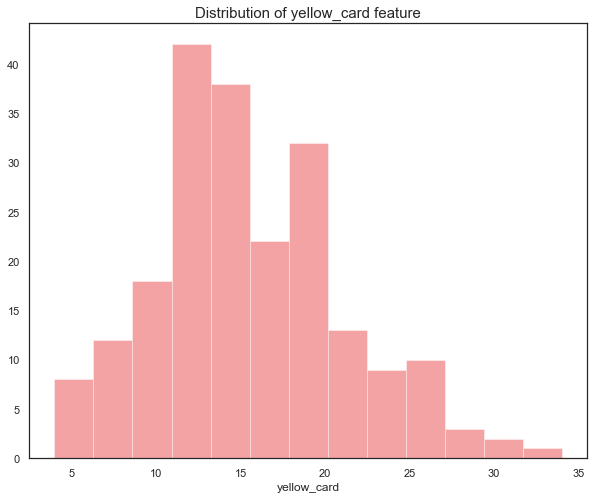

In [203]:
## Distribution of yellow_card

feat_3 = teams_detailed_stats['yellow_card']
distrib_2(feat_3, "Distribution of yellow_card feature")

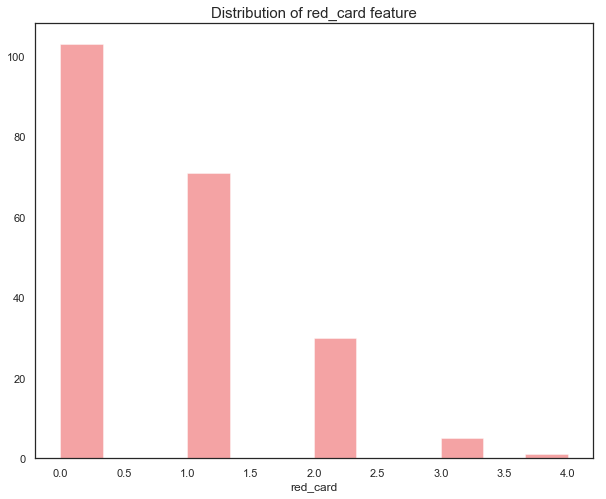

In [204]:
## Distribution of red_card

feat_4 = teams_detailed_stats['red_card']
distrib_2(feat_4, "Distribution of red_card feature")

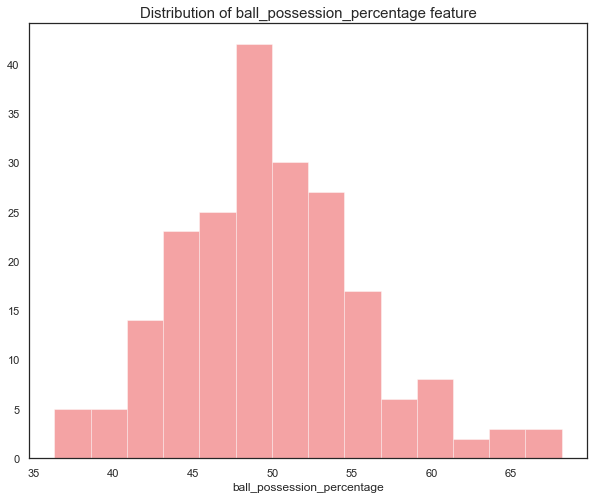

In [205]:
## Distribution of ball_possession_percentage

feat_5 = teams_detailed_stats['ball_possession_percentage']

distrib_2(feat_5, "Distribution of ball_possession_percentage feature")

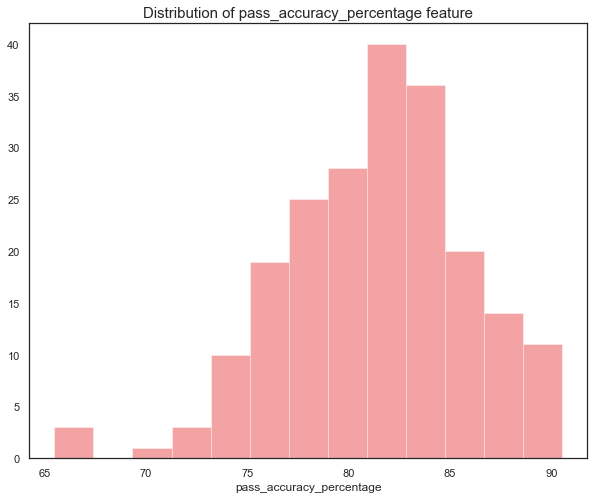

In [206]:
## Distribution of pass_accuracy_percentage

feat_6 = teams_detailed_stats['pass_accuracy_percentage']

distrib_2(feat_6, "Distribution of pass_accuracy_percentage feature")

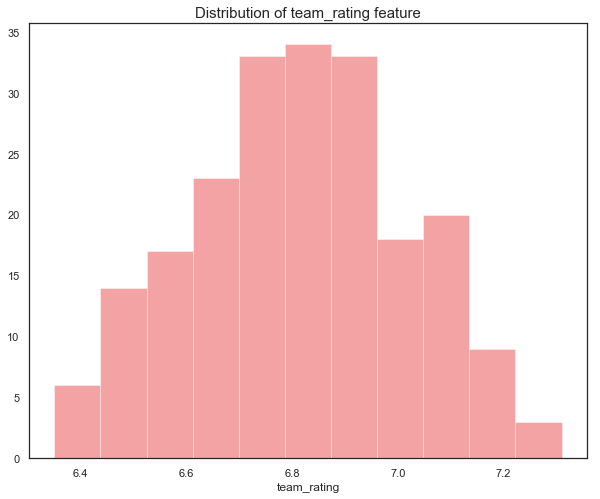

In [207]:
## Distribution of team_rating

feat_7 = teams_detailed_stats['team_rating']

distrib_2(feat_7, "Distribution of team_rating feature")

<i>
    <font color=33A8FF>
        We can observe that except for the red cards number, all of the other features are normally distributed and have a low standard deviation, which means that the values of the features aren't too spread and without outliers inside.
    </font>
</i>

In [208]:
## Functions to see the bivariate distribution of the team_detailed_stats subset in order to reveal potential correlations

"""
## Function to have an overview of potential correlation between two features    

def bi_distrib(x_feature, y_feature, data, title, hue):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, hue = hue, data = data)
    plt.title(title, size = 12)
    
def bi_distrib_2(x_feature, y_feature, data, title):
    sns.set(style = "white")
    sns.relplot(x = x_feature, y = y_feature, data = data)
    plt.title(title, size = 12) 
"""

'\n## Function to have an overview of potential correlation between two features    \n\ndef bi_distrib(x_feature, y_feature, data, title, hue):\n    sns.set(style = "white")\n    sns.relplot(x = x_feature, y = y_feature, hue = hue, data = data)\n    plt.title(title, size = 12)\n    \ndef bi_distrib_2(x_feature, y_feature, data, title):\n    sns.set(style = "white")\n    sns.relplot(x = x_feature, y = y_feature, data = data)\n    plt.title(title, size = 12) \n'

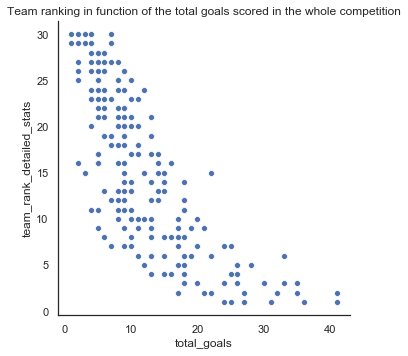

In [209]:
### Does the total number scored by a team in the whole competition have an influence on its final ranking (rank 1 = winner) ?

bi_distrib_2("total_goals", "team_rank_detailed_stats", teams_detailed_stats, "Team ranking in function of the total goals scored in the whole competition")

<i>
    <font color=33A8FF>
        We can see here that the rank of a team and its total number of goals scored are highly negatively correlated. <br>
        This is quite a logic pattern because if a team have scored a huge amount of goals, it's very likely that he beats most of his opponents, resulting in a low ranking.
    </font>
</i>

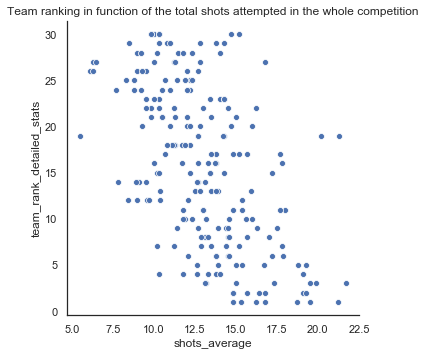

In [210]:
### Does the number of shots attempted per match by a team in the whole competition have an influence on its final ranking ?

bi_distrib_2("shots_average", "team_rank_detailed_stats", teams_detailed_stats, "Team ranking in function of the total shots attempted in the whole competition")

<i>
    <font color=33A8FF>
        We can see here that the rank of a team and its shots average attempts are moderately negatively correlated. <br>
        This is also a normal pattern actually, because a team can attempt a lot of shots and score a lot of goals, resulting in wins and low ranking; but it can results in draws or losses if the teams attempt a lot of shots but their attempts are innacurate, which won't results in goals scored and in a high ranking.
    </font>
</i>

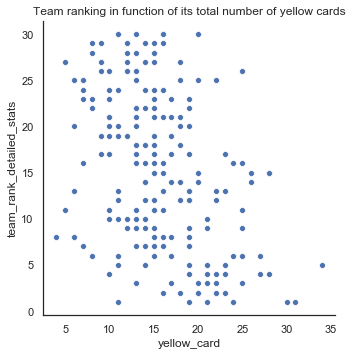

In [211]:
### Does the number of yellow cards affects the team results ?

bi_distrib_2("yellow_card", "team_rank_detailed_stats", teams_detailed_stats, "Team ranking in function of its total number of yellow cards")

Text(0.5,1,'Team ranking in function of its total number of red cards')

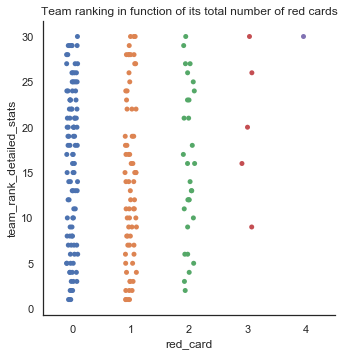

In [212]:
### Does the number of red cards affects the team results ?

sns.catplot(x = "red_card", y = "team_rank_detailed_stats", data = teams_detailed_stats)
plt.title("Team ranking in function of its total number of red cards")

<i>
    <font color=33A8FF>
        We can see that the rank of a team and its yellow cards total are moderately negatively correlated. <br><br>
        This can be translated in two ways :
            - the players are playing very toughly but are controlling themselves in their actions, resulting in a very good defense overall for their team, provoking wins and a low team ranking.
            - the players aren't controlling themselves and some of them got kicked out of the game, resulting in their teams playing with less players than their opponents, provoking high chances of losses and a high team ranking.
        
Quick definition : <br>

- the yellow card is given to a player after a rough action from him on another player, it's a kind of a warning before the player is kicked out of the game
- the red card is given to a player after he received two yellow cards or if he did a very dangerous action in the game

    </font>
</i>

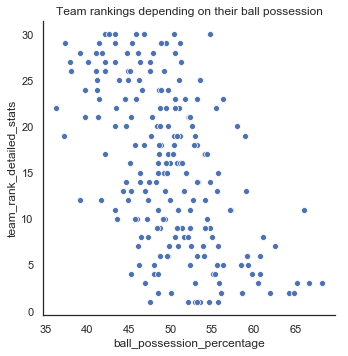

In [213]:
### Does the ball possession percentage allows a team to win more games, thus increasing their rankings ?

bi_distrib_2("ball_possession_percentage", "team_rank_detailed_stats", teams_detailed_stats, "Team rankings depending on their ball possession")

<i>
    <font color=33A8FF>
        We can see that the rank of a team and its ball possession percentage are moderately negatively correlated. <br><br>
        This behavior can be explained by the fact that :
           - 1) if a team have the ball possession
           - 2) he has more chances to shoot the ball
           - 3) so... he has more chances to score goals and win the game, resulting in a decrease of its ranking

However, having the ball possession doesn't necessarly mean that have 100% chances of winning the game. <br><br>

Indeed, you can have the ball more often that your opponent but he can block your shots attempts for example, which don't guarantee your goals to be scored and they can counter-attack your team and score a quick goal, then defend for the rest of game and make you lose it. <br>

So, it's very important to know that ball possession isn't necessarly an absolute game winning metric.
    </font>
</i>

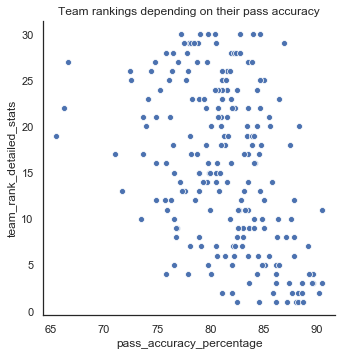

In [214]:
### Does the pass accuracy allows a team to win more games ?

bi_distrib_2("pass_accuracy_percentage", "team_rank_detailed_stats", teams_detailed_stats, "Team rankings depending on their pass accuracy")

<i>
    <font color=33A8FF>
        Same explanation than the ball possession percentage.
    </font>
</i>

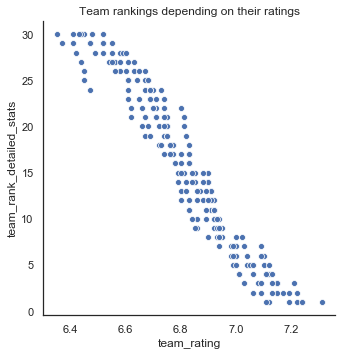

In [215]:
### Does the team ratings (attributed by specialized forecasters) is necessarly true regarding a team ranking ?

bi_distrib_2("team_rating", "team_rank_detailed_stats", teams_detailed_stats, "Team rankings depending on their ratings")

<i>
    <font color=33A8FF>
        We can see that the rank of a team and its rating value (given by specialized forecasters that determine a team power ranking, the more this value is high, the more the team is favorite to win the competition) are highly negatively correlated. <br><br>
        This pattern is very logical because if the team has a high rating value (around 7), it means that he is among the favorite to win the competition, which results in a low rank.<br><br>
        Contrarywise, if a team has a very low rating value (around 6), it means that he is among the worst teams of the competition, which results in a high rank.
    </font>
</i>

Text(0.5,1.02,'Pairplot representing the correlations between the offensive and defensive stats for the detailed stats')

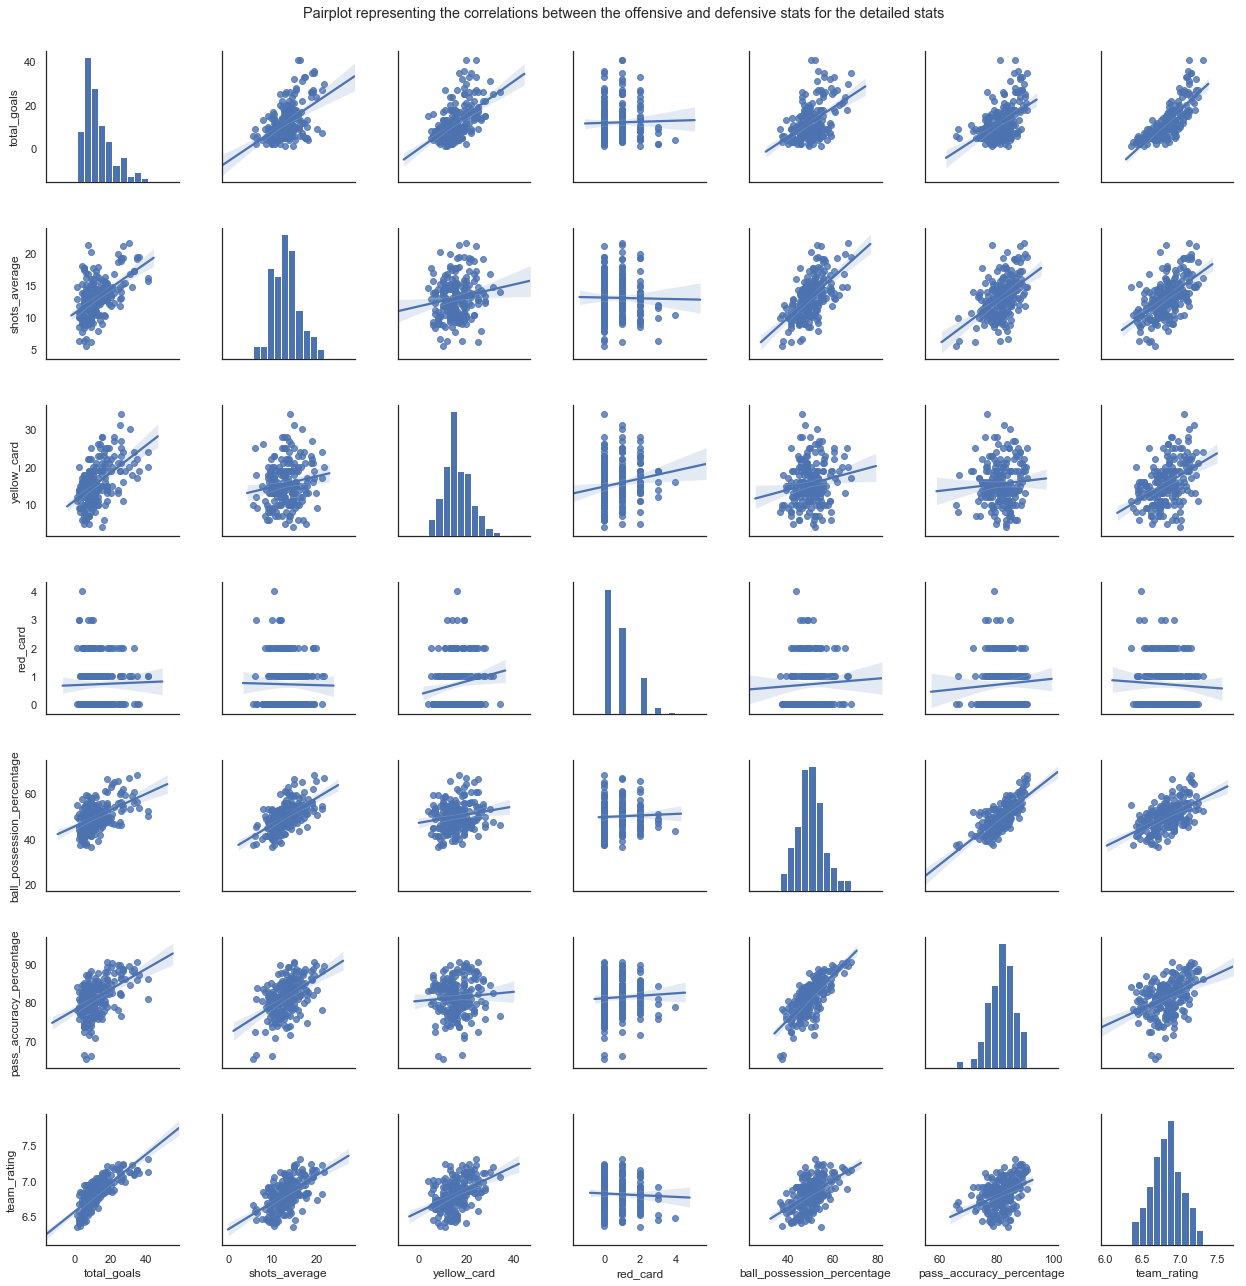

In [216]:
## visualizing pairwise relationships in the subset for the offensive and defensive stats (excluding the team ranking)

off_def_stats_2 = ['total_goals', 'shots_average', 'yellow_card', 'red_card', 'ball_possession_percentage', 'pass_accuracy_percentage', 'team_rating']
pair_data = teams_detailed_stats[off_def_stats_2]

sns.pairplot(pair_data, kind = "reg").fig.suptitle("Pairplot representing the correlations between the offensive and defensive stats for the detailed stats", y = 1.02)

<i>
    <font color=33A8FF>
All the correlations expectations seem to be respected and logical here.
    </font>
</i>

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset for the detailed stats')

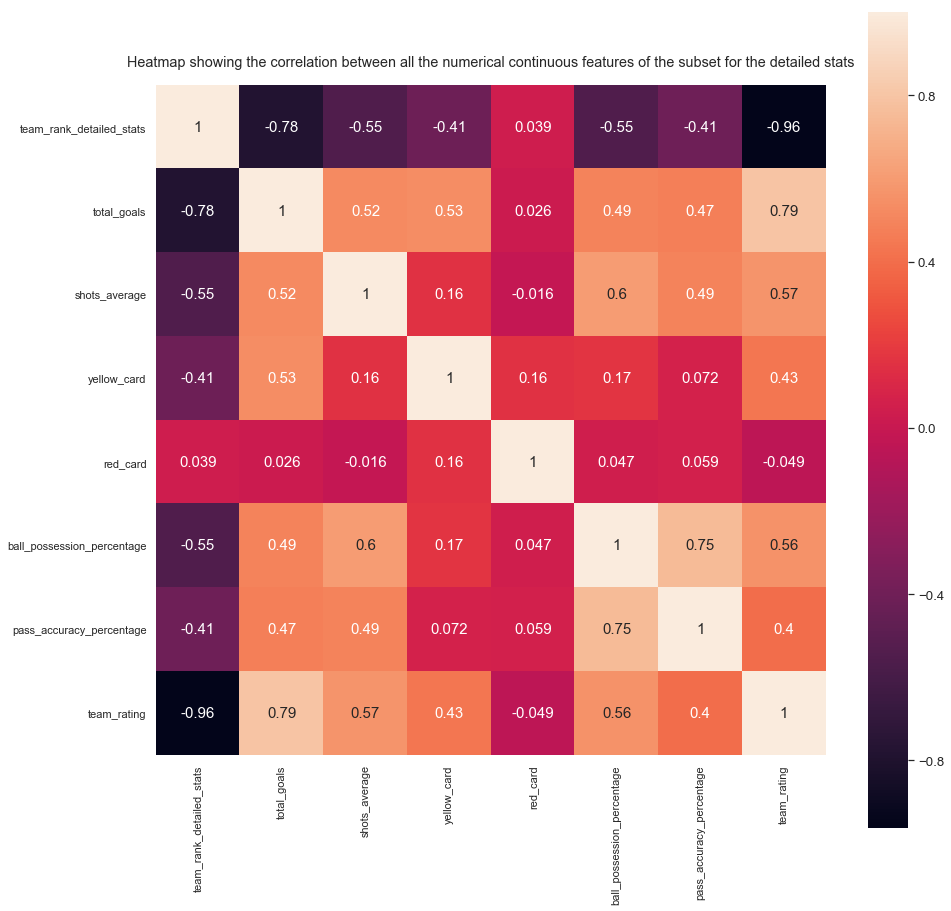

In [217]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient_2 = ['team_rank_detailed_stats', 'total_goals', 'shots_average', 'yellow_card', 'red_card', 'ball_possession_percentage', 
                                        'pass_accuracy_percentage', 'team_rating']

features_hm_2 = teams_detailed_stats[features_coefficient_2]

features_hm_2.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1.2)
sns.heatmap(features_hm_2.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset for the detailed stats', y = 1.02)

<i>
    <font color=33A8FF>
     Most of the features seem to not be too correlated, which is good for the Machine Learning models later.
    </font>
</i>

##### Quick observations for the teams per detailed features

<i>
    For the detailed stats of each team in the whole competition from the season 2011 to 2018, it seems that :
        - the average total number of goals scored in the competition is 12 (seems a little bit low, this is due to the subset including the group stage, in which bad teams outside of the top 16 of the competition are included, which makes the average value naturally decrease)
        - in average, teams attempt 13 shots per match
        - in average, teams tend to get around 16 yellow cards and 1 red card per season
        - team ball possession average percentage is around 50%
        - team pass accuracy average percentage is around 81.4%
        - team rating (grade given by forecasters) average is around 6.8
        - indeed, around 25% of the teams have less than 6 total goals (the bad teams) and 25% of the teams have more than 14.8 total goals (the good teams)
        - 25% of the teams have a shot average below 12 shots, numbers of yellow cards below 12, red cards below 1, ball possession percentage below 46%, pass accuracy percentage below 79% and a team rating below 6.7 (the bad teams)
        - 25% of the teams have a shot average above 15 shots, numbers of yellow cards above 19, red cards above 1, ball possession percentage above 53.2%, pass accuracy percentage above 84.4% and a team rating above 6.94 (the good teams)
        - 50% of the teams have a shot average around 13, number of yellow cards of 15, red cards of 1, ball possession percentage of 49.6%, pass accuracy percentage of 84.4% and a team rating of 6.82 (the average teams)
</i>

###### For the scorers subset

<i>
    Now, we're going to observe the distribution of the scorers subset in order to detect eventual relationships between the features
</i>

In [218]:
### Overview of the scorers subset

scorers.head()

,year,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,14,1.27
1,2011/12,2,Mario Gomez,Bayern Munich,11,12,1.09
2,2011/12,3,Cristiano Ronaldo,Real Madrid,10,10,1.00
3,2011/12,4,Karim Benzema,Real Madrid,10,7,0.70
4,2011/12,5,Didier Drogba,Chelsea,8,6,0.75


In [219]:
### Converting the type of scorer_rank to integer (currently in object)

scorers['scorer_rank'] = scorers['scorer_rank'].astype('int64')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
### For all of the scorers performances in the whole competition

scorers.describe()

,scorer_rank,scorer_match_played,goals_numbers,goals_ratio
count,210.000000,210.000000,210.000000,210.000000
mean,12.438095,8.847619,5.004762,0.577714
std,6.878889,2.139986,2.544339,0.249226
min,1.000000,4.000000,3.000000,0.230000
25%,6.000000,7.000000,3.000000,0.380000
50%,13.000000,9.000000,4.000000,0.500000
75%,17.000000,10.000000,5.750000,0.710000
max,28.000000,13.000000,17.000000,1.550000


In [221]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib_3(feature, title):
    sns.set(style = "white", palette = "pastel")
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=False, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

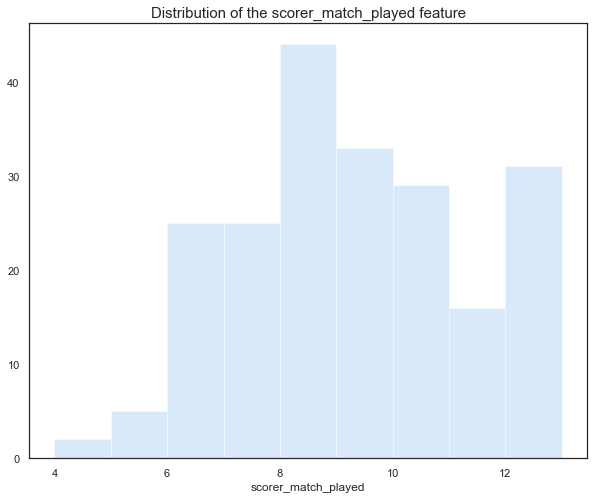

In [222]:
### Checking the distribution of scorer_match_played feature

feat_11 = scorers["scorer_match_played"]

distrib_3(feat_11, "Distribution of the scorer_match_played feature")

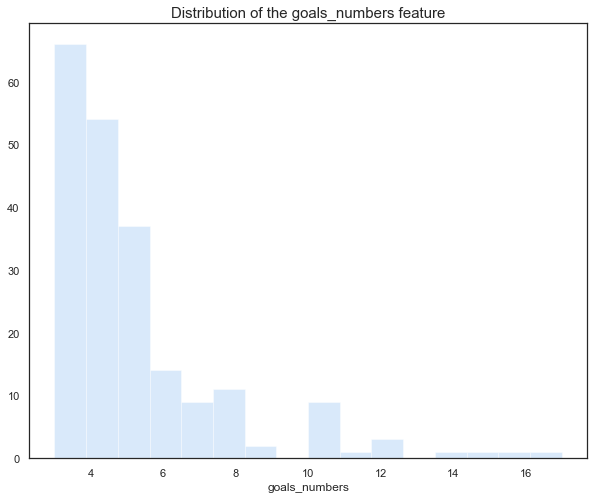

In [223]:
### Checking the distribution of goals_numbers feature

feat_12 = scorers["goals_numbers"]

distrib_3(feat_12, "Distribution of the goals_numbers feature")

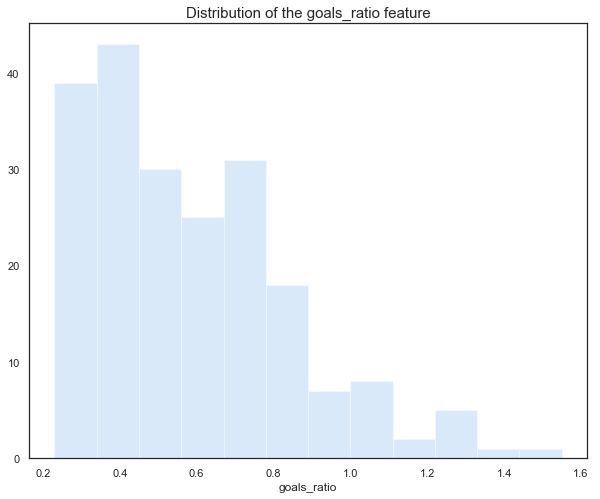

In [224]:
### Checking the distribution of goals_ratio feature

feat_13 = scorers["goals_ratio"]

distrib_3(feat_13, "Distribution of the goals_ratio feature")

<i>
    <font color=33A8FF>
    All the features are normally distributed and have a low standard deviation, so there are no outliers here.
    </font>
</i>

Text(0.5,1.02,'Pairplot representing the correlations in the scorers subsets')

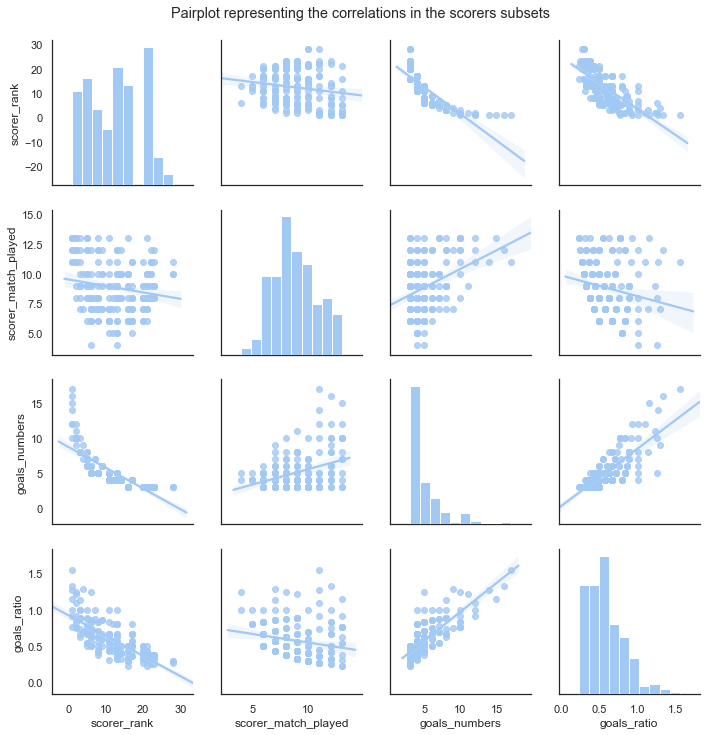

In [225]:
## visualizing pairwise relationships in the scorers subset in order to discover the patterns
## for this subset, we directly create a pairplot because we don't have a lot of features, so it makes to directly view everything at the same time

off_def_stats_3 = ['scorer_rank', 'scorer_match_played', 'goals_numbers', 'goals_ratio']
pair_data = scorers[off_def_stats_3]

sns.pairplot(pair_data, kind = "reg").fig.suptitle("Pairplot representing the correlations in the scorers subsets", y = 1.02)

<i>
    <font color=33A8FF>
Thanks to this pairplot, we can observe that the scorers rank is moderately negatively correlated to the number of goals scored, the goals ratio (goals per match average) and a little bit negatively correlated to the number of matches played.
    </font>
</i>

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset for the scorers')

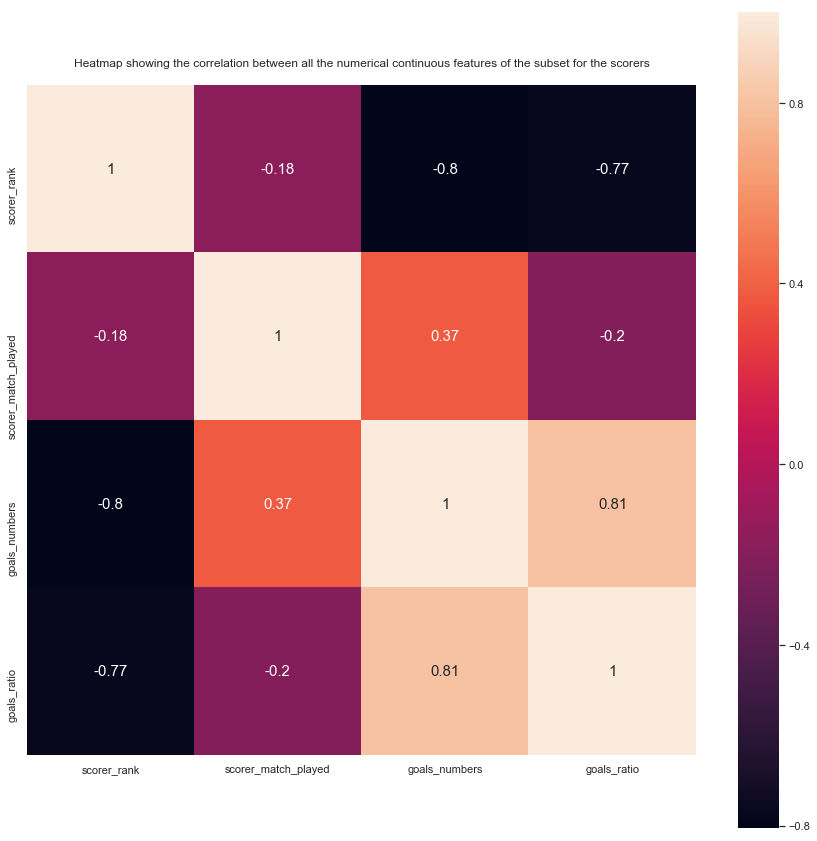

In [226]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient_3 = off_def_stats_3

features_hm_3 = scorers[features_coefficient_3]

features_hm_3.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1)
sns.heatmap(features_hm_3.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset for the scorers', y = 1.02)

<i>
    <font color=33A8FF>
Some of the important features are strongly negatively correlated here, so we will have to proceed to some features engineering for this dataframe later on.
    </font>
</i>

##### Quick observations

<i>
    Here, from 2011 to 2018, we can enhance among the scorers that :
        - in average, they play around 9 matchs per season
        - the goals average is 5 goals per season
        - the goal ratio average is 0.58
        - 25% of the scorers have less than 7 matches played, 3 goals scored and a goal ratio of 0.38 (the worst strikers there; it's not necessaraly a bad stat as it can whether concern players which roles are scoring goals or player whose main role is to keep the goal or to defend the field)
        - 25% of the scorers have more than 10 matches played, 6 goals scored and a goal ratio of 0.71 (here, it concerns mostly the strikers)
        - 50% of the scorers have 9 matches, 4 goals scored and a goal ratio of 0.5
</i>

###### For the assists subset

<i>
    We're going to observe the distribution of the features in the assists subset in order to discover eventual correlations between its features
</i>

In [227]:
### Overview of the subset assists

assists.head()

,year,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,9,0.82
1,2011/12,2,Karim Benzema,Real Madrid,10,5,0.50
2,2011/12,2,Zlatan Ibrahimović,AC Milan,8,5,0.62
3,2011/12,2,Isaac Cuenca,FC Barcelona,8,5,0.62
4,2011/12,2,Kaká,Real Madrid,7,5,0.71


In [228]:
### Converting the type of scorer_rank to integer (currently in object)

assists['assist_rank'] = assists['assist_rank'].astype('int64')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [229]:
## For all of the assists players performances in the whole competition

assists.describe()

,assist_rank,assist_match_played,assists_numbers,assists_ratio
count,210.000000,210.000000,210.000000,210.000000
mean,10.447619,9.542857,3.100000,0.344524
std,7.096034,2.102760,1.191878,0.157060
min,1.000000,3.000000,2.000000,0.150000
25%,4.000000,8.000000,2.000000,0.220000
50%,7.500000,10.000000,3.000000,0.330000
75%,16.000000,11.000000,4.000000,0.430000
max,24.000000,13.000000,9.000000,1.000000


In [231]:
### Defining functions in order to look at the distributions of the features

## Function to have an overview of the univariate distribution of a feature

def distrib_4(feature, title):
    sns.set(style = "white", palette = "bright")
    fig, ax = plt.subplots(figsize = (10, 8))
    sns.distplot(feature, kde=False, ax=ax) # kde is the kernel distribution estimate
    plt.title(title, fontsize = 15)

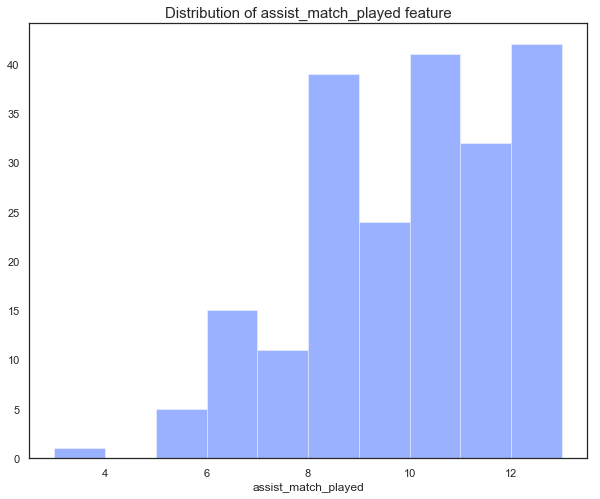

In [232]:
### Distribution of assist_match_played feature

feat_21 = assists['assist_match_played']

distrib_4(feat_21, "Distribution of assist_match_played feature")

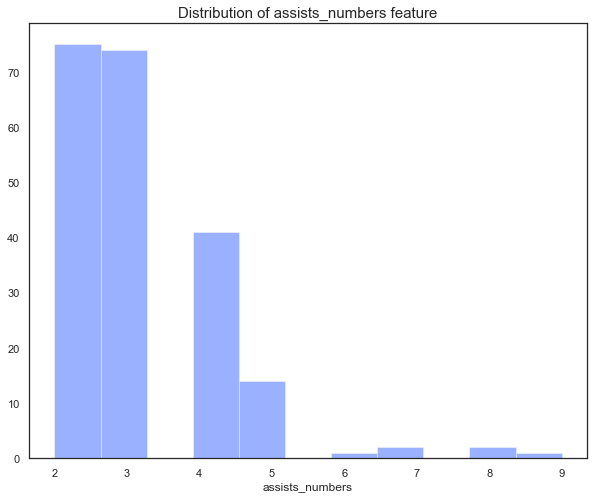

In [233]:
### Distribution of assists_numbers feature

feat_22 = assists['assists_numbers']

distrib_4(feat_22, "Distribution of assists_numbers feature")

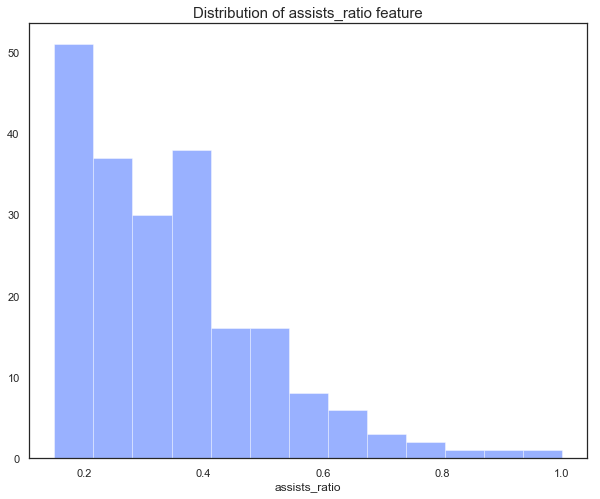

In [234]:
### Distribution of assists_ratio feature

feat_23 = assists['assists_ratio']

distrib_4(feat_23, "Distribution of assists_ratio feature")

Text(0.5,1.02,'Pairplot representing the correlations in the assists subset')

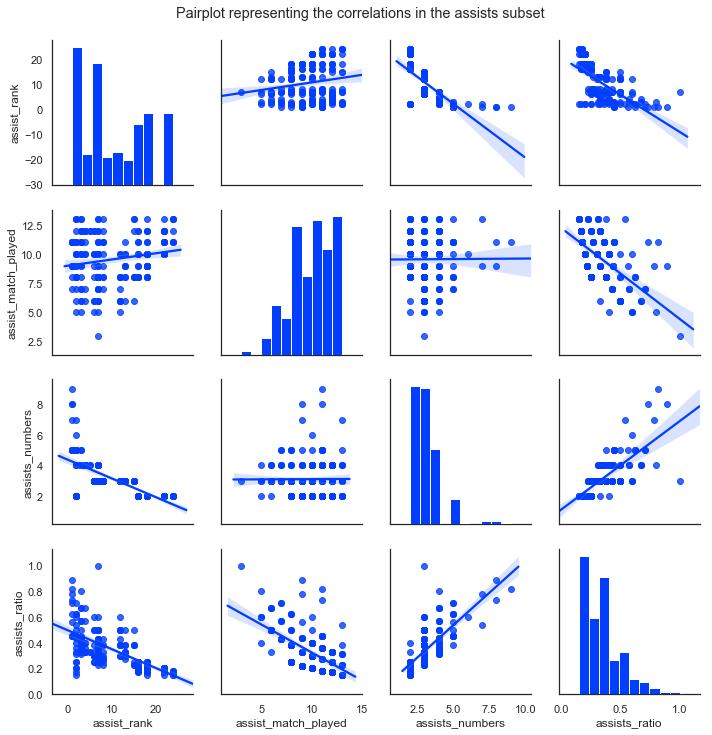

In [235]:
## visualizing pairwise relationships in the assists subset in order to discover the patterns
## for this subset, we directly create a pairplot because we don't have a lot of features, so it makes to directly view everything at the same time

off_def_stats_4 = ['assist_rank', 'assist_match_played', 'assists_numbers', 'assists_ratio']
pair_data_4 = assists[off_def_stats_4]

sns.pairplot(pair_data_4, kind = "reg").fig.suptitle("Pairplot representing the correlations in the assists subset", y = 1.02)

Text(0.5,1.02,'Heatmap showing the correlation between all the numerical continuous features of the subset for the assists')

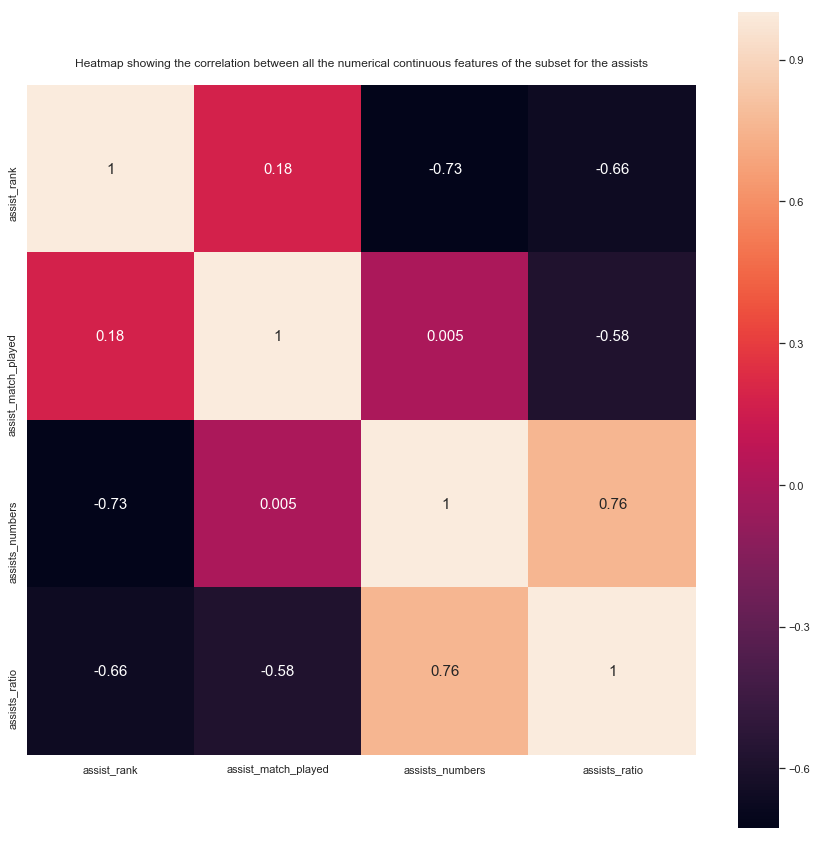

In [236]:
## making a heatmap of the subset to have numerical value of the correlation between features (excluding discrete features such a wins, draws and losses)

features_coefficient_4 = off_def_stats_4

features_hm_4 = assists[features_coefficient_4]

features_hm_4.head()

fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale = 1)
sns.heatmap(features_hm_4.corr(), vmax = 1, square = True, annot = True, annot_kws = {"size" : 15}, ax = ax)
ax.set_title('Heatmap showing the correlation between all the numerical continuous features of the subset for the assists', y = 1.02)

<i>
    <font color=33A8FF>
Same statements than the scorers section for all of the plots here.
    </font>
</i>

##### Quick Observations

<i>
Here, from 2011 to 2018, we can enhance among the assists player that :

    - in average, they play around 9 matchs per season
    - the assist average is 3 assists per season
    - the assist ratio average is 0.34
    - 25% of the assists players have less than 8 matches played, 2 assists made and an assist ratio of 0.22 (the worst assists players there; it's not necessaraly a bad stat as it can whether concern players which roles are making assists or player whose main role is to keep the goal or to defend the field)
    - 25% of the assists players have more than 11 matches played, 4 assists made and an assist ratio of 0.43 (here, it concerns mostly the players in assisting)
    - 50% of the assists players have 9 matches, 10 assists made and an assist ratio of 0.33
</i>

###### Advanced analysis

<i>
    In this part, we want to answer graphically some more advanced questions such as :
        - how is each winner playing ?
        - differences between the winners of the competition and the other teams, their playstyles differences and their nationalities
        - differences between the losers of the competition and the other teams, their playstyles differences and their nationalities 
        - best scorer ? what's his team ? what's his nationality ?
        - player finished with the most assists ? what's his team ? what's his nationality ?
</i>

In [111]:
#### how is each winner playing ? is finishing first in the detailed stats = winner ?

    ###  1) filtering the teams_round to determine the winner
    ###  2) filtering the teams_detailed_stats to determine the team's playstyle
    ###  3) we are going to join both dataframes in order to have a global view of each winner statistics
    
        ## overview of the teams_round subset
        
teams_round.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,8th Finals,1,FC Barcelona,2,2,0,0,10,2,8,WW,42,50,17,83,75,3.75
1,2011/12,8th Finals,2,Real Madrid,2,1,1,0,5,2,3,DW,50,50,0,92,75,3.66
2,2011/12,8th Finals,3,Bayern Munich,2,1,0,1,7,1,6,LW,38,46,15,92,38,2.85
3,2011/12,8th Finals,4,Chelsea,2,1,0,1,5,4,1,LW,38,62,0,83,62,3.47
4,2011/12,8th Finals,5,Milan AC,2,1,0,1,4,3,1,WL,40,50,20,80,60,3.00


In [112]:
        ## overview of the teams_detailed_stats
    
teams_detailed_stats.head()

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
1,2011/12,2,Real Madrid,35,19.1,22,1,56.1,85.9,7.15
2,2011/12,3,FC Barcelona,35,19.5,17,0,68.2,90.5,7.15
3,2011/12,4,Bayern Munich,26,19.1,27,1,55.1,86.2,7.11
4,2011/12,5,Valencia CF,12,16.7,11,0,58.5,85.1,7.04


In [113]:
        ## filtering the teams_round subset in order to only extract the winners statistics
    
finals = teams_round[teams_round['round'] == "Finals"] # slicing the subset in order to only obtain the teams that are in the finals
finals

winners = finals[finals['last_results'] == "W"] # slicing the finalists subset in order to only obtain the winners
winners

filt_winners = winners.drop(columns = ['goals_scored', 'goals_conceded', 'goals_difference', 'n_matchs_played', 'n_wins', 'n_draws', 'n_loss', 'last_results', 'round'])
filt_winners

,year,team_rank,team,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
28,2011/12,1,Chelsea,38,62,0,83,62,3.47
58,2012/13,1,Bayern Munich,38,62,8,92,62,3.23
88,2013/14,1,Real Madrid,38,54,8,92,77,3.92
118,2014/15,1,FC Barcelona,46,54,0,85,69,3.23
148,2015/16,1,Real Madrid,77,15,23,69,31,2.62
178,2016/17,1,Real Madrid,8,92,0,100,100,4.15
208,2017/18,1,Real Madrid,23,77,0,100,92,3.77


In [114]:
        ## filtering the teams_detailed_stats subset in order to only extract the winners detailed statistics
        ## indeed, as we know the winners of the previous editions thanks to the filtering made above, we can
        ## directly select them manually from the teams_detailed

                # selecting each winner from the subset individually
            
first_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2011/12") & (teams_detailed_stats["team_names_detailed_stats"] == "Chelsea")]
second_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2012/13") & (teams_detailed_stats["team_names_detailed_stats"] == "Bayern Munich")]
third_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2013/14") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]
fourth_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2014/15") & (teams_detailed_stats["team_names_detailed_stats"] == "FC Barcelona")]
fifth_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2015/16") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]
sixth_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2016/17") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]
seventh_w = teams_detailed_stats[(teams_detailed_stats["year"] == "2017/18") & (teams_detailed_stats["team_names_detailed_stats"] == "Real Madrid")]

                # creating a dataframe containing only the winners

winners_ds = pd.concat([first_w, second_w, third_w, fourth_w, fifth_w, sixth_w, seventh_w])
winners_ds

,year,team_rank_detailed_stats,team_names_detailed_stats,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
0,2011/12,1,Chelsea,25,14.8,31,1,47.6,82.5,7.19
30,2012/13,1,Bayern Munich,31,16.8,30,1,53.0,84.6,7.12
60,2013/14,1,Real Madrid,41,16.2,24,1,52.1,86.2,7.31
91,2014/15,2,FC Barcelona,32,14.8,18,1,58.6,88.2,7.22
120,2015/16,1,Real Madrid,27,21.2,24,0,54.6,88.2,7.22
150,2016/17,1,Real Madrid,36,19.5,19,0,53.5,87.2,7.11
182,2017/18,3,Real Madrid,33,17.3,21,0,55.8,88.6,7.09


In [115]:
        ## in order to have a global view, we are going to inner join both winners subsets on the team ranking key
 
                # inner joining the dataframes
    
winners_df = pd.merge(filt_winners, winners_ds, on = 'year')
winners_df

                # dropping the columns that we don't want
    
winners_df.drop(columns = ["team_names_detailed_stats", "team_rating"])

                # reorganizing the dataframe

winners_df = winners_df[[
    "year", "team_rank", "team_rank_detailed_stats", "team", "total_goals", "average_goals", "shots_average", "ball_possession_percentage", 
    "pass_accuracy_percentage", "both_teams_to_score", "over_1.5_goals", "over_2.5_goals", "clean_sheets", "fail_to_score",
    "yellow_card", "red_card"
]]

                # we have to slightly modify the name of the team by adding the year next to it due to
                # Real Madrid having won it 4 times in the last 7 years so if we don't want the graphs to mix all the Real Madrid's values,
                # we have to fight a way to distinguish them

winners_df.iloc[2, 3] = "Real Madrid 2013/14"
winners_df.iloc[4, 3] = "Real Madrid 2015/16"
winners_df.iloc[5, 3] = "Real Madrid 2016/17"
winners_df.iloc[6, 3] = "Real Madrid 2017/18"

winners_df

,year,team_rank,team_rank_detailed_stats,team,total_goals,average_goals,shots_average,ball_possession_percentage,pass_accuracy_percentage,both_teams_to_score,over_1.5_goals,over_2.5_goals,clean_sheets,fail_to_score,yellow_card,red_card
0,2011/12,1,1,Chelsea,25,3.47,14.8,47.6,82.5,62,83,62,38,0,31,1
1,2012/13,1,1,Bayern Munich,31,3.23,16.8,53.0,84.6,62,92,62,38,8,30,1
2,2013/14,1,1,Real Madrid 2013/14,41,3.92,16.2,52.1,86.2,54,92,77,38,8,24,1
3,2014/15,1,2,FC Barcelona,32,3.23,14.8,58.6,88.2,54,85,69,46,0,18,1
4,2015/16,1,1,Real Madrid 2015/16,27,2.62,21.2,54.6,88.2,15,69,31,77,23,24,0
5,2016/17,1,1,Real Madrid 2016/17,36,4.15,19.5,53.5,87.2,92,100,100,8,0,19,0
6,2017/18,1,3,Real Madrid 2017/18,33,3.77,17.3,55.8,88.6,77,100,92,23,0,21,0


Text(0,0.5,'Total goals scored')

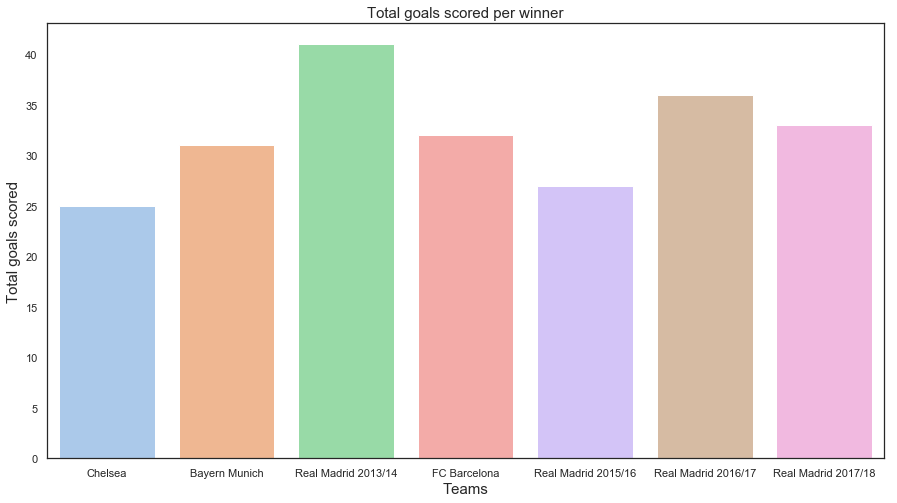

In [254]:
        ## Visualizing the total goals scored per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "total_goals", data = winners_df, ci = None, ax = ax)# creating the barplot 
plt.title("Total goals scored per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Total goals scored", fontsize = 15)

Text(0,0.5,'Average goal ratio')

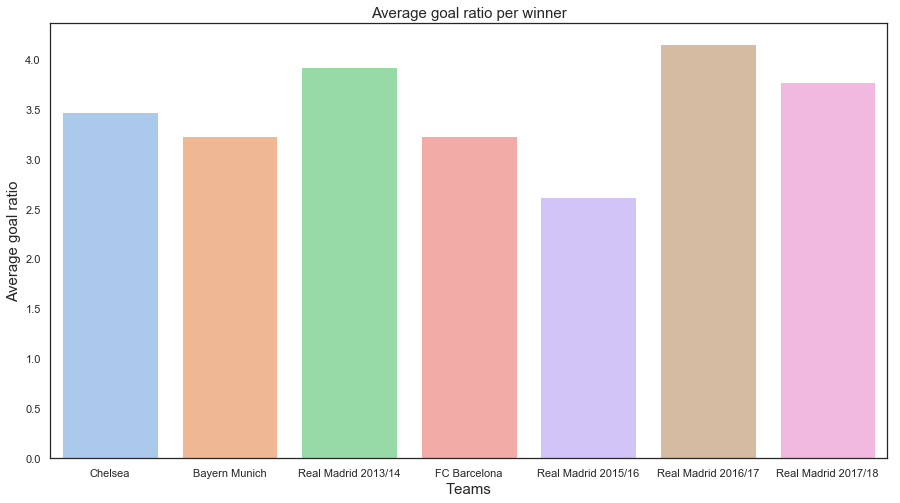

In [117]:
        ## Visualizing the average goal ratio per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "average_goals", data = winners_df, ci = None, ax = ax)# creating the barplot 
plt.title("Average goal ratio per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Average goal ratio", fontsize = 15)

Text(0,0.5,'Shots average attempts')

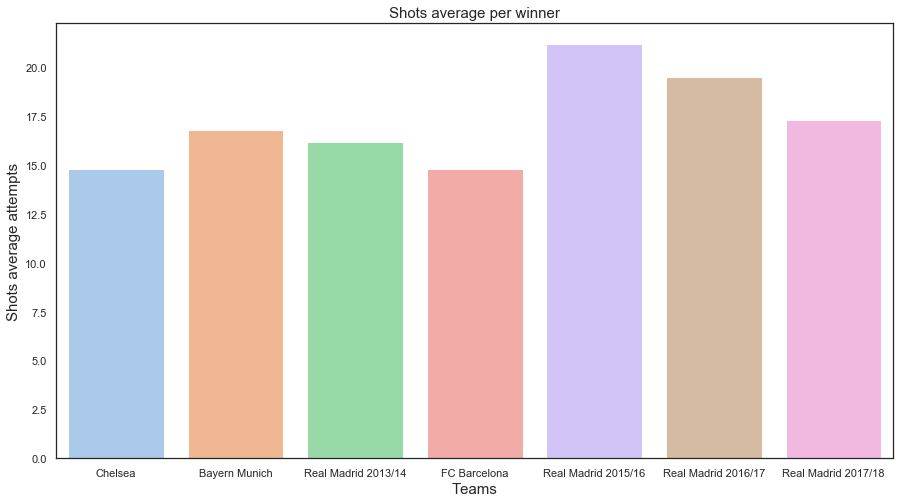

In [118]:
        ## Visualizing the shots average per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "shots_average", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Shots average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Shots average attempts", fontsize = 15)

<i>
    <font color=33A8FF>
Among the winners of the competition from 2011 to 2018, we can see that most of the teams had an exceptionnal offensive prowess (71.4% of the winners have scored more than 30 goals during their winning campaign), the only exceptions being Chelsea (25 goals) and Real Madrid in 2015/2016 (27 goals). <br><br>
The reason of why the Real Madrid have scored less goals this season compared to the other ones where they had a monstruous offensive power was due to the fact they changed their manager in the middle of the season (the first manager during the first part of the campaign was a very defensive one whereas the second one were a more offensive one), which is why they scored less goals than their other victorious campaigns.
    </font>
</i>

Text(0,0.5,'Ball possession percentage average')

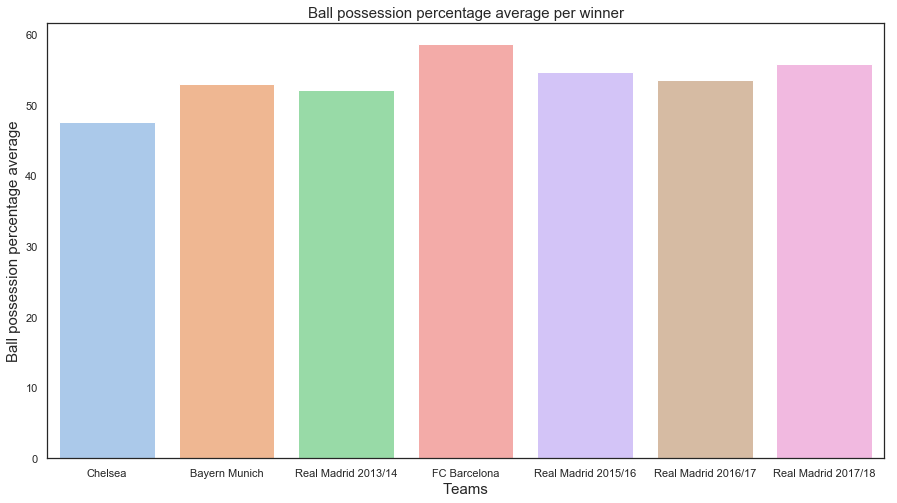

In [119]:
        ## Visualizing the ball possession percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "ball_possession_percentage", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Ball possession percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Ball possession percentage average", fontsize = 15)

Text(0,0.5,'Pass accuracy percentage average')

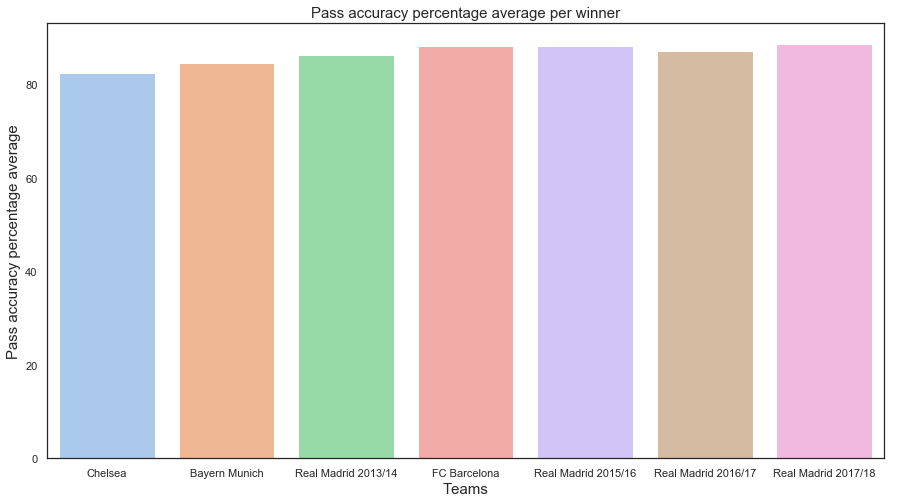

In [120]:
        ## Visualizing the pass accuracy percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "pass_accuracy_percentage", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Pass accuracy percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Pass accuracy percentage average", fontsize = 15)

<i>
    <font color=33A8FF>
With the ball possession percentage average and the pass accuracy percentage (even though all of the winners have elite passers, that's why all of these teams are above 80%), it's possible to have an idea of how each winner was playing. <br><br>
Indeed, Chelsea got a low ball possession percentage (48%), which means that they were a more defensive team, who was scoring most of their goals in counter-attack and not with building the attacks with short passes. <br><br>
In the other hand, FC Barcelona got a very high ball possession percentage (almost 60%), which means that they tend score their goals thanks to constructed attacks with an alternance of short and long passes, this kind of play is in the FC Barcelona DNA, that's why they are qualified as the team with the most beautiful game in the world.
    </font>
</i>

Text(0,0.5,'both_teams_to_score percentage average')

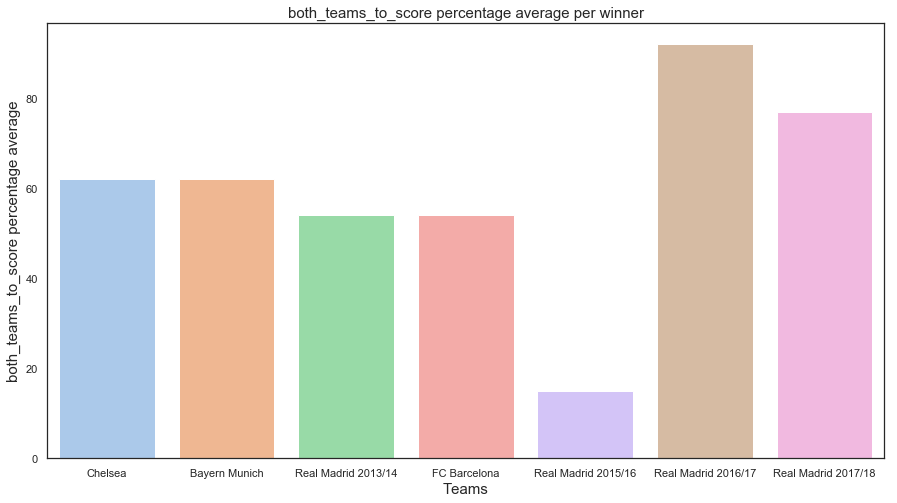

In [121]:
        ## Visualizing the both_teams_to_score percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "both_teams_to_score", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("both_teams_to_score percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("both_teams_to_score percentage average", fontsize = 15)

<i>
    <font color=33A8FF>
We can see here that the 2015/2016 version of Real Madrid were an elite team defensively, having only 18% of its matches where them and their opponents scored a goal in the same match, whereas the other teams were quite good defensively and offensively (the Real Madrid in 2016/2017 were exceptionnal in attack !)
    </font>
</i>

Text(0,0.5,'over_1.5_goals percentage average')

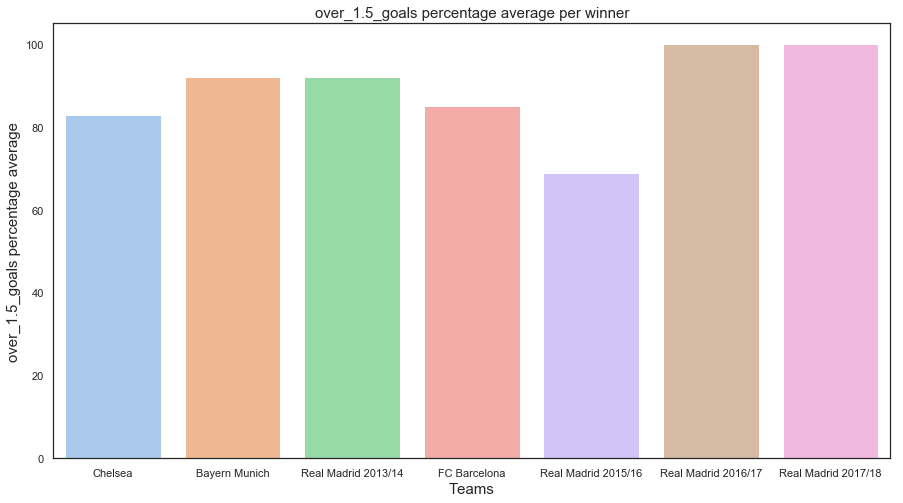

In [122]:
        ## Visualizing the over_1.5_goals percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "over_1.5_goals", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("over_1.5_goals percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("over_1.5_goals percentage average", fontsize = 15)

Text(0,0.5,'over_2.5_goals percentage average')

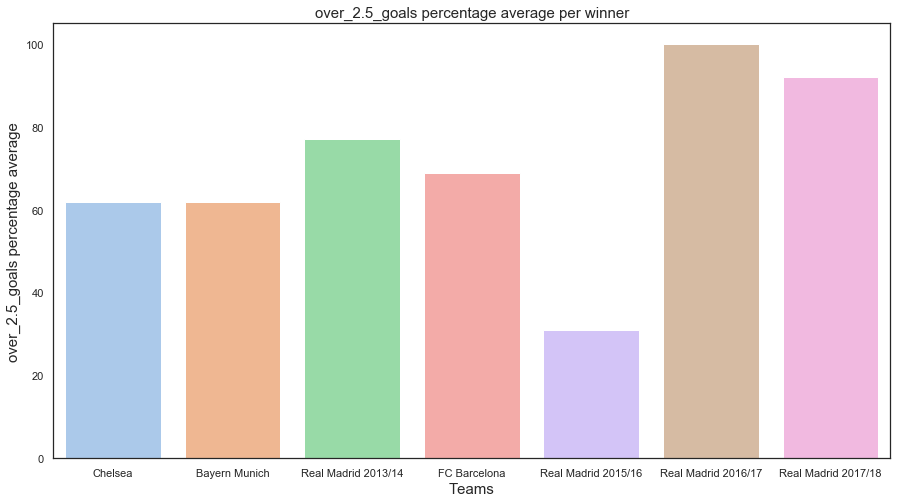

In [123]:
        ## Visualizing the over_2.5_goals percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "over_2.5_goals", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("over_2.5_goals percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("over_2.5_goals percentage average", fontsize = 15)

<i>
    <font color=33A8FF>
We can see though that even if each winner has its different playstyle, they all were elite in both defense and offense (86% of them have 60% or more of their matches were 2.5 or more goals were scored)
    </font>
</i>

Text(0,0.5,'Clean_sheets percentage average')

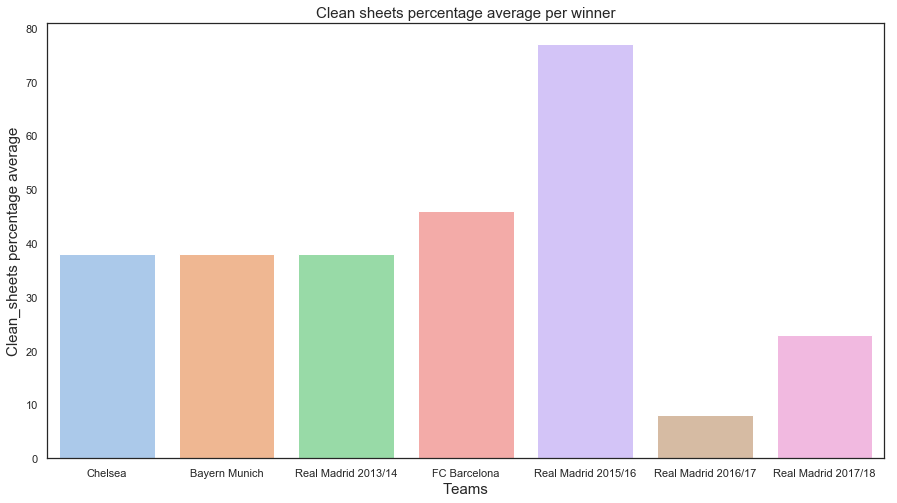

In [124]:
        ## Visualizing the clean sheets percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "clean_sheets", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Clean sheets percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Clean_sheets percentage average", fontsize = 15)

<i>
    <font color=33A8FF>
In this barplot, we can see that the Real Madrid were a beast in defense in 2015/2016 and very bad the year after that in 2016/2017. <br><br>
This is kind of funny, because their roster in this year interval were almost the same (80% of the team), they have just added some extra offensive players and their defensive prowess drastically decreased for an a drastic increase in their offensive power. <br><br>
The other winners are around 25% and 40% of clean sheets.
    </font>
</i>

Text(0,0.5,'fail_to_score percentage average')

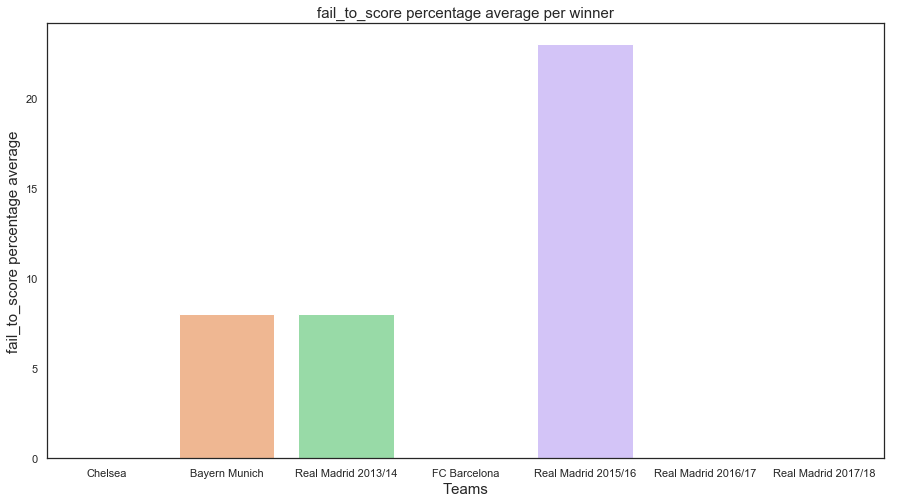

In [125]:
        ## Visualizing the fail_to_score percentage per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "fail_to_score", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("fail_to_score percentage average per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("fail_to_score percentage average", fontsize = 15)

<i>
    <font color=33A8FF>
Once again, we can see that most of the winners were elite in offense, that's why all of them have less than 30% of the matches where they didn't managed to score a goal.
    </font>
</i>

Text(0,0.5,'Number of yellow cards')

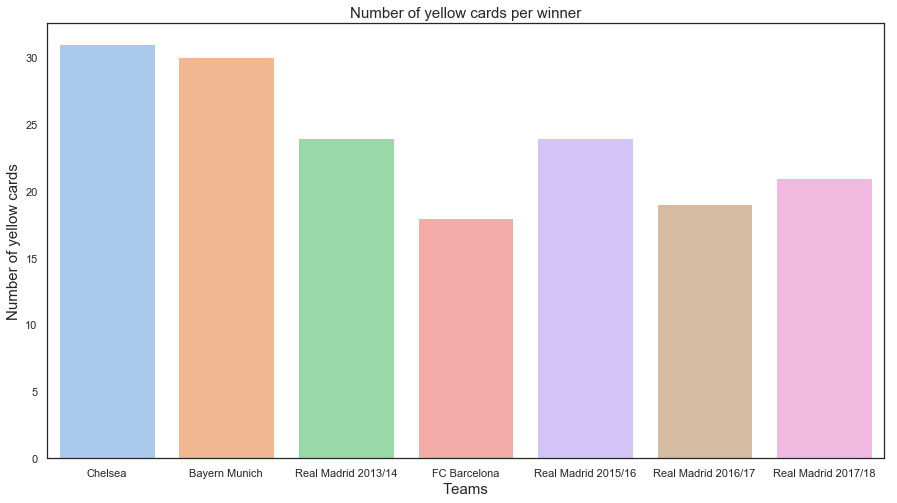

In [126]:
        ## Visualizing the number of yellow cards per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "yellow_card", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Number of yellow cards per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Number of yellow cards", fontsize = 15)

Text(0,0.5,'Number of red cards')

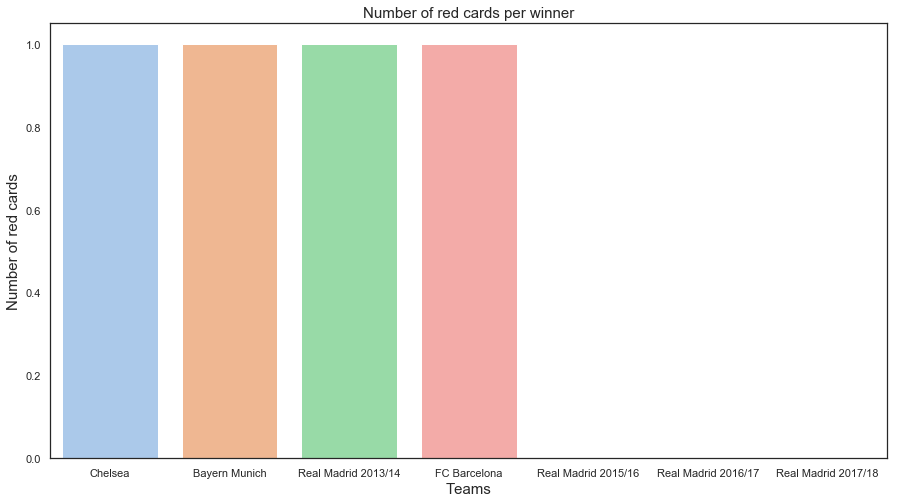

In [127]:
        ## Visualizing the number of yellow cards per winner

fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "team", y = "red_card", data = winners_df, ci = None, ax = ax) # creating the barplot 
plt.title("Number of red cards per winner", fontsize = 15)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Number of red cards", fontsize = 15)

<i>
    <font color=33A8FF>
More or less all the winners were kind of aggressive on the defensive end (all of them have more than 15 yellow cards per campaign and four of them have had one red card). <br><br>
We can notice that Chelsea, Bayern Munich and Real Madrid 2015/2016 had a good defense because they got a lot of yellow cards, which means that they had players who were very rough during the defensive phase.
    </font>
</i>

In [128]:
#### differences between the winners of the competition and the other teams, their playstyles differences and their nationalities ?

    ### 1) selecting the winners dataset, comparing their nationalities
    ### 2) filtering teams_round to filter the other teams as we already the winners dataframe
    ### 3) calculating the mean of each stat of the winners and the average team (per round and per detailed stats)
    ### 4) plot both results to compare them
    ### 5) looking for the other teams (the non-winners) nationalties
    ### 6) plotting it
    
        ## overviewing the winners dataframe
        
winners_df

,year,team_rank,team_rank_detailed_stats,team,total_goals,average_goals,shots_average,ball_possession_percentage,pass_accuracy_percentage,both_teams_to_score,over_1.5_goals,over_2.5_goals,clean_sheets,fail_to_score,yellow_card,red_card
0,2011/12,1,1,Chelsea,25,3.47,14.8,47.6,82.5,62,83,62,38,0,31,1
1,2012/13,1,1,Bayern Munich,31,3.23,16.8,53.0,84.6,62,92,62,38,8,30,1
2,2013/14,1,1,Real Madrid 2013/14,41,3.92,16.2,52.1,86.2,54,92,77,38,8,24,1
3,2014/15,1,2,FC Barcelona,32,3.23,14.8,58.6,88.2,54,85,69,46,0,18,1
4,2015/16,1,1,Real Madrid 2015/16,27,2.62,21.2,54.6,88.2,15,69,31,77,23,24,0
5,2016/17,1,1,Real Madrid 2016/17,36,4.15,19.5,53.5,87.2,92,100,100,8,0,19,0
6,2017/18,1,3,Real Madrid 2017/18,33,3.77,17.3,55.8,88.6,77,100,92,23,0,21,0


In [129]:
        ## adding the nationalities of each winner
"""    
chelsea = winners_df[winners_df['team'] == "Chelsea"].index
winners_df.loc[chelsea, 'team_country'] = "England"

winners_df
"""

def country(team_name, country):
    select_team = winners_df[winners_df['team'] == team_name].index
    winners_df.loc[select_team, 'team_country'] = country
    
country("Chelsea", "England")
country("Bayern Munich", "Germany")
country("Real Madrid 2013/14", "Spain")
country("FC Barcelona", "Spain")
country("Real Madrid 2015/16", "Spain")
country("Real Madrid 2016/17", "Spain")
country("Real Madrid 2017/18", "Spain")

winners_df

,year,team_rank,team_rank_detailed_stats,team,total_goals,average_goals,shots_average,ball_possession_percentage,pass_accuracy_percentage,both_teams_to_score,over_1.5_goals,over_2.5_goals,clean_sheets,fail_to_score,yellow_card,red_card,team_country
0,2011/12,1,1,Chelsea,25,3.47,14.8,47.6,82.5,62,83,62,38,0,31,1,England
1,2012/13,1,1,Bayern Munich,31,3.23,16.8,53.0,84.6,62,92,62,38,8,30,1,Germany
2,2013/14,1,1,Real Madrid 2013/14,41,3.92,16.2,52.1,86.2,54,92,77,38,8,24,1,Spain
3,2014/15,1,2,FC Barcelona,32,3.23,14.8,58.6,88.2,54,85,69,46,0,18,1,Spain
4,2015/16,1,1,Real Madrid 2015/16,27,2.62,21.2,54.6,88.2,15,69,31,77,23,24,0,Spain
5,2016/17,1,1,Real Madrid 2016/17,36,4.15,19.5,53.5,87.2,92,100,100,8,0,19,0,Spain
6,2017/18,1,3,Real Madrid 2017/18,33,3.77,17.3,55.8,88.6,77,100,92,23,0,21,0,Spain


Text(0,0.5,'Count')

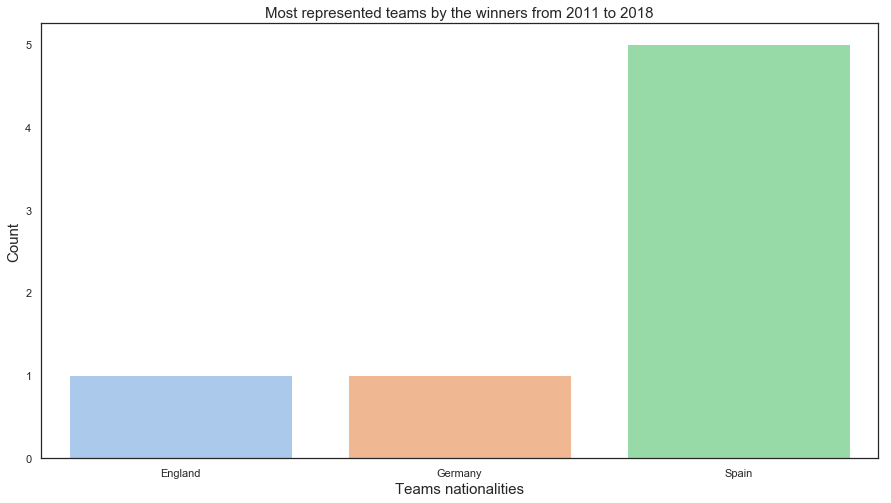

In [130]:
            # what are the countries that were the most represented by the winners of competition from 2011 to 2018 ?
    
fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.countplot(x = "team_country", data = winners_df, ax = ax) # creating the countplot 
plt.title("Most represented teams by the winners from 2011 to 2018", fontsize = 15)
plt.xlabel("Teams nationalities", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
It seems that the winners of the Champions League are mostly from Spain, this is due to the fact that two teams of the Big Four are from there (Real Madrid and FC Barcelona). <br><br>
        
Actually, thr four best countries in terms of high-tier level teams are :
    - Spain : Real Madrid, FC Barcelona, Atletico Madrid
    - England : Chelsea, Manchester United, Manchester City
    - Germany : Bayern Munich, Borussia Dortmund
    - Italy : Juventus FC, AC Milan, Napoli
    
That's why in most of the plots, those four countries are the most represented ones.
    </font>
</i>

In [131]:
        # filtering the other teams rather than the winners so that we compare both later
    
                # filtering teams_round to get all the teams that didn't won the tournament per round

losers = teams_round[teams_round["last_results"] != "W"]
losers = losers.drop(columns = ['goals_scored', 'goals_conceded', 'goals_difference', 'n_matchs_played', 'n_wins', 'n_draws', 'n_loss', 'last_results', 'round'])
losers.head()

,year,team_rank,team,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
0,2011/12,1,FC Barcelona,42,50,17,83,75,3.75
1,2011/12,2,Real Madrid,50,50,0,92,75,3.66
2,2011/12,3,Bayern Munich,38,46,15,92,38,2.85
3,2011/12,4,Chelsea,38,62,0,83,62,3.47
4,2011/12,5,Milan AC,40,50,20,80,60,3.00


In [132]:
                # teams that won the tournament per round
    
filt_winners.head()

,year,team_rank,team,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
28,2011/12,1,Chelsea,38,62,0,83,62,3.47
58,2012/13,1,Bayern Munich,38,62,8,92,62,3.23
88,2013/14,1,Real Madrid,38,54,8,92,77,3.92
118,2014/15,1,FC Barcelona,46,54,0,85,69,3.23
148,2015/16,1,Real Madrid,77,15,23,69,31,2.62


In [133]:
        # calculating the means of the winners and losers dataframes
    
                    # comparing per round
        
                            # winners
            
winners_stats = ["clean_sheets", "both_teams_to_score", "fail_to_score", "over_1.5_goals", "over_2.5_goals", "average_goals"]
winners_mean = filt_winners[winners_stats]

winners_mean.loc['mean_winner'] = winners_mean.mean()

win_mean = winners_mean.tail(1)

win_mean

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
mean_winner,38.285714,59.428571,5.571429,88.714286,70.428571,3.484286


In [134]:
                            # losers

losers_stats = ["clean_sheets", "both_teams_to_score", "fail_to_score", "over_1.5_goals", "over_2.5_goals", "average_goals"]
losers_mean = losers[losers_stats]

losers_mean.loc['mean_other'] = losers_mean.mean()

loser_mean = losers_mean.tail(1)

loser_mean

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
mean_other,37.921182,50.517241,18.665025,79.684729,58.453202,2.961675


In [135]:
            # concatenating both mean_winner and mean_loser
    
mean_df = pd.concat([win_mean, loser_mean])
mean_df['means_kind'] = mean_df.index
mean_df

,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals,means_kind
mean_winner,38.285714,59.428571,5.571429,88.714286,70.428571,3.484286,mean_winner
mean_other,37.921182,50.517241,18.665025,79.684729,58.453202,2.961675,mean_other


Text(0,0.5,'Count')

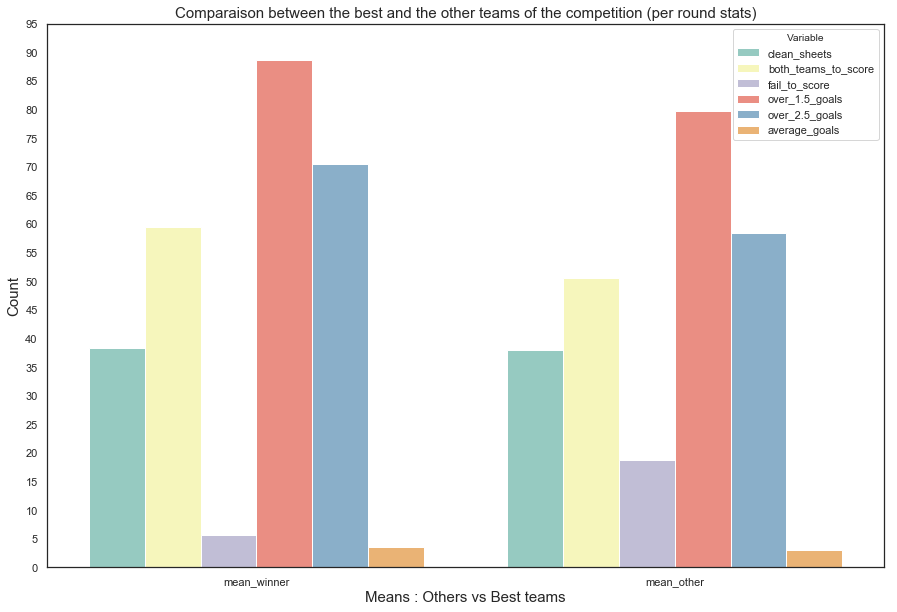

In [237]:
                # plotting both means in order to compare the best teams and the others (per round stats)
    
fig, ax = plt.subplots(figsize=(15, 10))

tidy_3 = (
    mean_df.set_index('means_kind')
                               .stack()  # un-pivots the data 
                               .reset_index()  # moves all data out of the index
                               .rename(columns={'level_1': 'Variable', 0: 'mean_other'})
)
sns.barplot(x='means_kind', y='mean_other', hue='Variable', data=tidy_3, ax=ax)
plt.yticks(np.arange(0, 100, step=5))
plt.title("Comparaison between the best and the other teams of the competition (per round stats)", fontsize = 15)
plt.xlabel("Means : Others vs Best teams", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
We can see that between the winners and the other teams, in terms of average stats per round of the competition, there is a gap of 7% in terms of performances.
    </font>
</i>

In [142]:
            # filtering teams_detailed_stats to extract the teams that didn't win the competition per detailed stats
             
first_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2011/12") & (teams_detailed_stats["team_names_detailed_stats"] != "Chelsea")]
second_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2012/13") & (teams_detailed_stats["team_names_detailed_stats"] != "Bayern Munich")]
third_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2013/14") & (teams_detailed_stats["team_names_detailed_stats"] != "Real Madrid")]
fourth_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2014/15") & (teams_detailed_stats["team_names_detailed_stats"] != "FC Barcelona")]
fifth_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2015/16") & (teams_detailed_stats["team_names_detailed_stats"] != "Real Madrid")]
sixth_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2016/17") & (teams_detailed_stats["team_names_detailed_stats"] != "Real Madrid")]
seventh_l = teams_detailed_stats[(teams_detailed_stats["year"] == "2017/18") & (teams_detailed_stats["team_names_detailed_stats"] != "Real Madrid")]

                # creating a dataframe containing only the non-winners

losers_ds = pd.concat([first_l, second_l, third_l, fourth_l, fifth_l, sixth_l, seventh_l])
losers_ds.head()

                # making some filtering so that we only have the features that interest us

other_ds_feat = ["total_goals", "shots_average", "yellow_card", "red_card", "ball_possession_percentage", "pass_accuracy_percentage", "team_rating"]
other_ds = losers_ds[other_ds_feat]
other_ds.head()

                # calculating the mean of each feature
    
other_ds.loc['mean_other_ds'] = other_ds.mean()
other_ds_mean = other_ds.tail(1)
other_ds_mean

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
mean_other_ds,11.330049,12.906404,15.275862,0.719212,49.74532,81.216749,6.804483


In [143]:
                # selecting the winners from the detailed stats point of view
    
winners_ds

                # making some filtering so that we only have the features that interest us
    
winners_ds_feat = ["total_goals", "shots_average", "yellow_card", "red_card", "ball_possession_percentage", "pass_accuracy_percentage", "team_rating"]
winners_ds = winners_ds[winners_ds_feat]
winners_ds

                # calculating the mean of each feature
    
winners_ds.loc['mean_winners_ds'] = winners_ds.mean()
winners_ds_mean = winners_ds.tail(1)
winners_ds_mean

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
mean_winners_ds,32.142857,17.228571,23.857143,0.571429,53.6,86.5,7.18


In [144]:
                # concatenating both means to a single dataframe
    
means_ds = pd.concat([other_ds_mean, winners_ds_mean])

                # converting index to another column in order to create separation in the visualization
    
means_ds['means_kind_ds'] = means_ds.index
    
means_ds

,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating,means_kind_ds
mean_other_ds,11.330049,12.906404,15.275862,0.719212,49.74532,81.216749,6.804483,mean_other_ds
mean_winners_ds,32.142857,17.228571,23.857143,0.571429,53.60000,86.500000,7.180000,mean_winners_ds


Text(0,0.5,'Count')

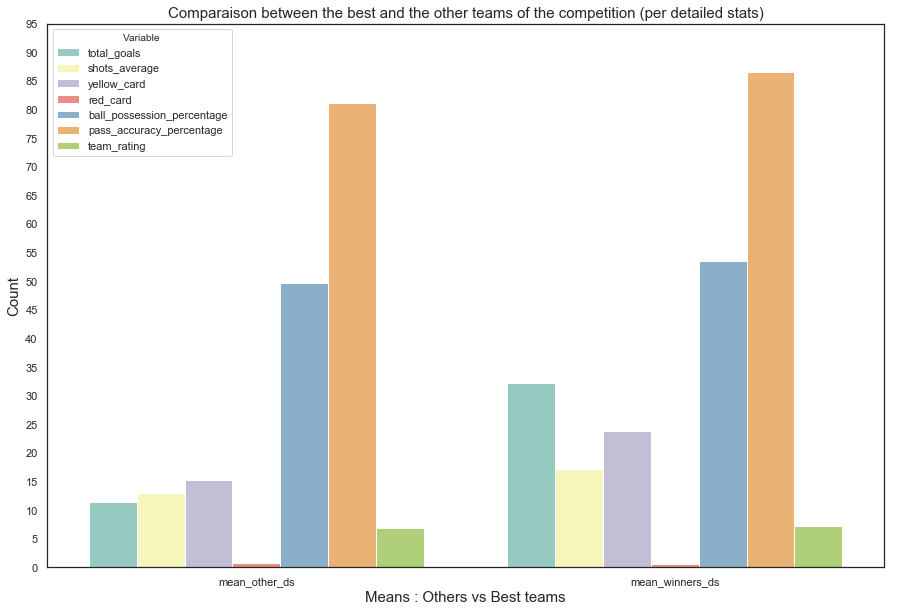

In [232]:
                # plotting both means in order to compare the worst teams and the others (per detailed stats)
    
fig, ax = plt.subplots(figsize=(15, 10))

tidy_2 = (
    means_ds.set_index('means_kind_ds')
                               .stack()  # un-pivots the data 
                               .reset_index()  # moves all data out of the index
                               .rename(columns={'level_1': 'Variable', 0: 'mean_winners_ds'})
)
sns.barplot(x='means_kind_ds', y='mean_winners_ds', hue='Variable', data=tidy_2, ax=ax)
plt.yticks(np.arange(0, 100, step=5))
plt.title("Comparaison between the best and the other teams of the competition (per detailed stats)", fontsize = 15)
plt.xlabel("Means : Others vs Best teams", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
We can see that between the winners and the other teams, in terms of average stats per detailed stats of the competition, there is a gap of 6% in terms of performances.
    </font>
</i>

In [152]:
                # adding nationalities to the other teams dataframes

def country_2(team_name, country):
    select_team = losers[losers['team'] == team_name].index
    losers.loc[select_team, 'team_country_2'] = country
    select_team_2 = losers_ds[losers_ds['team_names_detailed_stats'] == team_name].index
    losers_ds.loc[select_team_2, 'team_country_2'] = country
  
losers.team.value_counts()
losers_ds.team_names_detailed_stats.value_counts().head()

country_2("Bayern Munich", "Germany")
country_2("Real Madrid", "Spain")
country_2("FC Barcelona", "Spain")
country_2("Juventus FC", "Italy")
country_2("Atlético Madrid", "Spain")
country_2("Paris Saint-Germain", "France")
country_2("Borussia Dortmund", "Germany")
country_2("Chelsea", "England")
country_2("Manchester City", "England")
country_2("Arsenal", "England")
country_2("AS Monaco", "France")
country_2("FC Porto", "Portugal")
country_2("SL Benfica", "Portugal")
country_2("AS Roma", "Italy")
country_2("Manchester United", "England")
country_2("Liverpool FC", "England")
country_2("Bayer Leverkusen", "Germany")
country_2("Galatasaray", "Turkey")
country_2("FC Basel", "Switzerland")
country_2("Schalke 04", "Germany")
country_2("Shakhtar Donetsk", "Ukraine")
country_2("Sevilla FC", "Spain")
country_2("Leicester City", "England")
country_2("APOEL Nicosie", "Cyprus")
country_2("Milan AC", "Italy")
country_2("Zenit St Petersburg", "Russia")
country_2("AC Milan", "Italy")
country_2("Malaga", "Spain")
country_2("Marseille", "France")
country_2("VfL Wolfsburg", "Germany")
country_2("SSC Napoli", "Italy")
country_2("PSV Eindhoven", "Netherlands")
country_2("CSKA Moscow", "Russia")
country_2("Inter Milan", "Italy")
country_2("Lyon", "France")
country_2("Zenit St Petersbourg", "Russia")
country_2("Valencia CF", "Spain")
country_2("Olympiakos", "Greece")
country_2("Dynamo Kyiv", "Ukraine")
country_2("Besiktas", "Turkey")
country_2("Celtic", "Ireland")
country_2("Tottenham Hotspur FC", "England")
country_2("KAA Gent", "Belgium")
country_2("Ajax Amsterdam", "Netherland")
country_2("Trabzonspor", "Turkey")
country_2("KAA Gent", "Belgium")
country_2("APOEL Nicosia", "Cyprus")
country_2("KRC Genk", "Belgium")
country_2("BATE Borisov", "Belarus")
country_2("Viktoria Plzen", "Czech Republic")
country_2("Anderlecht", "Belgium")
country_2("Sporting Braga", "Portugal")
country_2("Montpellier", "France")
country_2("Spartak Moscow", "Russia")

losers.head()
losers_ds.head()

features_x = ['year', 'team_country_2']

l1 = losers[features_x]
l1.head()

l2 = losers_ds[features_x]
l2.head()

losers_nationalities = pd.concat([l1, l2])
losers_nationalities.head()

,year,team_country_2
0,2011/12,Spain
1,2011/12,Spain
2,2011/12,Germany
3,2011/12,England
4,2011/12,Italy


Text(0,0.5,'Count')

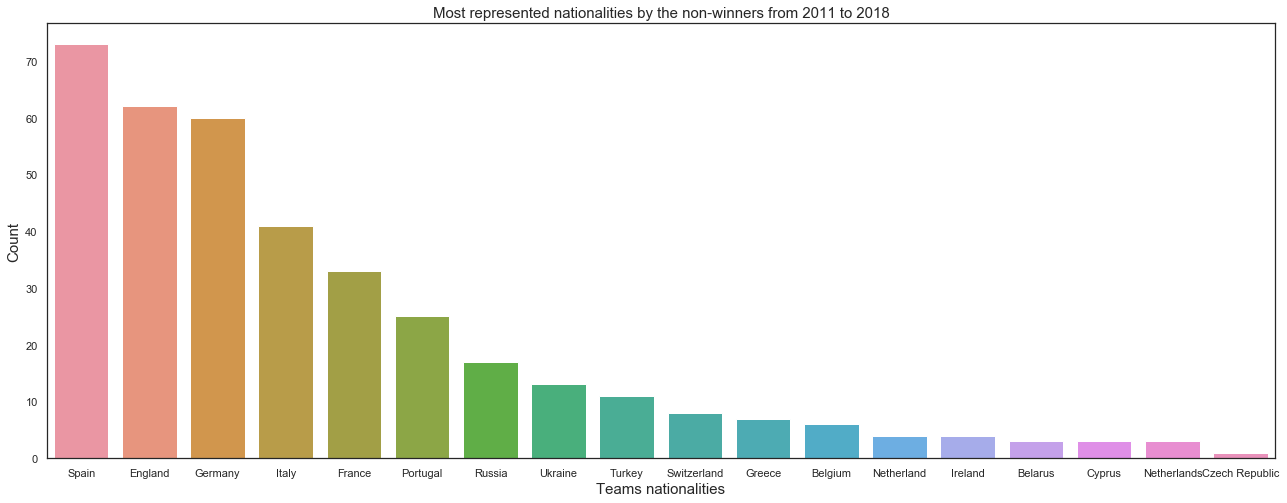

In [153]:
                # what are the countries that were the most represented by the teams that didn't win the competition from 2011 to 2018 ?
    
fig, ax = plt.subplots(figsize = (22, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "Set3")
sns.countplot(x = "team_country_2", data = losers_nationalities, order = losers_nationalities['team_country_2'].value_counts().index, ax = ax) # creating the countplot 
plt.title("Most represented nationalities by the non-winners from 2011 to 2018", fontsize = 15)
plt.xlabel("Teams nationalities", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
As explained above, Spain, Italy, England, Germany are the countries that had most of the high-tier teams, that's why even for the non-winning teams, these countries are still the ones that are the most represented in the countplot above.
    </font>
</i>

In [154]:
#### differences between the bad teams of the competition and the other teams, their playstyles differences and their nationalities ?

    ### 1) selecting the mean values for the other teams subsets (both per round and per detailed stats)
    ### 2) filtering the bad teams (we'll take the last 5 teams)
    ### 3) calculating the mean of each stat of the bad teams
    ### 4) plot both results to compare them (the bad and other teams)
    ### 5) looking for the bad teams nationalties
    ### 6) plotting it
    
        ## comparing per round
    
            ## overviewing the other teams dataframe
        
losers.head()

,year,team_rank,team,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals,team_country_2
0,2011/12,1,FC Barcelona,42,50,17,83,75,3.75,Spain
1,2011/12,2,Real Madrid,50,50,0,92,75,3.66,Spain
2,2011/12,3,Bayern Munich,38,46,15,92,38,2.85,Germany
3,2011/12,4,Chelsea,38,62,0,83,62,3.47,England
4,2011/12,5,Milan AC,40,50,20,80,60,3.00,Italy


In [155]:
            ## other teams averages (calculated above)
    
loser_mean

,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
mean_other,37.921182,50.517241,18.665025,79.684729,58.453202,2.961675


In [177]:
            ## filtering the bad teams (we'll take the last 5 teams)
                    
                    # overviewing the teams performances per round (starting from the 8th Finals)

teams_round

                    # selecting the worst teams for each year
    
last_five_pr = teams_round[(teams_round["round"] == "8th Finals") & (teams_round["n_loss"] == 2)]
last_five_pr.head()

,year,round,team_rank,team,n_matchs_played,n_wins,n_draws,n_loss,goals_scored,goals_conceded,goals_difference,last_results,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
15,2011/12,8th Finals,16,Bayer Leverkusen,2,0,0,2,2,10,-8,LL,13,75,13,100,63,3.50
45,2012/13,8th Finals,16,Celtic,2,0,0,2,0,5,-5,LL,13,63,40,75,63,2.75
72,2013/14,8th Finals,13,Manchester City,2,0,0,2,1,4,-3,LL,13,75,13,100,88,4.13
73,2013/14,8th Finals,14,AC Milan,2,0,0,2,1,5,-4,LL,40,50,20,80,40,2.40
74,2013/14,8th Finals,15,Bayer Leverkusen,2,0,0,2,1,6,-5,LL,38,38,38,75,75,3.25


In [175]:
                 # making some filtering so that we only have the features that interest us
    
last_five_feat = ["clean_sheets", "both_teams_to_score", "fail_to_score", "over_1.5_goals", "over_2.5_goals", "average_goals"]
last_five_pr  = last_five_pr[last_five_feat]
last_five_pr.head()

                # calculating the mean of each feature
    
last_five_pr.loc['mean_losers'] = last_five_pr.mean()
worst_mean = last_five_pr.tail(1)
worst_mean

,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals
mean_losers,27.111111,58.944444,20.0,87.333333,65.055556,3.211667


In [191]:
                # concatenating the means of the worst teams and the other teams per round
    
means_worst_pr = pd.concat([loser_mean, worst_mean])
means_worst_pr

means_worst_pr['means_kind_pr'] = means_worst_pr.index
means_worst_pr

,clean_sheets,both_teams_to_score,fail_to_score,over_1.5_goals,over_2.5_goals,average_goals,means_kind_pr
mean_other,37.921182,50.517241,18.665025,79.684729,58.453202,2.961675,mean_other
mean_losers,27.111111,58.944444,20.000000,87.333333,65.055556,3.211667,mean_losers


Text(0,0.5,'Count')

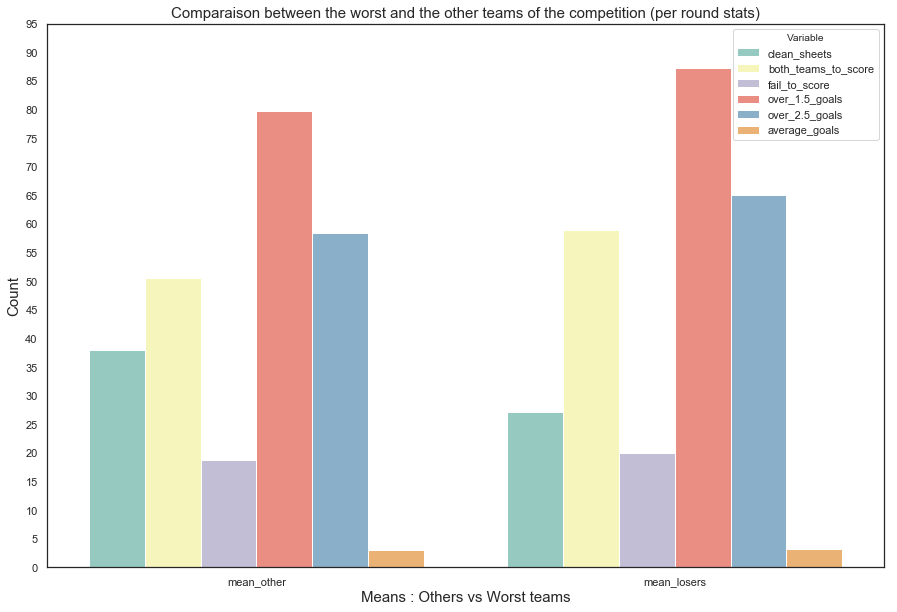

In [231]:
                # plotting both means in order to compare the worst teams and the others
    
fig, ax = plt.subplots(figsize=(15, 10))

tidy = (
    means_worst_pr.set_index('means_kind_pr')
                               .stack()  # un-pivots the data 
                               .reset_index()  # moves all data out of the index
                               .rename(columns={'level_1': 'Variable', 0: 'mean_losers'})
)
sns.barplot(x='means_kind_pr', y='mean_losers', hue='Variable', data=tidy, ax=ax)

plt.title("Comparaison between the worst and the other teams of the competition (per round stats)", fontsize = 15)
plt.yticks(np.arange(0, 100, step=5))
plt.xlabel("Means : Others vs Worst teams", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
We can see that between the worst and the other teams, the major difference is coming from the defensive end (gap of 7% in the clean sheets percentage, 4% in the both teams to score percentage !)
    </font>
</i>

In [260]:
         ## comparing per detailed stats
    
                # overviewing the other teams dataframe per detailed stats
        
other_ds.head()

,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
1,35.0,19.1,22.0,1.0,56.1,85.9,7.15
2,35.0,19.5,17.0,0.0,68.2,90.5,7.15
3,26.0,19.1,27.0,1.0,55.1,86.2,7.11
4,12.0,16.7,11.0,0.0,58.5,85.1,7.04
5,11.0,14.5,8.0,1.0,59.2,84.5,7.00


In [276]:
                # filtering the detailed stats dataframe to only extract the worst teams

teams_detailed_stats.head()
teams_detailed_stats.info()

worst_ds = teams_detailed_stats[teams_detailed_stats['team_rank_detailed_stats'] >= 25]
worst_ds.head()

                # removing the features that we don't need
    
worst_ds_feat = ["total_goals", "shots_average", "yellow_card", "red_card", "ball_possession_percentage", "pass_accuracy_percentage", "team_rating"]
worst_ds_filt = worst_ds[worst_ds_feat]

worst_ds_filt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
year                          210 non-null object
team_rank_detailed_stats      210 non-null int64
team_names_detailed_stats     210 non-null object
total_goals                   210 non-null int64
shots_average                 210 non-null float64
yellow_card                   210 non-null int64
red_card                      210 non-null int64
ball_possession_percentage    210 non-null float64
pass_accuracy_percentage      210 non-null float64
team_rating                   210 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 16.5+ KB


,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
24,10,11.4,20,0,44.9,76.1,6.64
25,9,6.1,25,1,41.1,72.4,6.58
26,2,10.0,9,0,40.1,78.7,6.56
27,4,11.5,15,1,39.1,76.5,6.55
28,3,10.8,8,0,41.4,78.0,6.41


In [278]:
                # overviewing the means for the other teams (calculated above)
    
other_ds_mean    

,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
mean_other_ds,11.330049,12.906404,15.275862,0.719212,49.74532,81.216749,6.804483


In [279]:
                # calculating the means for the worst teams per detailed stats
    
worst_ds_filt.loc['mean_worst'] = worst_ds_filt.mean()
worst_mean_ds = worst_ds_filt.tail(1)
worst_mean_ds

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating
mean_worst,4.904762,10.833333,13.071429,0.833333,45.169048,79.383333,6.536429


In [282]:
                # concatenating both means
    
worst_vs_others = pd.concat([other_ds_mean, worst_mean_ds])
worst_vs_others["means"] = worst_vs_others.index
worst_vs_others

,total_goals,shots_average,yellow_card,red_card,ball_possession_percentage,pass_accuracy_percentage,team_rating,means
mean_other_ds,11.330049,12.906404,15.275862,0.719212,49.745320,81.216749,6.804483,mean_other_ds
mean_worst,4.904762,10.833333,13.071429,0.833333,45.169048,79.383333,6.536429,mean_worst


Text(0,0.5,'Count')

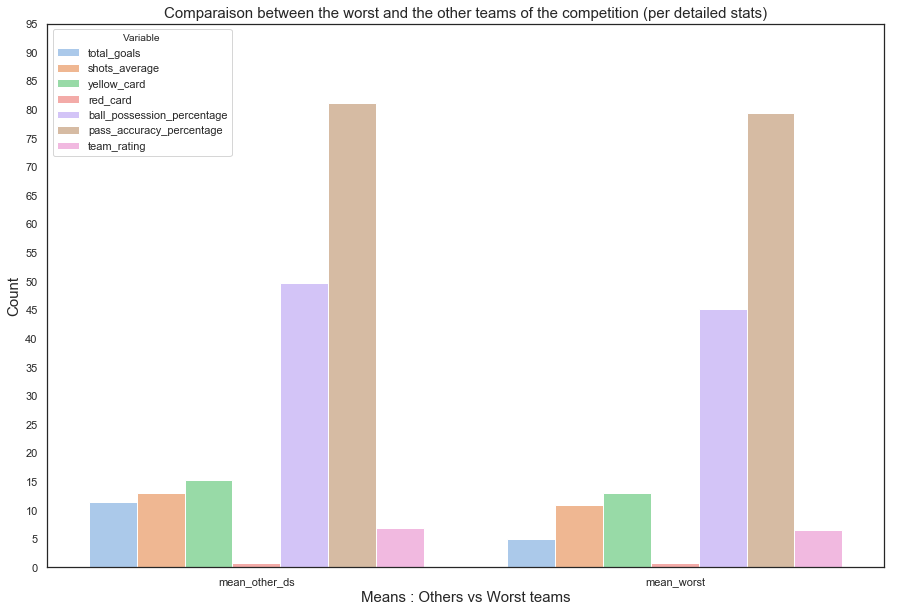

In [285]:
                # plotting the averages between the worst and the other teams (per detailed stats)
    
fig, ax = plt.subplots(figsize=(15, 10))

tidy_5 = (
    worst_vs_others.set_index('means')
                               .stack()  # un-pivots the data 
                               .reset_index()  # moves all data out of the index
                               .rename(columns={'level_1': 'Variable', 0: 'mean_ds'})
)
sns.barplot(x='means', y='mean_ds', hue='Variable', data=tidy_5, ax=ax)

plt.title("Comparaison between the worst and the other teams of the competition (per detailed stats)", fontsize = 15)
plt.yticks(np.arange(0, 100, step=5))
plt.xlabel("Means : Others vs Worst teams", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
We can see that between the worst and the other teams in terms of detailed stats, the major difference is coming from the offensive end (gap of 7% in the total goals scored, 4% in the other metrics !)
    </font>
</i>

In [287]:
                # what are the countries represented by the worst teams of the competition ?
    
                            # adding nationalities to the worst teams dataframes

def country_3(team_name, country):
    select_team = last_five_pr[last_five_pr['team'] == team_name].index
    last_five_pr.loc[select_team, 'team_country_2'] = country
    select_team_2 = worst_ds[worst_ds['team_names_detailed_stats'] == team_name].index
    worst_ds.loc[select_team_2, 'team_country_2'] = country  

country_3("Bayern Munich", "Germany")
country_3("Real Madrid", "Spain")
country_3("FC Barcelona", "Spain")
country_3("Juventus FC", "Italy")
country_3("Atlético Madrid", "Spain")
country_3("Paris Saint-Germain", "France")
country_3("Borussia Dortmund", "Germany")
country_3("Chelsea", "England")
country_3("Manchester City", "England")
country_3("Arsenal", "England")
country_3("AS Monaco", "France")
country_3("FC Porto", "Portugal")
country_3("SL Benfica", "Portugal")
country_3("AS Roma", "Italy")
country_3("Manchester United", "England")
country_3("Liverpool FC", "England")
country_3("Bayer Leverkusen", "Germany")
country_3("Galatasaray", "Turkey")
country_3("FC Basel", "Switzerland")
country_3("Schalke 04", "Germany")
country_3("Shakhtar Donetsk", "Ukraine")
country_3("Sevilla FC", "Spain")
country_3("Leicester City", "England")
country_3("APOEL Nicosie", "Cyprus")
country_3("Milan AC", "Italy")
country_3("Zenit St Petersburg", "Russia")
country_3("AC Milan", "Italy")
country_3("Malaga", "Spain")
country_3("Marseille", "France")
country_3("VfL Wolfsburg", "Germany")
country_3("SSC Napoli", "Italy")
country_3("PSV Eindhoven", "Netherlands")
country_3("CSKA Moscow", "Russia")
country_3("Inter Milan", "Italy")
country_3("Lyon", "France")
country_3("Zenit St Petersbourg", "Russia")
country_3("Valencia CF", "Spain")
country_3("Olympiakos", "Greece")
country_3("Dynamo Kyiv", "Ukraine")
country_3("Besiktas", "Turkey")
country_3("Celtic", "Ireland")
country_3("Tottenham Hotspur FC", "England")
country_3("KAA Gent", "Belgium")
country_3("Ajax Amsterdam", "Netherland")
country_3("Trabzonspor", "Turkey")
country_3("KAA Gent", "Belgium")
country_3("APOEL Nicosia", "Cyprus")
country_3("KRC Genk", "Belgium")
country_3("BATE Borisov", "Belarus")
country_3("Viktoria Plzen", "Czech Republic")
country_3("Anderlecht", "Belgium")
country_3("Sporting Braga", "Portugal")
country_3("Montpellier", "France")
country_3("Spartak Moscow", "Russia")

features_x = ['year', 'team_country_2']

l3 =  last_five_pr[features_x]
l3.head()

l4 = worst_ds[features_x]
l4.head()

worst_nationalities = pd.concat([l3, l4])
worst_nationalities.head()

,year,team_country_2
15,2011/12,Germany
45,2012/13,Ireland
72,2013/14,England
73,2013/14,Italy
74,2013/14,Germany


Text(0,0.5,'Count')

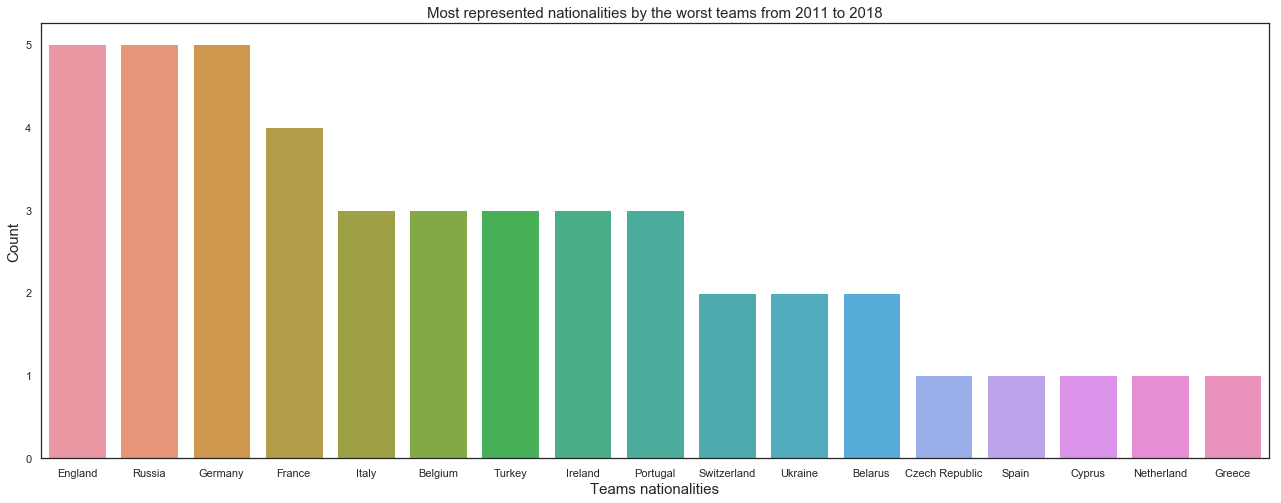

In [288]:
                # what are the countries that were the most represented by the worst teams in the competition from 2011 to 2018 ?
    
fig, ax = plt.subplots(figsize = (22, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "Set3")
sns.countplot(x = "team_country_2", data = worst_nationalities, order = worst_nationalities['team_country_2'].value_counts().index, ax = ax) # creating the countplot 
plt.title("Most represented nationalities by the worst teams from 2011 to 2018", fontsize = 15)
plt.xlabel("Teams nationalities", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
We can see that the worst team are from countries that gives less interests to football (except for England, Germany and France) such as Russia, Belgium, Turkey, etc ...
    </font>
</i>

In [302]:
        ### best scorer ? what's his team ? what's his nationality ?
    
                ## 1) selecting the best scorers from the dataframe
                ## 2) adding columns with their nationalities
                ## 3) filtering the new dataframe to only get the scorers' team and nationalities
                ## 4) plotting their teams and countries
                ## 5) looking the best scorer of an edition of the tournament allows his team more chances to win the competition

In [293]:
                        # selecting the best scorers from the dataframe (created earlier in the notebook)
    
scorers.head()

best_scorers = scorers[scorers['scorer_rank'] == 1]
best_scorers

,year,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,14,1.27
30,2012/13,1,Cristiano Ronaldo,Real Madrid,12,12,1.00
60,2013/14,1,Cristiano Ronaldo,Real Madrid,11,17,1.55
90,2014/15,1,Lionel Messi,FC Barcelona,13,10,0.77
120,2015/16,1,Cristiano Ronaldo,Real Madrid,12,16,1.33
150,2016/17,1,Cristiano Ronaldo,Real Madrid,13,12,0.92
180,2017/18,1,Cristiano Ronaldo,Real Madrid,13,15,1.15


In [301]:
                        # adding columns with their nationalities
    
def country_scorers(player_name, country):
    select_team = best_scorers[best_scorers['scorer_name'] == player_name].index
    best_scorers.loc[select_team, 'scorers_country_2'] = country
    
country_scorers("Lionel Messi", "Argentina")
country_scorers("Cristiano Ronaldo", "Portugal")

best_scorers

,year,scorer_rank,scorer_name,scorer_team,scorer_match_played,goals_numbers,goals_ratio,scorers_country_2
0,2011/12,1,Lionel Messi,FC Barcelona,11,14,1.27,Argentina
30,2012/13,1,Cristiano Ronaldo,Real Madrid,12,12,1.00,Portugal
60,2013/14,1,Cristiano Ronaldo,Real Madrid,11,17,1.55,Portugal
90,2014/15,1,Lionel Messi,FC Barcelona,13,10,0.77,Argentina
120,2015/16,1,Cristiano Ronaldo,Real Madrid,12,16,1.33,Portugal
150,2016/17,1,Cristiano Ronaldo,Real Madrid,13,12,0.92,Portugal
180,2017/18,1,Cristiano Ronaldo,Real Madrid,13,15,1.15,Portugal


In [303]:
                            # filtering the new dataframe to only get the scorers team and nationalities
    
scorers_feat = ['scorer_name', 'scorer_team', 'scorers_country_2']
scorers_filt = best_scorers[scorers_feat]

scorers_filt

,scorer_name,scorer_team,scorers_country_2
0,Lionel Messi,FC Barcelona,Argentina
30,Cristiano Ronaldo,Real Madrid,Portugal
60,Cristiano Ronaldo,Real Madrid,Portugal
90,Lionel Messi,FC Barcelona,Argentina
120,Cristiano Ronaldo,Real Madrid,Portugal
150,Cristiano Ronaldo,Real Madrid,Portugal
180,Cristiano Ronaldo,Real Madrid,Portugal


In [341]:
                            #  adding the year
    
scorers_year = best_scorers[['year', 'scorer_name', 'goals_numbers']]
scorers_year
    
                            # plotting the best scorers teams and nationalities
    
                                    # we have to separate the dataframe scorers_filt in two dataframes : one with the player/nationality and one with player/team
                                                
                                                 # players with nationalities
              
scorers_nat = scorers_filt[['scorer_name', 'scorers_country_2']]
scorers_nat

                                                 # players with teams
    
scorers_team = scorers_filt[['scorer_name', 'scorer_team']]
scorers_team

,scorer_name,scorer_team
0,Lionel Messi,FC Barcelona
30,Cristiano Ronaldo,Real Madrid
60,Cristiano Ronaldo,Real Madrid
90,Lionel Messi,FC Barcelona
120,Cristiano Ronaldo,Real Madrid
150,Cristiano Ronaldo,Real Madrid
180,Cristiano Ronaldo,Real Madrid


Text(0,0.5,'Number of goals')

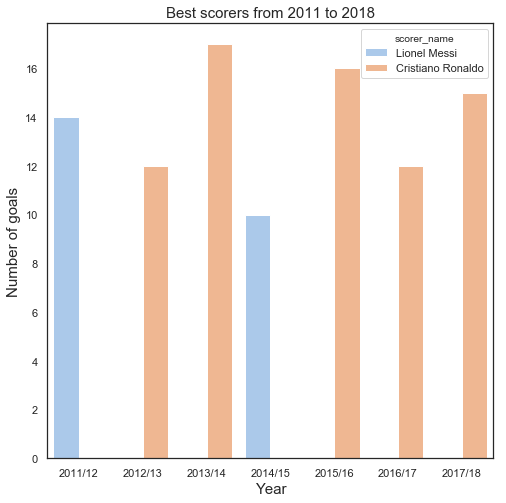

In [355]:
                                        # plotting each best scorer per year
    
fig, ax = plt.subplots(figsize = (8, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.barplot(x = "year", y = "goals_numbers", hue = "scorer_name", data = scorers_year, ci = None, ax = ax) # creating the countplot 
plt.title("Best scorers from 2011 to 2018", fontsize = 15)
plt.xlabel("Year", fontsize = 15, y = -1.2)
plt.ylabel("Number of goals", fontsize = 15)

Text(0,0.5,'Count')

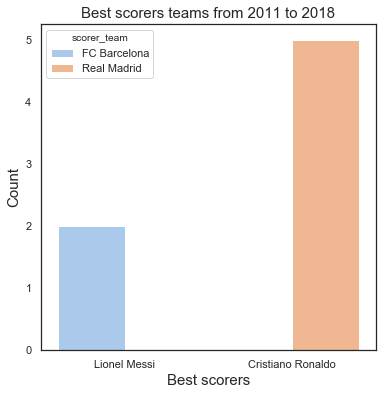

In [330]:
                                        # plotting players with teams

fig, ax = plt.subplots(figsize = (6, 6)) # arranging the dimension of the grid in order to have proper display of the barplots    
    
sns.set(style = "white", palette = "pastel")
sns.countplot(x = "scorer_name", hue = "scorer_team", data = scorers_team, ax = ax) # creating the countplot 
plt.title("Best scorers teams from 2011 to 2018", fontsize = 15)
plt.xlabel("Best scorers", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

Text(0,0.5,'Count')

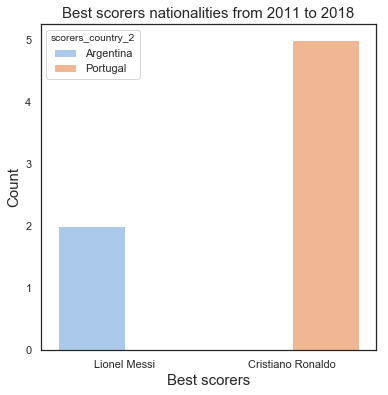

In [356]:
                                       # plotting players with nationalities
    
fig, ax = plt.subplots(figsize = (6, 6)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "pastel")
sns.countplot(x = "scorer_name", hue = "scorers_country_2", data = scorers_nat, ax = ax) # creating the countplot 
plt.title("Best scorers nationalities from 2011 to 2018", fontsize = 15)
plt.xlabel("Best scorers", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
We can see that since 2011, the title of best scorer of the competition is shared between Cristiano Ronaldo and Lionel Messi, respectively star player of the Real Madrid and FC Barcelona. <br><br>
This can partially explain why the Real Madrid won the competition in 2013/2014; 2015/2016; 2016/2017; 2017/2018 (Ronaldo was the best scorer in each of these editions) and why the FC Barcelona won the competition in 2014/2015 (Messi was the best scorer this year). <br><br>
Nevertheless, a player finishing best scorer of the competition and his nationality doesn't necessarly guarantee his team to win the competition as displayed by Chelsea in 2011/2012 and Bayern Munich 2012/2013 where none of their players were the best scorer of the competition. <br><br>
Consequently, this is a theory that have a high degree of influence but isn't necessarly true as displayed by those explanations above.
    </font>
</i>

In [338]:
        ### best assist player ? what's his team ? what's his nationality ?
    
                ## 1) selecting the best assists players from the dataframe
                ## 2) adding columns with their nationalities
                ## 3) filtering the new dataframe to only get the assists player team and nationalities
                ## 4) plotting their teams and countries
                ## 5) looking the best scorer of an edition of the tournament allows his team more chances to win the competition

In [340]:
                ## selecting the best assists players from the assists dataframe created above
    
assists.head()

best_assists = assists[assists["assist_rank"] == 1]
best_assists

,year,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio
0,2011/12,1,Lionel Messi,FC Barcelona,11,9,0.82
30,2012/13,1,Zlatan Ibrahimovic,Paris Saint-Germain,9,7,0.78
60,2013/14,1,Ángel Di María,Real Madrid,11,5,0.45
61,2013/14,1,Karim Benzema,Real Madrid,11,5,0.45
62,2013/14,1,Wayne Rooney,Manchester United,9,5,0.56
90,2014/15,1,Andrés Iniesta,FC Barcelona,11,5,0.45
120,2015/16,1,Kingsley Coman,Bayern Munich,8,5,0.62
121,2015/16,1,Alexis Sánchez,Arsenal,7,5,0.71
150,2016/17,1,Neymar,FC Barcelona,9,8,0.89
180,2017/18,1,James Milner,Liverpool FC,11,8,0.73


In [352]:
                ## adding columns with their nationalities
    
def country_assists(player_name, country):
    select_team = best_assists[best_assists['assist_name'] == player_name].index
    best_assists.loc[select_team, 'assists_country_2'] = country
    
country_assists("Lionel Messi", "Argentina")
country_assists("Zlatan Ibrahimovic", "Sweden")
country_assists("Ángel Di María", "Argentina")
country_assists("Karim Benzema", "France")
country_assists("Wayne Rooney", "England")
country_assists("Andrés Iniesta", "Spain")
country_assists("Kingsley Coman", "France")
country_assists("Alexis Sánchez", "Chile")
country_assists("Neymar", "Brazil")
country_assists("James Milner", "England")

best_assists.iloc[8, 7] = "Brazil"

best_assists

,year,assist_rank,assist_name,assist_team,assist_match_played,assists_numbers,assists_ratio,assists_country_2
0,2011/12,1,Lionel Messi,FC Barcelona,11,9,0.82,Argentina
30,2012/13,1,Zlatan Ibrahimovic,Paris Saint-Germain,9,7,0.78,Sweden
60,2013/14,1,Ángel Di María,Real Madrid,11,5,0.45,Argentina
61,2013/14,1,Karim Benzema,Real Madrid,11,5,0.45,France
62,2013/14,1,Wayne Rooney,Manchester United,9,5,0.56,England
90,2014/15,1,Andrés Iniesta,FC Barcelona,11,5,0.45,Spain
120,2015/16,1,Kingsley Coman,Bayern Munich,8,5,0.62,France
121,2015/16,1,Alexis Sánchez,Arsenal,7,5,0.71,Chile
150,2016/17,1,Neymar,FC Barcelona,9,8,0.89,Brazil
180,2017/18,1,James Milner,Liverpool FC,11,8,0.73,England


In [354]:
                ## filtering the new dataframe to only get the assists player team and nationalities
    
assists_feat = ['assist_name', 'assist_team', 'assists_country_2']
assists_filt = best_assists[assists_feat]

assists_filt

,assist_name,assist_team,assists_country_2
0,Lionel Messi,FC Barcelona,Argentina
30,Zlatan Ibrahimovic,Paris Saint-Germain,Sweden
60,Ángel Di María,Real Madrid,Argentina
61,Karim Benzema,Real Madrid,France
62,Wayne Rooney,Manchester United,England
90,Andrés Iniesta,FC Barcelona,Spain
120,Kingsley Coman,Bayern Munich,France
121,Alexis Sánchez,Arsenal,Chile
150,Neymar,FC Barcelona,Brazil
180,James Milner,Liverpool FC,England


In [357]:
                                                #  adding the year
    
assists_year = best_assists[['year', 'assist_name', 'assists_numbers']]
assists_year
    
                            # plotting the best scorers teams and nationalities
    
                                    # we have to separate the dataframe scorers_filt in two dataframes : one with the player/nationality and one with player/team
                                                
                                                 # players with nationalities
              
assists_nat = assists_filt[['assist_name', 'assists_country_2']]
assists_nat

                                                 # players with teams
    
assists_team = assists_filt[['assist_name', 'assist_team']]
assists_team

,assist_name,assist_team
0,Lionel Messi,FC Barcelona
30,Zlatan Ibrahimovic,Paris Saint-Germain
60,Ángel Di María,Real Madrid
61,Karim Benzema,Real Madrid
62,Wayne Rooney,Manchester United
90,Andrés Iniesta,FC Barcelona
120,Kingsley Coman,Bayern Munich
121,Alexis Sánchez,Arsenal
150,Neymar,FC Barcelona
180,James Milner,Liverpool FC


Text(0,0.5,'Number of assists')

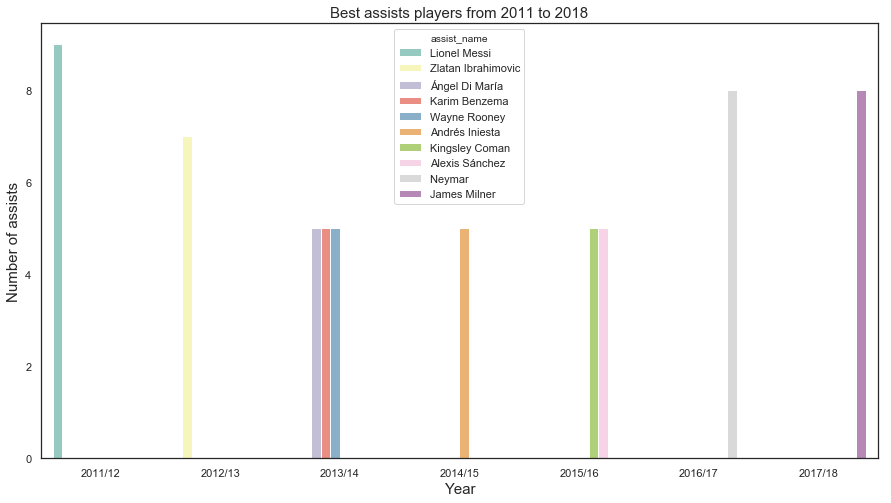

In [368]:
                                        # plotting each best scorer per year
    
fig, ax = plt.subplots(figsize = (15, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "Set3")
sns.barplot(x = "year", y = "assists_numbers", hue = "assist_name", data = assists_year, ci = None, ax = ax) # creating the countplot 
plt.title("Best assists players from 2011 to 2018", fontsize = 15)
plt.xlabel("Year", fontsize = 15, y = -1.2)
plt.ylabel("Number of assists", fontsize = 15)

Text(0,0.5,'Count')

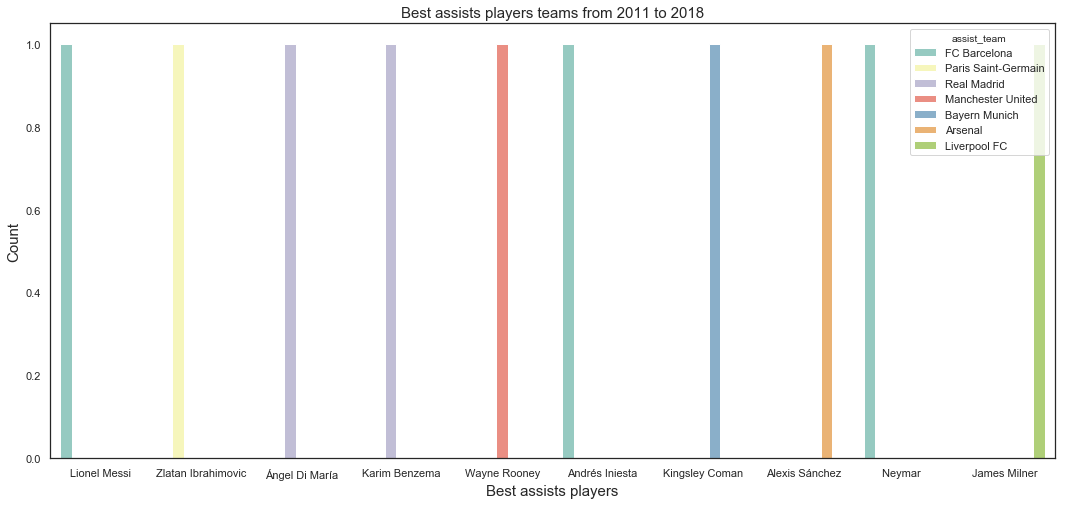

In [373]:
                                            # plotting players with teams

fig, ax = plt.subplots(figsize = (18, 8)) # arranging the dimension of the grid in order to have proper display of the barplots    
    
sns.set(style = "white", palette = "Set3")
sns.countplot(x = "assist_name", hue = "assist_team", data = assists_team, ax = ax) # creating the countplot 
plt.title("Best assists players teams from 2011 to 2018", fontsize = 15)
plt.xlabel("Best assists players", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

Text(0,0.5,'Count')

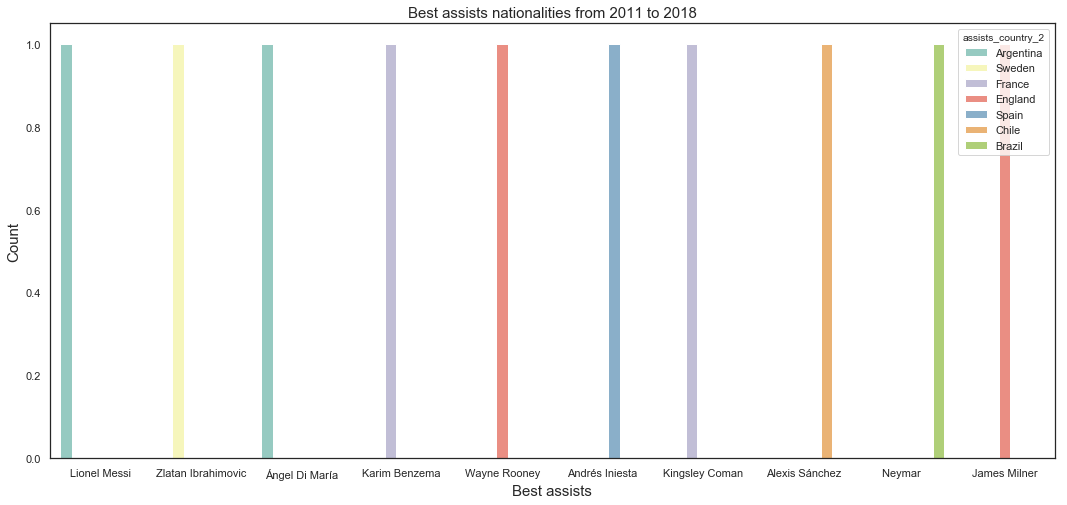

In [374]:
                                                # plotting players with nationalities
    
fig, ax = plt.subplots(figsize = (18, 8)) # arranging the dimension of the grid in order to have proper display of the barplots

sns.set(style = "white", palette = "Set3")
sns.countplot(x = "assist_name", hue = "assists_country_2", data = assists_nat, ax = ax) # creating the countplot 
plt.title("Best assists nationalities from 2011 to 2018", fontsize = 15)
plt.xlabel("Best assists", fontsize = 15, y = -1.2)
plt.ylabel("Count", fontsize = 15)

<i>
    <font color=33A8FF>
Same statements than for the best scorers part, having the best assist player in your team and his nationality doesn't guarantee his team to win the competition, but it slightly increases his chance to win, which is kind of logical actually ...
    </font>
</i>

### Prediction with Machine Learning

We are going to predict the best teams based on the four criterions discussed above (per round, detailed stats, scorers and best assists players)

Name of each datasets :

1. teams_round
2. teams_detailed_stats
3. scorers
4. assists

To be completed ...